In [1]:
#RandomForestRegressor
#XGBRegressor
#DecisionTreeRegressor
#LinearRegression
#catboost
#XGBRFRegressor

In [2]:
# Data Science
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score

In [3]:
crop_yield_data = pd.read_csv("Crop_Yield_Data_challenge_2.csv")
Train_data = pd.read_csv("Level2_train_data_NDVI22_RVI19.csv")
print(Train_data.shape)
Train_feature = pd.read_csv("Level2_train_data_NDVI_RVI_MeanVarMinMaxMedianSumProd.csv")
Train_feature = Train_feature.drop(['Field size (ha)', 'Rice Crop Intensity(D=Double, T=Triple)', 
                                    'Rice Yield (kg/ha)'],axis=1)
print(Train_feature.shape)
Train_vh_vv = pd.read_csv("crop_data_vh_vv.csv")
Train_vh_vv = Train_vh_vv.drop(['District', 'Latitude', 'Longitude', 'Season(SA = Summer Autumn, WS = Winter Spring)',
                               'Rice Crop Intensity(D=Double, T=Triple)', 'Date of Harvest', 'Field size (ha)',
                                'Rice Yield (kg/ha)'],axis=1)
print(Train_vh_vv.shape)
Train_Full = pd.concat([Train_data,Train_feature, Train_vh_vv], axis=1)
print(Train_Full.shape)
NDVI_RVI_features = pd.read_csv('Level2_NDVI_RVI_features_corr_permutation_entropy.csv') 
Train_Full_feature = Train_Full.drop(['District', 'Latitude', 'Longitude', 'Season(SA = Summer Autumn, WS = Winter Spring)',
                                     'Date of Harvest'],axis=1)

(557, 49)
(557, 14)
(557, 18)
(557, 81)


In [4]:
VH_VV_NDVI_RVI_features = pd.concat([Train_Full_feature, NDVI_RVI_features], axis=1)
VH_VV_NDVI_RVI_features.head(2)

,"Rice Crop Intensity(D=Double, T=Triple)",Field size (ha),Rice Yield (kg/ha),ndvi1,ndvi2,ndvi3,ndvi4,ndvi5,ndvi6,ndvi7,...,range_ndvi,mean_ndvi,correlation_ndvi,permutation_entropy_ndvi,min_rvi,max_rvi,range_rvi,mean_rvi,correlation_rvi,permutation_entropy_rvi
0,T,3.40,5500,0.376791,0.376791,0.378848,0.498826,0.521321,0.543816,0.535979,...,0.507403,0.388765,0.853596,0.281894,0.113735,1.298704,1.184969,0.747029,0.520075,0.401118
1,T,2.43,6000,0.408901,0.408901,0.412102,0.530364,0.543367,0.556371,0.531082,...,0.498506,0.380674,0.802596,0.381050,0.484136,0.817069,0.332933,0.626256,-0.658225,0.401118


In [5]:
VH_VV_NDVI_RVI_features.columns

Index(['Rice Crop Intensity(D=Double, T=Triple)', 'Field size (ha)',
       'Rice Yield (kg/ha)', 'ndvi1', 'ndvi2', 'ndvi3', 'ndvi4', 'ndvi5',
       'ndvi6', 'ndvi7', 'ndvi8', 'ndvi9', 'ndvi10', 'ndvi11', 'ndvi12',
       'ndvi13', 'ndvi14', 'ndvi15', 'ndvi16', 'ndvi17', 'ndvi18', 'ndvi19',
       'ndvi20', 'ndvi21', 'ndvi22', 'rvi1', 'rvi2', 'rvi3', 'rvi4', 'rvi5',
       'rvi6', 'rvi7', 'rvi8', 'rvi9', 'rvi10', 'rvi11', 'rvi12', 'rvi13',
       'rvi14', 'rvi15', 'rvi16', 'rvi17', 'rvi18', 'rvi19', 'Nmean', 'Nvar',
       'Nmax', 'Nmin', 'Nmed', 'Nsum', 'Nprod', 'RVImean', 'RVIvar', 'RVImax',
       'RVImin', 'RVImed', 'RVIsum', 'RVIprod', 'min_vv', 'max_vv', 'range_vv',
       'mean_vv', 'correlation_vv', 'permutation_entropy_vv', 'min_vh',
       'max_vh', 'range_vh', 'mean_vh', 'correlation_vh',
       'permutation_entropy_vh', 'min_vv_by_vh', 'max_vv_by_vh',
       'range_vv_by_vh', 'mean_vv_by_vh', 'correlation_vv_by_vh',
       'permutation_entropy_vv_by_vh', 'min_ndvi', 'max_n

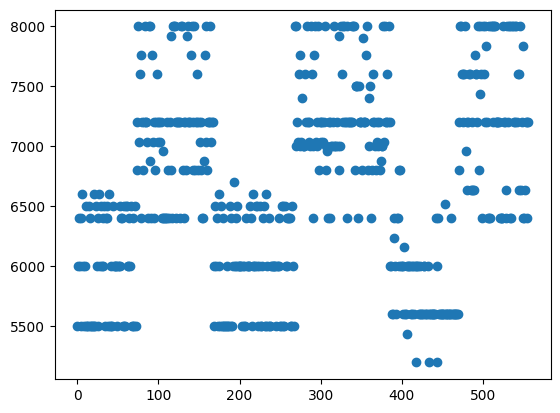

In [6]:
import matplotlib.pyplot as plt
plt.scatter(np.arange(557),Train_Full_feature['Rice Yield (kg/ha)'])

In [7]:
#Train_Full_feature['Rice Yield (kg/ha)'].value_counts()

In [8]:
Test_data = pd.read_csv("Level2_test_data_NDVI22_RVI19.csv")
Test_feature = pd.read_csv("Level2_test_data_NDVI_RVI_MeanVarMinMaxMedianSumProd.csv")
Test_feature = Test_feature.drop(['Field size (ha)', 'Rice Crop Intensity(D=Double, T=Triple)'],axis=1)
print(Test_feature.shape)
Test_vh_vv = pd.read_csv("submission_features_data_vh_vv.csv")
print(Test_vh_vv.shape)
Test_Full = pd.concat([Test_data,Test_feature, Test_vh_vv], axis=1)
print(Test_Full.shape)
Test_Full_feature = Test_Full.drop(['District', 'Latitude', 'Longitude', 'Season(SA = Summer Autumn, WS = Winter Spring)',
                                     'Date of Harvest'],axis=1)
Test_NDVI_RVI_features = pd.read_csv("Level2_Test_NDVI_RVI_features_corr_permutation_entropy.csv")
Test_VH_VV_NDVI_RVI_features = pd.concat([Test_Full_feature, Test_NDVI_RVI_features], axis=1)
Train_Full_feature['Rice Crop Intensity(D=Double, T=Triple)'] = Train_Full_feature['Rice Crop Intensity(D=Double, T=Triple)'].map({'T':1,'D':0})

(100, 14)
(100, 18)
(100, 81)


In [9]:
X = VH_VV_NDVI_RVI_features.drop(['Rice Yield (kg/ha)'],axis=1)
X.columns

Index(['Rice Crop Intensity(D=Double, T=Triple)', 'Field size (ha)', 'ndvi1',
       'ndvi2', 'ndvi3', 'ndvi4', 'ndvi5', 'ndvi6', 'ndvi7', 'ndvi8', 'ndvi9',
       'ndvi10', 'ndvi11', 'ndvi12', 'ndvi13', 'ndvi14', 'ndvi15', 'ndvi16',
       'ndvi17', 'ndvi18', 'ndvi19', 'ndvi20', 'ndvi21', 'ndvi22', 'rvi1',
       'rvi2', 'rvi3', 'rvi4', 'rvi5', 'rvi6', 'rvi7', 'rvi8', 'rvi9', 'rvi10',
       'rvi11', 'rvi12', 'rvi13', 'rvi14', 'rvi15', 'rvi16', 'rvi17', 'rvi18',
       'rvi19', 'Nmean', 'Nvar', 'Nmax', 'Nmin', 'Nmed', 'Nsum', 'Nprod',
       'RVImean', 'RVIvar', 'RVImax', 'RVImin', 'RVImed', 'RVIsum', 'RVIprod',
       'min_vv', 'max_vv', 'range_vv', 'mean_vv', 'correlation_vv',
       'permutation_entropy_vv', 'min_vh', 'max_vh', 'range_vh', 'mean_vh',
       'correlation_vh', 'permutation_entropy_vh', 'min_vv_by_vh',
       'max_vv_by_vh', 'range_vv_by_vh', 'mean_vv_by_vh',
       'correlation_vv_by_vh', 'permutation_entropy_vv_by_vh', 'min_ndvi',
       'max_ndvi', 'range_ndvi', 'm

In [10]:
y = Train_data['Rice Yield (kg/ha)']

In [11]:
IMP_Features_Lst = ['permutation_entropy_vv', 'permutation_entropy_vv_by_vh',
       'permutation_entropy_vh', 'Nmax', 'ndvi3', 'max_ndvi',
       'range_ndvi', 'rvi13', 'ndvi2', 'ndvi18', 'rvi11', 'ndvi19',
       'correlation_ndvi', 'rvi18', 'ndvi4', 'ndvi8', 'ndvi7', 'ndvi6',
       'ndvi12', 'ndvi13', 'Nvar', 'rvi10', 'permutation_entropy_ndvi',
       'rvi8', 'rvi14']
X_imp = X[IMP_Features_Lst]
X_imp

,permutation_entropy_vv,permutation_entropy_vv_by_vh,permutation_entropy_vh,Nmax,ndvi3,max_ndvi,range_ndvi,rvi13,ndvi2,ndvi18,...,ndvi8,ndvi7,ndvi6,ndvi12,ndvi13,Nvar,rvi10,permutation_entropy_ndvi,rvi8,rvi14
0,0.333963,0.333963,0.333963,0.570087,0.378848,0.570087,0.507403,0.892340,0.376791,0.237042,...,0.553033,0.535979,0.543816,0.485722,0.475969,0.025643,1.298704,0.281894,1.249259,0.992373
1,0.333963,0.310551,0.333963,0.556371,0.412102,0.556371,0.498506,0.543520,0.408901,0.287279,...,0.531229,0.531082,0.556371,0.452867,0.426957,0.025803,0.687636,0.381050,0.759752,0.817069
2,0.333963,0.333963,0.333963,0.503938,0.503938,0.503938,0.365016,0.699925,0.465093,0.173584,...,0.486634,0.501823,0.500048,0.357838,0.301156,0.021059,1.146596,0.224760,1.298710,0.835756
3,0.333963,0.333963,0.333963,0.552316,0.496026,0.552316,0.486265,0.609161,0.509067,0.139349,...,0.456716,0.536984,0.552316,0.441300,0.409183,0.028015,1.083723,0.334510,1.208616,0.694525
4,0.389854,0.389854,0.389854,0.580595,0.357247,0.580595,0.348818,0.362494,0.494890,0.244118,...,0.555012,0.529429,0.539300,0.368487,0.307967,0.015873,0.660723,0.381050,1.316121,0.418922
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
552,0.349977,0.349977,0.349977,0.607354,0.607354,0.607354,0.744535,1.305578,0.233307,0.083973,...,0.605638,0.446802,0.461503,0.553633,0.425278,0.048633,0.906061,0.430629,1.038760,0.646708
553,0.349977,0.349977,0.349977,0.748630,0.748630,0.748630,0.829223,1.374105,0.485319,0.102654,...,0.583819,0.428291,0.462035,0.484634,0.394985,0.042246,1.020702,0.430629,1.087444,0.677953
554,0.349977,0.349977,0.349977,0.766792,0.766792,0.766792,0.680911,1.100254,0.684690,0.085882,...,0.565121,0.463539,0.479987,0.450725,0.365754,0.034693,0.850865,0.418234,0.843983,0.909127
555,0.349977,0.349977,0.349977,0.813530,0.813530,0.813530,0.792981,0.747255,0.575974,0.020549,...,0.602548,0.551510,0.550209,0.470257,0.396485,0.053701,0.987850,0.405839,1.158239,0.660174


In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X_imp,y,test_size=0.3,shuffle=True,random_state=2023)

In [224]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

parameters = {
    'n_estimators': [50, 100, 200, 300, 400,500],
    'max_depth': [1,2,3,4,5,6,7,8],
    'max_features': ['sqrt',],
    'criterion' :['squared_error',]
}
regr = RandomForestRegressor(random_state=0)

clf = GridSearchCV(regr, parameters , cv= 5, verbose=1)
clf.fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=0),
             param_grid={'criterion': ['squared_error'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8],
                         'max_features': ['sqrt'],
                         'n_estimators': [50, 100, 200, 300, 400, 500]},
             verbose=1)

In [225]:
print(clf.best_score_)
clf.best_estimator_

RandomForestRegressor(max_depth=8, max_features='sqrt', n_estimators=400,
                      random_state=0)

In [228]:
model = clf.best_estimator_
insample_predictions = model.predict(X_train)
print("Insample R2 Score: {0:.2f}".format(r2_score(y_train,insample_predictions)))

outsample_predictions = model.predict(X_test)
print("Outsample R2 Score: {0:.2f}".format(r2_score(y_test,outsample_predictions)))

Insample R2 Score: 0.90
Outsample R2 Score: 0.64


In [64]:
params = pd.DataFrame(clf.cv_results_).sort_values(by=['rank_test_r2'], ascending=True)
#params = pd.DataFrame(clf.cv_results_)
params.head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_features,param_n_estimators,params,split0_test_neg_mean_squared_error,...,std_test_neg_mean_squared_error,rank_test_neg_mean_squared_error,split0_test_r2,split1_test_r2,split2_test_r2,split3_test_r2,split4_test_r2,mean_test_r2,std_test_r2,rank_test_r2
2,0.427222,0.008590,0.017789,0.000747,squared_error,1,sqrt,300,"{'criterion': 'squared_error', 'max_depth': 1,...",-524709.564597,...,113456.066361,4,-0.147059,0.185339,0.556880,0.618910,0.445507,0.331915,0.281702,1
1,0.298593,0.003871,0.012394,0.000486,squared_error,1,sqrt,200,"{'criterion': 'squared_error', 'max_depth': 1,...",-529819.448373,...,115199.357089,5,-0.158230,0.186245,0.558766,0.620818,0.446428,0.330806,0.286180,2
0,0.158621,0.006114,0.007792,0.000739,squared_error,1,sqrt,100,"{'criterion': 'squared_error', 'max_depth': 1,...",-533637.150457,...,116594.843654,8,-0.166576,0.177261,0.554538,0.620028,0.437162,0.324483,0.288368,3
3,0.164975,0.004161,0.007840,0.000402,squared_error,2,sqrt,100,"{'criterion': 'squared_error', 'max_depth': 2,...",-697114.439751,...,193542.473965,6,-0.523951,0.145031,0.636886,0.717412,0.547791,0.304634,0.458678,4
13,0.493411,0.010084,0.015591,0.000783,squared_error,5,sqrt,200,"{'criterion': 'squared_error', 'max_depth': 5,...",-817827.767597,...,238121.744425,1,-0.787840,0.292388,0.666389,0.748770,0.587352,0.301412,0.565977,5


In [57]:
sxc = params[params['rank_test_r2']==1]['params'].values
sxc

array([{'criterion': 'squared_error', 'max_depth': 7, 'max_features': 'sqrt', 'n_estimators': 100}],
      dtype=object)

In [244]:
regr = RandomForestRegressor(random_state=0, criterion='squared_error', max_depth= 7,min_samples_split= 4,
                             max_features= 'sqrt', n_estimators= 100)
regr.fit(X_train, y_train)

RandomForestRegressor(max_depth=7, max_features='sqrt', min_samples_split=4,
                      random_state=0)

In [245]:
insample_predictions = regr.predict(X_train)
print("Insample R2 Score: {0:.2f}".format(r2_score(y_train,insample_predictions)))

outsample_predictions = regr.predict(X_test)
print("Outsample R2 Score: {0:.2f}".format(r2_score(y_test,outsample_predictions)))

Insample R2 Score: 0.86
Outsample R2 Score: 0.64


In [33]:
#XGBRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

estimator = XGBRegressor(random_state=2023,eval_metric= 'mphe')

parameters = {
    'max_depth':[1,2,3,5] , #range (2, 10, 2)
    'n_estimators': [20,30,50,100,200,250], #range(60, 220, 40)
    'learning_rate': [0.01,0.05], #[0.1, 0.01, 0.05]
    'reg_lambda': [0.1,0.5],
    'reg_alpha': [0.1]
}

grid_search = GridSearchCV(
    estimator=estimator,
    param_grid=parameters,
    scoring = 'neg_mean_squared_error', #neg_log_loss
    n_jobs=-1,
    cv = 5,
    verbose=True
)

grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False,
                                    eval_metric='mphe', feature_types=None,
                                    gamma=None, gpu_id=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=2023, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05],
                         'max_depth': [1, 2, 3, 5],
                         'n_estimators': [20, 30, 50, 100, 200, 250],
                         'reg_alpha': [0.1], 'reg_lambda': [0.1, 0.5]},
             scoring='neg_mean_squared_error', verbose=True)

In [34]:
grid_search.best_estimator_

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric='mphe', feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=2, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=2023, ...)

In [35]:
model = grid_search.best_estimator_

insample_predictions = model.predict(X_train)
print("Insample R2 Score: {0:.2f}".format(r2_score(y_train,insample_predictions)))

outsample_predictions = model.predict(X_test)
print("Outsample R2 Score: {0:.2f}".format(r2_score(y_test,outsample_predictions)))

Insample R2 Score: 0.74
Outsample R2 Score: 0.63


In [39]:
#DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor( criterion='squared_error', splitter='best',
                            random_state=2023, max_leaf_nodes=None, ccp_alpha=0.0)

parameters = {
    'max_depth':[1,2,3,5,10] , #range (2, 10, 2)
    'min_samples_split': [2,3,5,10,12,14],
    'min_samples_leaf': [1,2,3,5,10],#range(60, 220, 40)
    
}

grid_search = GridSearchCV(
    estimator=dt,
    param_grid=parameters,
    scoring = 'neg_mean_squared_error', #neg_log_loss
    n_jobs=-1,
    cv = 5,
    verbose=True
)

grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 150 candidates, totalling 750 fits


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=2023),
             n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 5, 10],
                         'min_samples_leaf': [1, 2, 3, 5, 10],
                         'min_samples_split': [2, 3, 5, 10, 12, 14]},
             scoring='neg_mean_squared_error', verbose=True)

In [40]:
grid_search.best_estimator_

DecisionTreeRegressor(max_depth=2, random_state=2023)

In [41]:
model = grid_search.best_estimator_

insample_predictions = model.predict(X_train)
print("Insample R2 Score: {0:.2f}".format(r2_score(y_train,insample_predictions)))

outsample_predictions = model.predict(X_test)
print("Outsample R2 Score: {0:.2f}".format(r2_score(y_test,outsample_predictions)))

Insample R2 Score: 0.60
Outsample R2 Score: 0.60


In [42]:
#LinearRegression
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X_train,y_train)

LinearRegression()

In [43]:
model = lr

insample_predictions = model.predict(X_train)
print("Insample R2 Score: {0:.2f}".format(r2_score(y_train,insample_predictions)))

outsample_predictions = model.predict(X_test)
print("Outsample R2 Score: {0:.2f}".format(r2_score(y_test,outsample_predictions)))

Insample R2 Score: 0.61
Outsample R2 Score: 0.58


In [53]:
#catboost
import catboost as cb

model = cb.CatBoostRegressor(loss_function='RMSE',verbose=1)
grid = {'iterations': [100, 150, 200],
        'learning_rate': [0.03, 0.1],
        'depth': [2, 4, 6, 8],
        'early_stopping_rounds':[50,100],
        'l2_leaf_reg': [0.2, 0.5, 1, 3]}
model.grid_search(grid, X_train,y_train)

0:	learn: 6448.8424614	test: 6677.7826079	best: 6677.7826079 (0)	total: 1.43ms	remaining: 141ms
1:	learn: 6258.3221401	test: 6486.0410934	best: 6486.0410934 (1)	total: 2.51ms	remaining: 123ms
2:	learn: 6073.7325179	test: 6299.7708295	best: 6299.7708295 (2)	total: 3.42ms	remaining: 111ms
3:	learn: 5894.7454642	test: 6121.4939584	best: 6121.4939584 (3)	total: 4.43ms	remaining: 106ms
4:	learn: 5721.0537885	test: 5945.9537316	best: 5945.9537316 (4)	total: 5.05ms	remaining: 96ms
5:	learn: 5552.0013168	test: 5775.9670211	best: 5775.9670211 (5)	total: 5.64ms	remaining: 88.4ms
6:	learn: 5388.9248318	test: 5612.6942312	best: 5612.6942312 (6)	total: 6.29ms	remaining: 83.6ms
7:	learn: 5230.5949537	test: 5454.4533841	best: 5454.4533841 (7)	total: 7.84ms	remaining: 90.1ms
8:	learn: 5077.1736836	test: 5299.7629868	best: 5299.7629868 (8)	total: 9.08ms	remaining: 91.8ms
9:	learn: 4928.2724623	test: 5149.4911368	best: 5149.4911368 (9)	total: 9.69ms	remaining: 87.2ms
10:	learn: 4783.3480322	test: 5003.8

18:	learn: 1096.6383490	test: 1279.8063858	best: 1279.8063858 (18)	total: 30.1ms	remaining: 128ms
19:	learn: 1023.4437775	test: 1200.9953528	best: 1200.9953528 (19)	total: 31.3ms	remaining: 125ms
20:	learn: 949.0071742	test: 1121.2340817	best: 1121.2340817 (20)	total: 32.4ms	remaining: 122ms
21:	learn: 890.0060151	test: 1060.1251332	best: 1060.1251332 (21)	total: 33.3ms	remaining: 118ms
22:	learn: 838.7078907	test: 1002.8802806	best: 1002.8802806 (22)	total: 34.2ms	remaining: 114ms
23:	learn: 797.0234475	test: 956.3259856	best: 956.3259856 (23)	total: 35.2ms	remaining: 112ms
24:	learn: 751.1857964	test: 906.6845357	best: 906.6845357 (24)	total: 36.8ms	remaining: 110ms
25:	learn: 720.9381057	test: 872.6431167	best: 872.6431167 (25)	total: 37.6ms	remaining: 107ms
26:	learn: 685.3716198	test: 833.2362517	best: 833.2362517 (26)	total: 38.4ms	remaining: 104ms
27:	learn: 656.2731943	test: 800.1921269	best: 800.1921269 (27)	total: 39.3ms	remaining: 101ms
28:	learn: 634.6266073	test: 778.49068

25:	learn: 724.5089446	test: 874.7573221	best: 874.7573221 (25)	total: 31.4ms	remaining: 89.3ms
26:	learn: 688.5383568	test: 834.8639876	best: 834.8639876 (26)	total: 32.6ms	remaining: 88.1ms
27:	learn: 659.0917567	test: 801.3954021	best: 801.3954021 (27)	total: 33.8ms	remaining: 86.9ms
28:	learn: 637.1402232	test: 779.3859655	best: 779.3859655 (28)	total: 35ms	remaining: 85.6ms
29:	learn: 618.4450008	test: 756.4302902	best: 756.4302902 (29)	total: 36.1ms	remaining: 84.3ms
30:	learn: 599.2058280	test: 732.5040983	best: 732.5040983 (30)	total: 37ms	remaining: 82.5ms
31:	learn: 582.1886164	test: 719.6771245	best: 719.6771245 (31)	total: 38.1ms	remaining: 81ms
32:	learn: 571.0003642	test: 707.3887813	best: 707.3887813 (32)	total: 39ms	remaining: 79.2ms
33:	learn: 558.9591733	test: 691.9682757	best: 691.9682757 (33)	total: 40.1ms	remaining: 77.9ms
34:	learn: 548.8302947	test: 678.9736546	best: 678.9736546 (34)	total: 41.3ms	remaining: 76.6ms
35:	learn: 540.3592603	test: 668.5247088	best: 6

0:	learn: 5997.7976129	test: 6229.2883761	best: 6229.2883761 (0)	total: 2.06ms	remaining: 204ms
1:	learn: 5414.8954370	test: 5642.1664481	best: 5642.1664481 (1)	total: 3.1ms	remaining: 152ms
2:	learn: 4890.4036937	test: 5111.0664179	best: 5111.0664179 (2)	total: 4.05ms	remaining: 131ms
3:	learn: 4419.2167011	test: 4641.0130704	best: 4641.0130704 (3)	total: 4.92ms	remaining: 118ms
4:	learn: 3993.6644676	test: 4208.8860327	best: 4208.8860327 (4)	total: 6.02ms	remaining: 114ms
5:	learn: 3609.5926381	test: 3822.0354504	best: 3822.0354504 (5)	total: 6.79ms	remaining: 106ms
6:	learn: 3268.1036173	test: 3480.1013961	best: 3480.1013961 (6)	total: 7.48ms	remaining: 99.4ms
7:	learn: 2960.5953084	test: 3172.6804048	best: 3172.6804048 (7)	total: 8.17ms	remaining: 93.9ms
8:	learn: 2684.7567335	test: 2892.2120711	best: 2892.2120711 (8)	total: 8.87ms	remaining: 89.7ms
9:	learn: 2433.4439662	test: 2636.7141010	best: 2636.7141010 (9)	total: 9.55ms	remaining: 86ms
10:	learn: 2209.2097234	test: 2411.0116

78:	learn: 867.2940312	test: 1025.3604840	best: 1025.3604840 (78)	total: 93.2ms	remaining: 24.8ms
79:	learn: 851.4674992	test: 1008.8063316	best: 1008.8063316 (79)	total: 95ms	remaining: 23.7ms
80:	learn: 837.6534515	test: 993.6074655	best: 993.6074655 (80)	total: 96.1ms	remaining: 22.5ms
81:	learn: 822.0164216	test: 977.3121103	best: 977.3121103 (81)	total: 97.6ms	remaining: 21.4ms
82:	learn: 806.9980315	test: 960.8631340	best: 960.8631340 (82)	total: 98.8ms	remaining: 20.2ms
83:	learn: 794.3484521	test: 947.3470605	best: 947.3470605 (83)	total: 100ms	remaining: 19.1ms
84:	learn: 780.5651784	test: 931.8025231	best: 931.8025231 (84)	total: 101ms	remaining: 17.8ms
85:	learn: 767.2535349	test: 916.7520484	best: 916.7520484 (85)	total: 102ms	remaining: 16.5ms
86:	learn: 756.5450559	test: 904.5429056	best: 904.5429056 (86)	total: 103ms	remaining: 15.3ms
87:	learn: 744.2703105	test: 890.7295552	best: 890.7295552 (87)	total: 104ms	remaining: 14.1ms
88:	learn: 733.4129634	test: 879.9328148	be

65:	learn: 1072.7152316	test: 1245.4518499	best: 1245.4518499 (65)	total: 82.7ms	remaining: 105ms
66:	learn: 1049.8593687	test: 1221.8480849	best: 1221.8480849 (66)	total: 85.4ms	remaining: 106ms
67:	learn: 1028.6700291	test: 1199.5625974	best: 1199.5625974 (67)	total: 87.4ms	remaining: 105ms
68:	learn: 1007.4633755	test: 1176.9921996	best: 1176.9921996 (68)	total: 88.6ms	remaining: 104ms
69:	learn: 987.8550797	test: 1156.4092520	best: 1156.4092520 (69)	total: 89.7ms	remaining: 103ms
70:	learn: 966.0748938	test: 1133.1265318	best: 1133.1265318 (70)	total: 90.5ms	remaining: 101ms
71:	learn: 946.1875425	test: 1113.4498499	best: 1113.4498499 (71)	total: 91.6ms	remaining: 99.2ms
72:	learn: 926.2219553	test: 1091.6123392	best: 1091.6123392 (72)	total: 92.6ms	remaining: 97.7ms
73:	learn: 906.5791186	test: 1070.6532793	best: 1070.6532793 (73)	total: 93.7ms	remaining: 96.2ms
74:	learn: 889.6490106	test: 1053.4992845	best: 1053.4992845 (74)	total: 94.7ms	remaining: 94.7ms
75:	learn: 873.3759810

85:	learn: 415.7040696	test: 582.2288228	best: 582.2288228 (85)	total: 97.5ms	remaining: 72.6ms
86:	learn: 414.6559198	test: 581.8114908	best: 581.8114908 (86)	total: 98.8ms	remaining: 71.6ms
87:	learn: 413.3994135	test: 582.9005517	best: 581.8114908 (86)	total: 99.7ms	remaining: 70.2ms
88:	learn: 412.2546192	test: 582.2473894	best: 581.8114908 (86)	total: 101ms	remaining: 69ms
89:	learn: 411.2170864	test: 581.1762080	best: 581.1762080 (89)	total: 101ms	remaining: 67.6ms
90:	learn: 409.5201569	test: 581.0462121	best: 581.0462121 (90)	total: 102ms	remaining: 66.2ms
91:	learn: 408.5061509	test: 581.1376333	best: 581.0462121 (90)	total: 103ms	remaining: 64.7ms
92:	learn: 407.7046393	test: 579.8846815	best: 579.8846815 (92)	total: 103ms	remaining: 63.3ms
93:	learn: 406.7617954	test: 581.3974228	best: 579.8846815 (92)	total: 104ms	remaining: 62.1ms
94:	learn: 404.7603865	test: 581.9908190	best: 579.8846815 (92)	total: 106ms	remaining: 61.1ms
95:	learn: 402.7831169	test: 580.7337790	best: 57

46:	learn: 487.9499131	test: 615.1710181	best: 615.1710181 (46)	total: 28.7ms	remaining: 63ms
47:	learn: 485.9011102	test: 612.1387795	best: 612.1387795 (47)	total: 29.3ms	remaining: 62.2ms
48:	learn: 482.1560095	test: 611.5236671	best: 611.5236671 (48)	total: 29.8ms	remaining: 61.5ms
49:	learn: 479.6106267	test: 609.6682884	best: 609.6682884 (49)	total: 30.4ms	remaining: 60.7ms
50:	learn: 476.1582838	test: 605.4820509	best: 605.4820509 (50)	total: 30.9ms	remaining: 60ms
51:	learn: 472.9418791	test: 602.2095997	best: 602.2095997 (51)	total: 31.4ms	remaining: 59.2ms
52:	learn: 470.3399186	test: 600.8571249	best: 600.8571249 (52)	total: 31.9ms	remaining: 58.3ms
53:	learn: 468.4889132	test: 600.7953257	best: 600.7953257 (53)	total: 32.3ms	remaining: 57.4ms
54:	learn: 465.9596022	test: 597.0369603	best: 597.0369603 (54)	total: 32.8ms	remaining: 56.6ms
55:	learn: 463.6661034	test: 594.7798652	best: 594.7798652 (55)	total: 33.2ms	remaining: 55.7ms
56:	learn: 461.2459318	test: 593.7225856	bes

45:	learn: 493.5160093	test: 608.6661008	best: 608.6661008 (45)	total: 30.8ms	remaining: 69.6ms
46:	learn: 490.4289117	test: 606.7555123	best: 606.7555123 (46)	total: 32.5ms	remaining: 71.2ms
47:	learn: 488.4892242	test: 603.8021827	best: 603.8021827 (47)	total: 33.5ms	remaining: 71.3ms
48:	learn: 484.7920845	test: 603.3079345	best: 603.3079345 (48)	total: 34.7ms	remaining: 71.5ms
49:	learn: 482.0320951	test: 600.2934825	best: 600.2934825 (49)	total: 35.7ms	remaining: 71.4ms
50:	learn: 478.8325815	test: 597.9115461	best: 597.9115461 (50)	total: 36.7ms	remaining: 71.3ms
51:	learn: 476.3158741	test: 596.5158301	best: 596.5158301 (51)	total: 38.1ms	remaining: 71.7ms
52:	learn: 474.0866055	test: 595.3576983	best: 595.3576983 (52)	total: 39.3ms	remaining: 72ms
53:	learn: 472.3914990	test: 595.1970885	best: 595.1970885 (53)	total: 41ms	remaining: 72.9ms
54:	learn: 469.9081550	test: 594.1378801	best: 594.1378801 (54)	total: 42.8ms	remaining: 73.9ms
55:	learn: 467.8670538	test: 591.8944020	bes

96:	learn: 659.4150975	test: 799.1675007	best: 799.1675007 (96)	total: 115ms	remaining: 63ms
97:	learn: 652.3659942	test: 791.2105959	best: 791.2105959 (97)	total: 117ms	remaining: 61.9ms
98:	learn: 645.6662798	test: 783.5189673	best: 783.5189673 (98)	total: 118ms	remaining: 60.8ms
99:	learn: 639.5060303	test: 777.4702965	best: 777.4702965 (99)	total: 119ms	remaining: 59.5ms
100:	learn: 632.9613342	test: 770.1620130	best: 770.1620130 (100)	total: 121ms	remaining: 58.8ms
101:	learn: 626.0326337	test: 762.0483114	best: 762.0483114 (101)	total: 123ms	remaining: 58ms
102:	learn: 619.2676058	test: 754.0331791	best: 754.0331791 (102)	total: 125ms	remaining: 57.1ms
103:	learn: 614.2235124	test: 748.4926570	best: 748.4926570 (103)	total: 127ms	remaining: 56.1ms
104:	learn: 608.9707066	test: 743.0759285	best: 743.0759285 (104)	total: 129ms	remaining: 55.2ms
105:	learn: 603.1785746	test: 736.3587362	best: 736.3587362 (105)	total: 130ms	remaining: 53.9ms
106:	learn: 597.5353625	test: 729.4755898	

70:	learn: 448.2071922	test: 573.6951962	best: 573.5327869 (68)	total: 117ms	remaining: 131ms
71:	learn: 446.9642658	test: 573.2895380	best: 573.2895380 (71)	total: 119ms	remaining: 129ms
72:	learn: 445.3408192	test: 573.0726331	best: 573.0726331 (72)	total: 121ms	remaining: 128ms
73:	learn: 444.4829520	test: 572.5512671	best: 572.5512671 (73)	total: 122ms	remaining: 126ms
74:	learn: 444.0742461	test: 572.7350587	best: 572.5512671 (73)	total: 123ms	remaining: 123ms
75:	learn: 442.4286201	test: 572.4033497	best: 572.4033497 (75)	total: 124ms	remaining: 120ms
76:	learn: 441.2979377	test: 573.0337777	best: 572.4033497 (75)	total: 124ms	remaining: 118ms
77:	learn: 440.9229802	test: 573.2336017	best: 572.4033497 (75)	total: 125ms	remaining: 115ms
78:	learn: 439.5636888	test: 571.0635188	best: 571.0635188 (78)	total: 126ms	remaining: 113ms
79:	learn: 437.6707440	test: 570.3710158	best: 570.3710158 (79)	total: 126ms	remaining: 110ms
80:	learn: 436.0170868	test: 570.2324229	best: 570.2324229 (

60:	learn: 1204.4943166	test: 1383.6897851	best: 1383.6897851 (60)	total: 96.6ms	remaining: 220ms
61:	learn: 1177.2283151	test: 1356.6879722	best: 1356.6879722 (61)	total: 98.1ms	remaining: 218ms
62:	learn: 1151.2672098	test: 1329.8721939	best: 1329.8721939 (62)	total: 98.8ms	remaining: 215ms
63:	learn: 1123.7202128	test: 1300.0421996	best: 1300.0421996 (63)	total: 99.4ms	remaining: 211ms
64:	learn: 1099.1958047	test: 1274.1690799	best: 1274.1690799 (64)	total: 100ms	remaining: 208ms
65:	learn: 1072.7152316	test: 1245.4518499	best: 1245.4518499 (65)	total: 101ms	remaining: 206ms
66:	learn: 1049.8593687	test: 1221.8480849	best: 1221.8480849 (66)	total: 102ms	remaining: 203ms
67:	learn: 1028.6700291	test: 1199.5625974	best: 1199.5625974 (67)	total: 103ms	remaining: 199ms
68:	learn: 1007.4633755	test: 1176.9921996	best: 1176.9921996 (68)	total: 103ms	remaining: 196ms
69:	learn: 987.8550797	test: 1156.4092520	best: 1156.4092520 (69)	total: 104ms	remaining: 193ms
70:	learn: 966.0748938	test

39:	learn: 516.3771170	test: 643.6924360	best: 643.6924360 (39)	total: 43.1ms	remaining: 172ms
40:	learn: 512.6428882	test: 640.4055913	best: 640.4055913 (40)	total: 44.1ms	remaining: 171ms
41:	learn: 509.4242333	test: 635.2015901	best: 635.2015901 (41)	total: 45.1ms	remaining: 170ms
42:	learn: 505.8251968	test: 633.4419926	best: 633.4419926 (42)	total: 46ms	remaining: 168ms
43:	learn: 502.4746936	test: 631.1222598	best: 631.1222598 (43)	total: 47.1ms	remaining: 167ms
44:	learn: 498.5820822	test: 628.4780834	best: 628.4780834 (44)	total: 48.1ms	remaining: 166ms
45:	learn: 494.1827672	test: 620.4375553	best: 620.4375553 (45)	total: 49.1ms	remaining: 164ms
46:	learn: 490.6319074	test: 617.9321811	best: 617.9321811 (46)	total: 50.1ms	remaining: 163ms
47:	learn: 488.4256855	test: 614.6615149	best: 614.6615149 (47)	total: 51.1ms	remaining: 162ms
48:	learn: 485.2254441	test: 610.1303201	best: 610.1303201 (48)	total: 52ms	remaining: 160ms
49:	learn: 482.9094892	test: 608.4881783	best: 608.488

84:	learn: 750.5359502	test: 903.4852304	best: 903.4852304 (84)	total: 112ms	remaining: 152ms
85:	learn: 738.1657465	test: 889.6133282	best: 889.6133282 (85)	total: 113ms	remaining: 150ms
86:	learn: 728.3340494	test: 878.3689713	best: 878.3689713 (86)	total: 114ms	remaining: 149ms
87:	learn: 716.9604532	test: 865.5245713	best: 865.5245713 (87)	total: 115ms	remaining: 146ms
88:	learn: 706.7658249	test: 855.3979887	best: 855.3979887 (88)	total: 116ms	remaining: 145ms
89:	learn: 697.8949813	test: 845.0858088	best: 845.0858088 (89)	total: 117ms	remaining: 143ms
90:	learn: 687.7523367	test: 834.1728853	best: 834.1728853 (90)	total: 118ms	remaining: 141ms
91:	learn: 679.5854125	test: 825.5542305	best: 825.5542305 (91)	total: 119ms	remaining: 140ms
92:	learn: 671.5265505	test: 816.4703476	best: 816.4703476 (92)	total: 120ms	remaining: 138ms
93:	learn: 662.7225122	test: 806.4340483	best: 806.4340483 (93)	total: 121ms	remaining: 137ms
94:	learn: 654.0799412	test: 797.3066633	best: 797.3066633 (

39:	learn: 514.9699891	test: 639.2167811	best: 639.2167811 (39)	total: 44.9ms	remaining: 179ms
40:	learn: 511.3514890	test: 636.1832525	best: 636.1832525 (40)	total: 46.7ms	remaining: 181ms
41:	learn: 506.4584804	test: 630.6586968	best: 630.6586968 (41)	total: 47.9ms	remaining: 180ms
42:	learn: 504.2258551	test: 629.0518290	best: 629.0518290 (42)	total: 49ms	remaining: 179ms
43:	learn: 500.8632128	test: 626.7947638	best: 626.7947638 (43)	total: 50ms	remaining: 177ms
44:	learn: 495.3235100	test: 624.4317185	best: 624.4317185 (44)	total: 51.1ms	remaining: 176ms
45:	learn: 491.3147837	test: 617.3283994	best: 617.3283994 (45)	total: 52.2ms	remaining: 175ms
46:	learn: 487.9499131	test: 615.1710181	best: 615.1710181 (46)	total: 53ms	remaining: 173ms
47:	learn: 485.9011102	test: 612.1387795	best: 612.1387795 (47)	total: 53.9ms	remaining: 171ms
48:	learn: 482.1560095	test: 611.5236671	best: 611.5236671 (48)	total: 54.7ms	remaining: 169ms
49:	learn: 479.6106267	test: 609.6682884	best: 609.66828

128:	learn: 517.5365491	test: 637.6712969	best: 637.6712969 (128)	total: 105ms	remaining: 58ms
129:	learn: 515.7689548	test: 635.5228850	best: 635.5228850 (129)	total: 106ms	remaining: 57.1ms
130:	learn: 513.7275357	test: 632.9484332	best: 632.9484332 (130)	total: 107ms	remaining: 56.3ms
131:	learn: 511.6997854	test: 630.6604330	best: 630.6604330 (131)	total: 107ms	remaining: 55.3ms
132:	learn: 509.2265907	test: 627.8640650	best: 627.8640650 (132)	total: 108ms	remaining: 54.4ms
133:	learn: 506.9826628	test: 625.3372850	best: 625.3372850 (133)	total: 109ms	remaining: 53.7ms
134:	learn: 505.2970463	test: 623.8615893	best: 623.8615893 (134)	total: 110ms	remaining: 53ms
135:	learn: 503.8905786	test: 621.5197995	best: 621.5197995 (135)	total: 111ms	remaining: 52.3ms
136:	learn: 502.3192765	test: 619.7143700	best: 619.7143700 (136)	total: 112ms	remaining: 51.5ms
137:	learn: 501.1341716	test: 618.0386918	best: 618.0386918 (137)	total: 113ms	remaining: 50.8ms
138:	learn: 499.5369059	test: 616.

120:	learn: 384.6124290	test: 584.6575905	best: 577.7320307 (87)	total: 137ms	remaining: 89.1ms
121:	learn: 383.9188996	test: 583.4010409	best: 577.7320307 (87)	total: 138ms	remaining: 88.2ms
122:	learn: 382.9085740	test: 581.6728806	best: 577.7320307 (87)	total: 139ms	remaining: 86.8ms
123:	learn: 380.7351777	test: 583.9441287	best: 577.7320307 (87)	total: 140ms	remaining: 85.7ms
124:	learn: 378.8868299	test: 585.8715055	best: 577.7320307 (87)	total: 141ms	remaining: 84.4ms
125:	learn: 378.5581472	test: 586.5751601	best: 577.7320307 (87)	total: 142ms	remaining: 83.2ms
126:	learn: 378.3798181	test: 586.7531614	best: 577.7320307 (87)	total: 143ms	remaining: 82ms
127:	learn: 376.5015310	test: 587.7111163	best: 577.7320307 (87)	total: 144ms	remaining: 80.9ms
128:	learn: 375.8706421	test: 588.1312547	best: 577.7320307 (87)	total: 145ms	remaining: 79.8ms
129:	learn: 374.7284417	test: 587.8828537	best: 577.7320307 (87)	total: 146ms	remaining: 78.7ms
130:	learn: 374.0457770	test: 586.9250464	

177:	learn: 470.6884307	test: 580.9818401	best: 580.9818401 (177)	total: 176ms	remaining: 21.8ms
178:	learn: 470.0334250	test: 580.4794028	best: 580.4794028 (178)	total: 178ms	remaining: 20.9ms
179:	learn: 469.5872283	test: 580.3403681	best: 580.3403681 (179)	total: 179ms	remaining: 19.9ms
180:	learn: 469.3221204	test: 580.0588989	best: 580.0588989 (180)	total: 180ms	remaining: 18.9ms
181:	learn: 469.0059618	test: 579.4178317	best: 579.4178317 (181)	total: 181ms	remaining: 17.9ms
182:	learn: 468.7058701	test: 579.1073351	best: 579.1073351 (182)	total: 182ms	remaining: 16.9ms
183:	learn: 468.0742212	test: 578.7511081	best: 578.7511081 (183)	total: 183ms	remaining: 15.9ms
184:	learn: 467.6020503	test: 578.3535310	best: 578.3535310 (184)	total: 184ms	remaining: 14.9ms
185:	learn: 467.0757070	test: 578.1136396	best: 578.1136396 (185)	total: 185ms	remaining: 13.9ms
186:	learn: 466.6420606	test: 577.8520545	best: 577.8520545 (186)	total: 186ms	remaining: 12.9ms
187:	learn: 466.2468345	test: 

165:	learn: 357.4447597	test: 574.3028083	best: 564.3326461 (122)	total: 171ms	remaining: 34.9ms
166:	learn: 357.2106351	test: 574.9387477	best: 564.3326461 (122)	total: 172ms	remaining: 34ms
167:	learn: 356.1859774	test: 575.4757179	best: 564.3326461 (122)	total: 173ms	remaining: 33ms
168:	learn: 355.9695626	test: 576.1594553	best: 564.3326461 (122)	total: 174ms	remaining: 32ms
169:	learn: 354.7391581	test: 577.0564605	best: 564.3326461 (122)	total: 176ms	remaining: 31ms
170:	learn: 354.2495215	test: 577.4367575	best: 564.3326461 (122)	total: 177ms	remaining: 30ms
171:	learn: 353.9611560	test: 577.0602211	best: 564.3326461 (122)	total: 178ms	remaining: 28.9ms
172:	learn: 353.7606626	test: 577.4944584	best: 564.3326461 (122)	total: 178ms	remaining: 27.8ms
Stopped by overfitting detector  (50 iterations wait)

bestTest = 564.3326461
bestIteration = 122

23:	loss: 564.3326461	best: 564.3326461 (15)	total: 3.83s	remaining: 26.8s
0:	learn: 6448.8424614	test: 6677.7826079	best: 6677.7826079

25:	loss: 579.8846815	best: 564.3326461 (15)	total: 4.04s	remaining: 25.8s
0:	learn: 6449.6104268	test: 6678.4596624	best: 6678.4596624 (0)	total: 1.39ms	remaining: 137ms
1:	learn: 6259.8348947	test: 6487.4174387	best: 6487.4174387 (1)	total: 2.79ms	remaining: 137ms
2:	learn: 6075.8946818	test: 6301.6616793	best: 6301.6616793 (2)	total: 3.83ms	remaining: 124ms
3:	learn: 5897.5724784	test: 6123.9206869	best: 6123.9206869 (3)	total: 4.67ms	remaining: 112ms
4:	learn: 5724.2843804	test: 5948.7284301	best: 5948.7284301 (4)	total: 5.51ms	remaining: 105ms
5:	learn: 5555.7937251	test: 5779.2613722	best: 5779.2613722 (5)	total: 6.32ms	remaining: 99ms
6:	learn: 5393.2658463	test: 5616.6882335	best: 5616.6882335 (6)	total: 7.05ms	remaining: 93.7ms
7:	learn: 5235.4040645	test: 5458.9309496	best: 5458.9309496 (7)	total: 7.7ms	remaining: 88.5ms
8:	learn: 5082.3894329	test: 5304.6387634	best: 5304.6387634 (8)	total: 8.36ms	remaining: 84.5ms
9:	learn: 4933.8758207	test: 5154.7256122	best: 5154.7256122

4:	learn: 5729.5681850	test: 5953.2879506	best: 5953.2879506 (4)	total: 7.01ms	remaining: 133ms
5:	learn: 5561.9642306	test: 5784.6432562	best: 5784.6432562 (5)	total: 8.28ms	remaining: 130ms
6:	learn: 5400.3256463	test: 5623.1936267	best: 5623.1936267 (6)	total: 9.46ms	remaining: 126ms
7:	learn: 5243.2395262	test: 5466.2376579	best: 5466.2376579 (7)	total: 10.6ms	remaining: 122ms
8:	learn: 5090.8863006	test: 5312.5936321	best: 5312.5936321 (8)	total: 11.6ms	remaining: 117ms
9:	learn: 4943.0157139	test: 5163.2765840	best: 5163.2765840 (9)	total: 12.4ms	remaining: 112ms
10:	learn: 4798.7667744	test: 5018.3455108	best: 5018.3455108 (10)	total: 13.1ms	remaining: 106ms
11:	learn: 4659.9510460	test: 4880.9162588	best: 4880.9162588 (11)	total: 14.1ms	remaining: 103ms
12:	learn: 4524.6949077	test: 4745.1909088	best: 4745.1909088 (12)	total: 14.8ms	remaining: 99.2ms
13:	learn: 4394.1226315	test: 4614.6914943	best: 4614.6914943 (13)	total: 15.5ms	remaining: 95.3ms
14:	learn: 4267.6528098	test: 

86:	learn: 420.0831760	test: 578.1722187	best: 578.0931069 (85)	total: 108ms	remaining: 16.1ms
87:	learn: 417.6804991	test: 577.7320307	best: 577.7320307 (87)	total: 109ms	remaining: 14.9ms
88:	learn: 416.3237079	test: 578.7179320	best: 577.7320307 (87)	total: 110ms	remaining: 13.6ms
89:	learn: 414.8321821	test: 579.8081227	best: 577.7320307 (87)	total: 112ms	remaining: 12.5ms
90:	learn: 414.2889460	test: 580.6693880	best: 577.7320307 (87)	total: 115ms	remaining: 11.4ms
91:	learn: 413.5528799	test: 580.1754604	best: 577.7320307 (87)	total: 116ms	remaining: 10.1ms
92:	learn: 413.0397446	test: 580.4643941	best: 577.7320307 (87)	total: 117ms	remaining: 8.8ms
93:	learn: 412.0022741	test: 580.3153255	best: 577.7320307 (87)	total: 118ms	remaining: 7.52ms
94:	learn: 411.3927252	test: 580.7376184	best: 577.7320307 (87)	total: 119ms	remaining: 6.25ms
95:	learn: 410.4965436	test: 580.8695911	best: 577.7320307 (87)	total: 120ms	remaining: 5ms
96:	learn: 408.9233907	test: 580.8881091	best: 577.732

59:	learn: 465.3732062	test: 581.5006983	best: 581.5006983 (59)	total: 65.6ms	remaining: 43.7ms
60:	learn: 463.9000075	test: 581.0620564	best: 581.0620564 (60)	total: 67.3ms	remaining: 43ms
61:	learn: 461.4410434	test: 581.1424825	best: 581.0620564 (60)	total: 68.2ms	remaining: 41.8ms
62:	learn: 460.1085606	test: 580.9540517	best: 580.9540517 (62)	total: 69.1ms	remaining: 40.6ms
63:	learn: 458.7434663	test: 580.0208796	best: 580.0208796 (63)	total: 70.2ms	remaining: 39.5ms
64:	learn: 457.5949131	test: 579.7919879	best: 579.7919879 (64)	total: 71.3ms	remaining: 38.4ms
65:	learn: 456.2368400	test: 579.6103300	best: 579.6103300 (65)	total: 72.3ms	remaining: 37.3ms
66:	learn: 455.0740538	test: 578.3439465	best: 578.3439465 (66)	total: 73.4ms	remaining: 36.2ms
67:	learn: 452.7410908	test: 576.7678331	best: 576.7678331 (67)	total: 74.5ms	remaining: 35ms
68:	learn: 449.9772965	test: 573.5327869	best: 573.5327869 (68)	total: 75.6ms	remaining: 34ms
69:	learn: 449.0838056	test: 573.6264213	best:

104:	learn: 591.0753302	test: 727.3137959	best: 727.3137959 (104)	total: 153ms	remaining: 65.7ms
105:	learn: 584.9042881	test: 719.7627505	best: 719.7627505 (105)	total: 155ms	remaining: 64.5ms
106:	learn: 579.9022669	test: 713.6504267	best: 713.6504267 (106)	total: 158ms	remaining: 63.5ms
107:	learn: 574.8253624	test: 707.8090403	best: 707.8090403 (107)	total: 160ms	remaining: 62.3ms
108:	learn: 570.0351377	test: 702.4059772	best: 702.4059772 (108)	total: 162ms	remaining: 60.8ms
109:	learn: 566.4218195	test: 698.0650523	best: 698.0650523 (109)	total: 163ms	remaining: 59.2ms
110:	learn: 562.6270742	test: 694.1781721	best: 694.1781721 (110)	total: 163ms	remaining: 57.4ms
111:	learn: 559.5210371	test: 690.7623380	best: 690.7623380 (111)	total: 164ms	remaining: 55.7ms
112:	learn: 556.0899918	test: 686.9089482	best: 686.9089482 (112)	total: 165ms	remaining: 54ms
113:	learn: 552.8562520	test: 683.3840134	best: 683.3840134 (113)	total: 165ms	remaining: 52.3ms
114:	learn: 549.8385786	test: 67

3:	learn: 5897.5724784	test: 6123.9206869	best: 6123.9206869 (3)	total: 6.23ms	remaining: 227ms
4:	learn: 5724.2843804	test: 5948.7284301	best: 5948.7284301 (4)	total: 8.08ms	remaining: 234ms
5:	learn: 5555.7937251	test: 5779.2613722	best: 5779.2613722 (5)	total: 9.55ms	remaining: 229ms
6:	learn: 5393.2658463	test: 5616.6882335	best: 5616.6882335 (6)	total: 10.9ms	remaining: 223ms
7:	learn: 5235.4040645	test: 5458.9309496	best: 5458.9309496 (7)	total: 12.4ms	remaining: 220ms
8:	learn: 5082.3894329	test: 5304.6387634	best: 5304.6387634 (8)	total: 13.9ms	remaining: 218ms
9:	learn: 4933.8758207	test: 5154.7256122	best: 5154.7256122 (9)	total: 15.1ms	remaining: 211ms
10:	learn: 4789.2038994	test: 5009.3564593	best: 5009.3564593 (10)	total: 16.1ms	remaining: 203ms
11:	learn: 4649.8630858	test: 4870.8523237	best: 4870.8523237 (11)	total: 17ms	remaining: 196ms
12:	learn: 4514.4698606	test: 4734.9178341	best: 4734.9178341 (12)	total: 17.8ms	remaining: 188ms
13:	learn: 4383.3610936	test: 4603.7

24:	learn: 755.0825267	test: 909.0804930	best: 909.0804930 (24)	total: 28.3ms	remaining: 142ms
25:	learn: 724.5089446	test: 874.7573221	best: 874.7573221 (25)	total: 29.5ms	remaining: 141ms
26:	learn: 688.5383568	test: 834.8639876	best: 834.8639876 (26)	total: 30.6ms	remaining: 139ms
27:	learn: 659.0917567	test: 801.3954021	best: 801.3954021 (27)	total: 31.5ms	remaining: 137ms
28:	learn: 637.1402232	test: 779.3859655	best: 779.3859655 (28)	total: 32.5ms	remaining: 136ms
29:	learn: 618.4450008	test: 756.4302902	best: 756.4302902 (29)	total: 33.7ms	remaining: 135ms
30:	learn: 599.2058280	test: 732.5040983	best: 732.5040983 (30)	total: 34.7ms	remaining: 133ms
31:	learn: 582.1886164	test: 719.6771245	best: 719.6771245 (31)	total: 35.7ms	remaining: 132ms
32:	learn: 571.0003642	test: 707.3887813	best: 707.3887813 (32)	total: 36.7ms	remaining: 130ms
33:	learn: 558.9591733	test: 691.9682757	best: 691.9682757 (33)	total: 37.8ms	remaining: 129ms
34:	learn: 548.8302947	test: 678.9736546	best: 678

63:	learn: 1140.0251106	test: 1316.0711901	best: 1316.0711901 (63)	total: 77.9ms	remaining: 105ms
64:	learn: 1115.2901933	test: 1290.9391421	best: 1290.9391421 (64)	total: 79.1ms	remaining: 103ms
65:	learn: 1088.4253679	test: 1261.8081917	best: 1261.8081917 (65)	total: 80.2ms	remaining: 102ms
66:	learn: 1065.2203690	test: 1237.8340756	best: 1237.8340756 (66)	total: 81.3ms	remaining: 101ms
67:	learn: 1043.6684161	test: 1215.1429753	best: 1215.1429753 (67)	total: 82.3ms	remaining: 99.2ms
68:	learn: 1022.1546144	test: 1192.2285644	best: 1192.2285644 (68)	total: 83.3ms	remaining: 97.8ms
69:	learn: 1002.1831107	test: 1171.2446623	best: 1171.2446623 (69)	total: 84.3ms	remaining: 96.4ms
70:	learn: 980.1106727	test: 1147.5408321	best: 1147.5408321 (70)	total: 85.3ms	remaining: 94.9ms
71:	learn: 959.9546237	test: 1127.5563809	best: 1127.5563809 (71)	total: 86.3ms	remaining: 93.5ms
72:	learn: 942.0427539	test: 1107.9864591	best: 1107.9864591 (72)	total: 87.3ms	remaining: 92.1ms
73:	learn: 921.97

117:	learn: 387.4180975	test: 583.2402030	best: 577.7320307 (87)	total: 125ms	remaining: 33.8ms
118:	learn: 385.7290521	test: 584.7244134	best: 577.7320307 (87)	total: 126ms	remaining: 32.8ms
119:	learn: 385.2192867	test: 585.0591285	best: 577.7320307 (87)	total: 127ms	remaining: 31.8ms
120:	learn: 384.6124290	test: 584.6575905	best: 577.7320307 (87)	total: 128ms	remaining: 30.7ms
121:	learn: 383.9188996	test: 583.4010409	best: 577.7320307 (87)	total: 129ms	remaining: 29.7ms
122:	learn: 382.9085740	test: 581.6728806	best: 577.7320307 (87)	total: 130ms	remaining: 28.6ms
123:	learn: 380.7351777	test: 583.9441287	best: 577.7320307 (87)	total: 131ms	remaining: 27.5ms
124:	learn: 378.8868299	test: 585.8715055	best: 577.7320307 (87)	total: 132ms	remaining: 26.4ms
125:	learn: 378.5581472	test: 586.5751601	best: 577.7320307 (87)	total: 133ms	remaining: 25.3ms
126:	learn: 378.3798181	test: 586.7531614	best: 577.7320307 (87)	total: 133ms	remaining: 24.1ms
127:	learn: 376.5015310	test: 587.711116

20:	learn: 998.0789064	test: 1161.5870053	best: 1161.5870053 (20)	total: 23.7ms	remaining: 146ms
21:	learn: 935.5669188	test: 1096.7544594	best: 1096.7544594 (21)	total: 24.9ms	remaining: 145ms
22:	learn: 881.1313856	test: 1035.9697038	best: 1035.9697038 (22)	total: 25.9ms	remaining: 143ms
23:	learn: 836.1681188	test: 985.7907516	best: 985.7907516 (23)	total: 26.7ms	remaining: 140ms
24:	learn: 786.9446790	test: 932.1625348	best: 932.1625348 (24)	total: 27.5ms	remaining: 137ms
25:	learn: 753.7888942	test: 895.7660299	best: 895.7660299 (25)	total: 28.6ms	remaining: 136ms
26:	learn: 714.6775970	test: 852.2917708	best: 852.2917708 (26)	total: 29.3ms	remaining: 133ms
27:	learn: 682.5058666	test: 815.6668732	best: 815.6668732 (27)	total: 30.1ms	remaining: 131ms
28:	learn: 658.0462596	test: 793.6072679	best: 793.6072679 (28)	total: 30.7ms	remaining: 128ms
29:	learn: 637.4121587	test: 768.5288673	best: 768.5288673 (29)	total: 31.4ms	remaining: 126ms
30:	learn: 615.8863130	test: 742.1692264	bes

89:	learn: 695.0871408	test: 842.9977751	best: 842.9977751 (89)	total: 94.3ms	remaining: 115ms
90:	learn: 685.0219113	test: 832.1682198	best: 832.1682198 (90)	total: 96.2ms	remaining: 115ms
91:	learn: 676.9448800	test: 823.5815841	best: 823.5815841 (91)	total: 97.4ms	remaining: 114ms
92:	learn: 668.9495364	test: 814.5563207	best: 814.5563207 (92)	total: 98.3ms	remaining: 113ms
93:	learn: 660.2175258	test: 804.6034571	best: 804.6034571 (93)	total: 99.4ms	remaining: 112ms
94:	learn: 651.6481184	test: 795.5575956	best: 795.5575956 (94)	total: 101ms	remaining: 111ms
95:	learn: 643.5778032	test: 786.0847987	best: 786.0847987 (95)	total: 102ms	remaining: 110ms
96:	learn: 636.9909511	test: 778.9365221	best: 778.9365221 (96)	total: 103ms	remaining: 109ms
97:	learn: 630.4448277	test: 771.3735014	best: 771.3735014 (97)	total: 103ms	remaining: 107ms
98:	learn: 624.4124636	test: 764.4359329	best: 764.4359329 (98)	total: 104ms	remaining: 106ms
99:	learn: 618.8564735	test: 759.1345993	best: 759.1345

89:	learn: 411.2170864	test: 581.1762080	best: 581.1762080 (89)	total: 106ms	remaining: 130ms
90:	learn: 409.5201569	test: 581.0462121	best: 581.0462121 (90)	total: 108ms	remaining: 129ms
91:	learn: 408.5061509	test: 581.1376333	best: 581.0462121 (90)	total: 109ms	remaining: 128ms
92:	learn: 407.7046393	test: 579.8846815	best: 579.8846815 (92)	total: 111ms	remaining: 127ms
93:	learn: 406.7617954	test: 581.3974228	best: 579.8846815 (92)	total: 112ms	remaining: 126ms
94:	learn: 404.7603865	test: 581.9908190	best: 579.8846815 (92)	total: 112ms	remaining: 124ms
95:	learn: 402.7831169	test: 580.7337790	best: 579.8846815 (92)	total: 113ms	remaining: 123ms
96:	learn: 401.7724293	test: 582.3783976	best: 579.8846815 (92)	total: 114ms	remaining: 121ms
97:	learn: 400.4266546	test: 582.3513770	best: 579.8846815 (92)	total: 115ms	remaining: 120ms
98:	learn: 398.9640881	test: 580.8190163	best: 579.8846815 (92)	total: 116ms	remaining: 118ms
99:	learn: 397.8861586	test: 580.8081479	best: 579.8846815 (

95:	learn: 645.9344710	test: 787.7552821	best: 787.7552821 (95)	total: 97.5ms	remaining: 106ms
96:	learn: 639.2760115	test: 780.5311352	best: 780.5311352 (96)	total: 99.1ms	remaining: 105ms
97:	learn: 632.6840498	test: 772.9477245	best: 772.9477245 (97)	total: 100ms	remaining: 104ms
98:	learn: 626.5911928	test: 765.9367410	best: 765.9367410 (98)	total: 101ms	remaining: 103ms
99:	learn: 620.9671499	test: 760.5620779	best: 760.5620779 (99)	total: 102ms	remaining: 102ms
100:	learn: 614.8566429	test: 753.8629570	best: 753.8629570 (100)	total: 103ms	remaining: 101ms
101:	learn: 608.5258215	test: 746.3793152	best: 746.3793152 (101)	total: 104ms	remaining: 100ms
102:	learn: 602.2953416	test: 739.0757993	best: 739.0757993 (102)	total: 105ms	remaining: 99ms
103:	learn: 597.7448210	test: 734.0918512	best: 734.0918512 (103)	total: 106ms	remaining: 97.6ms
104:	learn: 592.8849941	test: 728.4840783	best: 728.4840783 (104)	total: 106ms	remaining: 96.3ms
105:	learn: 586.6343804	test: 720.8475138	best:

98:	learn: 402.8057535	test: 584.5942691	best: 582.6173465 (74)	total: 107ms	remaining: 109ms
99:	learn: 402.1343904	test: 585.5961063	best: 582.6173465 (74)	total: 108ms	remaining: 108ms
100:	learn: 400.7705794	test: 586.5318297	best: 582.6173465 (74)	total: 109ms	remaining: 107ms
101:	learn: 399.8484711	test: 586.5065664	best: 582.6173465 (74)	total: 110ms	remaining: 106ms
102:	learn: 398.3691185	test: 586.7561042	best: 582.6173465 (74)	total: 111ms	remaining: 105ms
103:	learn: 396.9402433	test: 585.9751005	best: 582.6173465 (74)	total: 112ms	remaining: 104ms
104:	learn: 396.0013200	test: 586.4403261	best: 582.6173465 (74)	total: 113ms	remaining: 103ms
105:	learn: 394.6270242	test: 587.8294386	best: 582.6173465 (74)	total: 114ms	remaining: 101ms
106:	learn: 392.7880487	test: 588.3232872	best: 582.6173465 (74)	total: 115ms	remaining: 100ms
107:	learn: 392.0287675	test: 588.1436147	best: 582.6173465 (74)	total: 116ms	remaining: 99.2ms
108:	learn: 390.8702354	test: 587.8245696	best: 582

99:	learn: 625.3454008	test: 765.0682501	best: 765.0682501 (99)	total: 112ms	remaining: 112ms
100:	learn: 619.2332089	test: 758.2062099	best: 758.2062099 (100)	total: 114ms	remaining: 112ms
101:	learn: 612.7607954	test: 750.5374786	best: 750.5374786 (101)	total: 115ms	remaining: 110ms
102:	learn: 606.3636013	test: 743.0149267	best: 743.0149267 (102)	total: 116ms	remaining: 109ms
103:	learn: 601.7326503	test: 737.9007740	best: 737.9007740 (103)	total: 117ms	remaining: 108ms
104:	learn: 596.8063860	test: 732.1751922	best: 732.1751922 (104)	total: 118ms	remaining: 107ms
105:	learn: 591.4408553	test: 725.8960843	best: 725.8960843 (105)	total: 119ms	remaining: 105ms
106:	learn: 586.2491815	test: 719.5118193	best: 719.5118193 (106)	total: 119ms	remaining: 104ms
107:	learn: 581.0262760	test: 713.4455807	best: 713.4455807 (107)	total: 120ms	remaining: 102ms
108:	learn: 576.0809281	test: 707.8247708	best: 707.8247708 (108)	total: 121ms	remaining: 101ms
109:	learn: 572.3290384	test: 703.3307785	

89:	learn: 414.8321821	test: 579.8081227	best: 577.7320307 (87)	total: 103ms	remaining: 125ms
90:	learn: 414.2889460	test: 580.6693880	best: 577.7320307 (87)	total: 105ms	remaining: 126ms
91:	learn: 413.5528799	test: 580.1754604	best: 577.7320307 (87)	total: 107ms	remaining: 126ms
92:	learn: 413.0397446	test: 580.4643941	best: 577.7320307 (87)	total: 108ms	remaining: 125ms
93:	learn: 412.0022741	test: 580.3153255	best: 577.7320307 (87)	total: 111ms	remaining: 125ms
94:	learn: 411.3927252	test: 580.7376184	best: 577.7320307 (87)	total: 112ms	remaining: 124ms
95:	learn: 410.4965436	test: 580.8695911	best: 577.7320307 (87)	total: 114ms	remaining: 124ms
96:	learn: 408.9233907	test: 580.8881091	best: 577.7320307 (87)	total: 116ms	remaining: 123ms
97:	learn: 407.5435035	test: 581.0286766	best: 577.7320307 (87)	total: 117ms	remaining: 122ms
98:	learn: 406.4955436	test: 580.9142312	best: 577.7320307 (87)	total: 119ms	remaining: 122ms
99:	learn: 405.5140340	test: 580.8332146	best: 577.7320307 (

65:	learn: 1126.1735798	test: 1298.5743924	best: 1298.5743924 (65)	total: 84.6ms	remaining: 172ms
66:	learn: 1102.1556334	test: 1273.7797122	best: 1273.7797122 (66)	total: 85.7ms	remaining: 170ms
67:	learn: 1079.6948062	test: 1250.1638913	best: 1250.1638913 (67)	total: 86.5ms	remaining: 168ms
68:	learn: 1055.4039456	test: 1223.9989997	best: 1223.9989997 (68)	total: 87.3ms	remaining: 166ms
69:	learn: 1034.5005754	test: 1202.1012447	best: 1202.1012447 (69)	total: 88ms	remaining: 163ms
70:	learn: 1011.8280077	test: 1177.5939835	best: 1177.5939835 (70)	total: 88.8ms	remaining: 161ms
71:	learn: 991.0750615	test: 1156.9529741	best: 1156.9529741 (71)	total: 89.8ms	remaining: 160ms
72:	learn: 972.3640300	test: 1136.0412151	best: 1136.0412151 (72)	total: 90.8ms	remaining: 158ms
73:	learn: 951.5665254	test: 1113.8300465	best: 1113.8300465 (73)	total: 91.9ms	remaining: 156ms
74:	learn: 933.5214622	test: 1095.5999685	best: 1095.5999685 (74)	total: 92.9ms	remaining: 155ms
75:	learn: 916.2250426	tes

28:	learn: 658.0462596	test: 793.6072679	best: 793.6072679 (28)	total: 40.1ms	remaining: 237ms
29:	learn: 637.4121587	test: 768.5288673	best: 768.5288673 (29)	total: 41.8ms	remaining: 237ms
30:	learn: 615.8863130	test: 742.1692264	best: 742.1692264 (30)	total: 42.8ms	remaining: 234ms
31:	learn: 600.4367740	test: 725.7987387	best: 725.7987387 (31)	total: 43.9ms	remaining: 230ms
32:	learn: 587.8683969	test: 711.8363731	best: 711.8363731 (32)	total: 44.9ms	remaining: 227ms
33:	learn: 573.9725482	test: 694.2111963	best: 694.2111963 (33)	total: 45.9ms	remaining: 224ms
34:	learn: 562.2780948	test: 679.4787862	best: 679.4787862 (34)	total: 46.8ms	remaining: 221ms
35:	learn: 552.4552627	test: 667.5180986	best: 667.5180986 (35)	total: 47.9ms	remaining: 218ms
36:	learn: 544.6086742	test: 660.2557436	best: 660.2557436 (36)	total: 48.9ms	remaining: 216ms
37:	learn: 538.1190735	test: 651.5936344	best: 651.5936344 (37)	total: 50ms	remaining: 213ms
38:	learn: 532.7351602	test: 644.7084854	best: 644.7

16:	learn: 4008.0222026	test: 4219.8990592	best: 4219.8990592 (16)	total: 41.4ms	remaining: 202ms
17:	learn: 3892.0457242	test: 4103.3351681	best: 4103.3351681 (17)	total: 44.2ms	remaining: 201ms
18:	learn: 3778.4815597	test: 3989.6030398	best: 3989.6030398 (18)	total: 46.3ms	remaining: 197ms
19:	learn: 3668.6760327	test: 3878.0925739	best: 3878.0925739 (19)	total: 48.1ms	remaining: 192ms
20:	learn: 3562.4616531	test: 3771.4544479	best: 3771.4544479 (20)	total: 49.7ms	remaining: 187ms
21:	learn: 3459.3894822	test: 3667.0885207	best: 3667.0885207 (21)	total: 51.2ms	remaining: 182ms
22:	learn: 3359.9917783	test: 3567.0334306	best: 3567.0334306 (22)	total: 52.7ms	remaining: 177ms
23:	learn: 3263.1977848	test: 3470.6374098	best: 3470.6374098 (23)	total: 54.3ms	remaining: 172ms
24:	learn: 3169.7451688	test: 3377.6149709	best: 3377.6149709 (24)	total: 55.6ms	remaining: 167ms
25:	learn: 3078.3180719	test: 3286.2424886	best: 3286.2424886 (25)	total: 56.9ms	remaining: 162ms
26:	learn: 2989.9224

10:	learn: 2186.4804908	test: 2395.6199952	best: 2395.6199952 (10)	total: 32ms	remaining: 259ms
11:	learn: 1988.2279394	test: 2194.5299009	best: 2194.5299009 (11)	total: 36ms	remaining: 264ms
12:	learn: 1808.2791446	test: 2010.9062200	best: 2010.9062200 (12)	total: 40.7ms	remaining: 273ms
13:	learn: 1647.7280815	test: 1855.3617994	best: 1855.3617994 (13)	total: 43.8ms	remaining: 269ms
14:	learn: 1499.8377000	test: 1701.4011364	best: 1701.4011364 (14)	total: 45.7ms	remaining: 259ms
15:	learn: 1367.1240732	test: 1560.6164905	best: 1560.6164905 (15)	total: 49.2ms	remaining: 259ms
16:	learn: 1253.0331639	test: 1444.7870517	best: 1444.7870517 (16)	total: 52.6ms	remaining: 257ms
17:	learn: 1153.6268201	test: 1344.3318045	best: 1344.3318045 (17)	total: 55.6ms	remaining: 253ms
18:	learn: 1061.2893264	test: 1250.6569070	best: 1250.6569070 (18)	total: 57.5ms	remaining: 245ms
19:	learn: 979.6518682	test: 1165.7620966	best: 1165.7620966 (19)	total: 60ms	remaining: 240ms
20:	learn: 910.4783493	test

48:	learn: 1628.5971871	test: 1824.7142108	best: 1824.7142108 (48)	total: 129ms	remaining: 134ms
49:	learn: 1585.7401140	test: 1782.5564357	best: 1782.5564357 (49)	total: 131ms	remaining: 131ms
50:	learn: 1544.5034682	test: 1741.3922893	best: 1741.3922893 (50)	total: 133ms	remaining: 128ms
51:	learn: 1504.6844160	test: 1701.6474525	best: 1701.6474525 (51)	total: 135ms	remaining: 125ms
52:	learn: 1466.2063620	test: 1662.0125734	best: 1662.0125734 (52)	total: 137ms	remaining: 121ms
53:	learn: 1429.1731761	test: 1624.1899332	best: 1624.1899332 (53)	total: 138ms	remaining: 118ms
54:	learn: 1391.6401169	test: 1584.8421797	best: 1584.8421797 (54)	total: 139ms	remaining: 114ms
55:	learn: 1355.2489322	test: 1549.4711933	best: 1549.4711933 (55)	total: 140ms	remaining: 110ms
56:	learn: 1321.6296271	test: 1515.8660926	best: 1515.8660926 (56)	total: 142ms	remaining: 107ms
57:	learn: 1289.1813916	test: 1483.7232408	best: 1483.7232408 (57)	total: 144ms	remaining: 104ms
58:	learn: 1257.6234677	test: 

45:	learn: 428.8416867	test: 613.1805451	best: 613.1805451 (45)	total: 106ms	remaining: 125ms
46:	learn: 423.6730093	test: 614.7255340	best: 613.1805451 (45)	total: 109ms	remaining: 123ms
47:	learn: 417.6390564	test: 615.6244943	best: 613.1805451 (45)	total: 111ms	remaining: 121ms
48:	learn: 413.4432209	test: 613.6109090	best: 613.1805451 (45)	total: 113ms	remaining: 118ms
49:	learn: 410.3521820	test: 611.7911702	best: 611.7911702 (49)	total: 117ms	remaining: 117ms
50:	learn: 407.3557003	test: 610.4854532	best: 610.4854532 (50)	total: 119ms	remaining: 114ms
51:	learn: 404.0038187	test: 607.7409025	best: 607.7409025 (51)	total: 121ms	remaining: 111ms
52:	learn: 400.6787122	test: 606.1663770	best: 606.1663770 (52)	total: 122ms	remaining: 108ms
53:	learn: 398.6189064	test: 604.2253702	best: 604.2253702 (53)	total: 124ms	remaining: 105ms
54:	learn: 395.5713111	test: 602.4010161	best: 602.4010161 (54)	total: 126ms	remaining: 103ms
55:	learn: 392.8420064	test: 603.0546766	best: 602.4010161 (

12:	learn: 1868.8959186	test: 2081.3754942	best: 2081.3754942 (12)	total: 32.8ms	remaining: 219ms
13:	learn: 1706.6263671	test: 1923.9756385	best: 1923.9756385 (13)	total: 35.6ms	remaining: 219ms
14:	learn: 1555.4819816	test: 1766.7327138	best: 1766.7327138 (14)	total: 37.7ms	remaining: 214ms
15:	learn: 1421.1582402	test: 1624.8632459	best: 1624.8632459 (15)	total: 39.5ms	remaining: 207ms
16:	learn: 1306.5256145	test: 1507.4995358	best: 1507.4995358 (16)	total: 41.1ms	remaining: 200ms
17:	learn: 1205.2768180	test: 1405.2608302	best: 1405.2608302 (17)	total: 42.6ms	remaining: 194ms
18:	learn: 1110.5142719	test: 1308.4621036	best: 1308.4621036 (18)	total: 44.1ms	remaining: 188ms
19:	learn: 1026.5421922	test: 1220.2221052	best: 1220.2221052 (19)	total: 45.5ms	remaining: 182ms
20:	learn: 954.7274439	test: 1147.6851793	best: 1147.6851793 (20)	total: 46.9ms	remaining: 176ms
21:	learn: 890.5959973	test: 1081.0330798	best: 1081.0330798 (21)	total: 48.1ms	remaining: 171ms
22:	learn: 831.1521989

7:	learn: 5320.3198489	test: 5551.3430831	best: 5551.3430831 (7)	total: 22.4ms	remaining: 257ms
8:	learn: 5178.9598097	test: 5408.7598922	best: 5408.7598922 (8)	total: 25.1ms	remaining: 254ms
9:	learn: 5039.2641666	test: 5266.2694163	best: 5266.2694163 (9)	total: 27.3ms	remaining: 245ms
10:	learn: 4903.1010948	test: 5134.5403827	best: 5134.5403827 (10)	total: 29.8ms	remaining: 241ms
11:	learn: 4767.6775738	test: 5003.6644854	best: 5003.6644854 (11)	total: 31.8ms	remaining: 233ms
12:	learn: 4645.6402479	test: 4880.3145904	best: 4880.3145904 (12)	total: 33.7ms	remaining: 226ms
13:	learn: 4516.8006383	test: 4753.5723553	best: 4753.5723553 (13)	total: 35.5ms	remaining: 218ms
14:	learn: 4391.2067735	test: 4624.6550847	best: 4624.6550847 (14)	total: 36.9ms	remaining: 209ms
15:	learn: 4274.0805315	test: 4504.4906595	best: 4504.4906595 (15)	total: 38.4ms	remaining: 202ms
16:	learn: 4160.0552005	test: 4390.3445289	best: 4390.3445289 (16)	total: 39.9ms	remaining: 195ms
17:	learn: 4051.1544569	te

79:	learn: 375.7938868	test: 605.5760473	best: 605.4375959 (73)	total: 182ms	remaining: 45.4ms
80:	learn: 373.8440759	test: 604.7178326	best: 604.7178326 (80)	total: 185ms	remaining: 43.3ms
81:	learn: 369.8363809	test: 606.6786271	best: 604.7178326 (80)	total: 187ms	remaining: 41.1ms
82:	learn: 367.8475282	test: 605.8307049	best: 604.7178326 (80)	total: 190ms	remaining: 38.8ms
83:	learn: 363.8642902	test: 604.6216208	best: 604.6216208 (83)	total: 192ms	remaining: 36.6ms
84:	learn: 359.9852870	test: 604.8824878	best: 604.6216208 (83)	total: 195ms	remaining: 34.3ms
85:	learn: 357.5958147	test: 605.9768785	best: 604.6216208 (83)	total: 197ms	remaining: 32ms
86:	learn: 354.8821832	test: 603.7376274	best: 603.7376274 (86)	total: 198ms	remaining: 29.6ms
87:	learn: 352.7924392	test: 604.7084919	best: 603.7376274 (86)	total: 200ms	remaining: 27.2ms
88:	learn: 348.4255810	test: 607.5079466	best: 603.7376274 (86)	total: 201ms	remaining: 24.9ms
89:	learn: 347.6882456	test: 607.6807848	best: 603.7

64:	learn: 1071.2659069	test: 1259.0502497	best: 1259.0502497 (64)	total: 174ms	remaining: 227ms
65:	learn: 1046.4512405	test: 1234.6335633	best: 1234.6335633 (65)	total: 176ms	remaining: 224ms
66:	learn: 1021.6009812	test: 1208.9125922	best: 1208.9125922 (66)	total: 178ms	remaining: 221ms
67:	learn: 999.2762088	test: 1186.2223525	best: 1186.2223525 (67)	total: 181ms	remaining: 218ms
68:	learn: 977.4183062	test: 1164.6391073	best: 1164.6391073 (68)	total: 182ms	remaining: 214ms
69:	learn: 956.2451160	test: 1142.9997652	best: 1142.9997652 (69)	total: 184ms	remaining: 210ms
70:	learn: 935.0219509	test: 1121.4094446	best: 1121.4094446 (70)	total: 185ms	remaining: 206ms
71:	learn: 914.2327599	test: 1099.5727976	best: 1099.5727976 (71)	total: 187ms	remaining: 202ms
72:	learn: 893.8025993	test: 1077.7602916	best: 1077.7602916 (72)	total: 188ms	remaining: 198ms
73:	learn: 875.8476118	test: 1059.9971453	best: 1059.9971453 (73)	total: 190ms	remaining: 195ms
74:	learn: 857.9201109	test: 1042.336

1:	learn: 5405.1224365	test: 5626.6011652	best: 5626.6011652 (1)	total: 6.93ms	remaining: 513ms
2:	learn: 4877.7562902	test: 5089.3954094	best: 5089.3954094 (2)	total: 9.51ms	remaining: 466ms
3:	learn: 4404.1003640	test: 4616.0159095	best: 4616.0159095 (3)	total: 11.8ms	remaining: 429ms
4:	learn: 3976.2945871	test: 4195.0890964	best: 4195.0890964 (4)	total: 14.3ms	remaining: 414ms
5:	learn: 3593.3759063	test: 3815.5941911	best: 3815.5941911 (5)	total: 16.2ms	remaining: 388ms
6:	learn: 3247.1389828	test: 3465.5353331	best: 3465.5353331 (6)	total: 17.9ms	remaining: 366ms
7:	learn: 2936.1105244	test: 3156.4421524	best: 3156.4421524 (7)	total: 19.4ms	remaining: 345ms
8:	learn: 2657.5208746	test: 2872.7652231	best: 2872.7652231 (8)	total: 20.9ms	remaining: 328ms
9:	learn: 2408.6587079	test: 2618.2170200	best: 2618.2170200 (9)	total: 22.5ms	remaining: 315ms
10:	learn: 2186.4804908	test: 2395.6199952	best: 2395.6199952 (10)	total: 24.3ms	remaining: 307ms
11:	learn: 1988.2279394	test: 2194.529

99:	learn: 267.6603110	test: 568.2902132	best: 557.6578428 (80)	total: 213ms	remaining: 107ms
100:	learn: 266.2561961	test: 568.8347818	best: 557.6578428 (80)	total: 216ms	remaining: 105ms
101:	learn: 263.8364633	test: 568.6592424	best: 557.6578428 (80)	total: 218ms	remaining: 103ms
102:	learn: 261.1051171	test: 567.7913700	best: 557.6578428 (80)	total: 220ms	remaining: 100ms
103:	learn: 258.0526535	test: 568.9153932	best: 557.6578428 (80)	total: 222ms	remaining: 98ms
104:	learn: 255.6075632	test: 567.9319372	best: 557.6578428 (80)	total: 223ms	remaining: 95.5ms
105:	learn: 254.7531429	test: 567.3963148	best: 557.6578428 (80)	total: 224ms	remaining: 93ms
106:	learn: 252.9179031	test: 568.2628041	best: 557.6578428 (80)	total: 225ms	remaining: 90.6ms
107:	learn: 251.3316892	test: 568.6710657	best: 557.6578428 (80)	total: 227ms	remaining: 88.2ms
108:	learn: 248.7274038	test: 567.3879757	best: 557.6578428 (80)	total: 229ms	remaining: 86.2ms
109:	learn: 247.1446447	test: 567.1983630	best: 5

52:	learn: 1466.2063620	test: 1662.0125734	best: 1662.0125734 (52)	total: 122ms	remaining: 223ms
53:	learn: 1429.1731761	test: 1624.1899332	best: 1624.1899332 (53)	total: 124ms	remaining: 220ms
54:	learn: 1391.6401169	test: 1584.8421797	best: 1584.8421797 (54)	total: 125ms	remaining: 215ms
55:	learn: 1355.2489322	test: 1549.4711933	best: 1549.4711933 (55)	total: 126ms	remaining: 211ms
56:	learn: 1321.6296271	test: 1515.8660926	best: 1515.8660926 (56)	total: 127ms	remaining: 207ms
57:	learn: 1289.1813916	test: 1483.7232408	best: 1483.7232408 (57)	total: 128ms	remaining: 204ms
58:	learn: 1257.6234677	test: 1451.5635663	best: 1451.5635663 (58)	total: 130ms	remaining: 200ms
59:	learn: 1226.6279926	test: 1420.5315884	best: 1420.5315884 (59)	total: 131ms	remaining: 196ms
60:	learn: 1197.3278159	test: 1391.0064955	best: 1391.0064955 (60)	total: 132ms	remaining: 192ms
61:	learn: 1169.0135844	test: 1362.1248978	best: 1362.1248978 (61)	total: 133ms	remaining: 188ms
62:	learn: 1141.5560224	test: 

148:	learn: 425.4263279	test: 598.9000895	best: 598.9000895 (148)	total: 319ms	remaining: 2.14ms
149:	learn: 424.3111375	test: 597.2034461	best: 597.2034461 (149)	total: 322ms	remaining: 0us

bestTest = 597.2034461
bestIteration = 149

58:	loss: 597.2034461	best: 557.6578428 (49)	total: 10.8s	remaining: 24.4s
0:	learn: 5998.8506722	test: 6223.7932985	best: 6223.7932985 (0)	total: 2.45ms	remaining: 365ms
1:	learn: 5416.6204582	test: 5639.5797590	best: 5639.5797590 (1)	total: 3.92ms	remaining: 290ms
2:	learn: 4894.4918293	test: 5106.0000376	best: 5106.0000376 (2)	total: 5.37ms	remaining: 263ms
3:	learn: 4425.1255277	test: 4638.1678440	best: 4638.1678440 (3)	total: 6.82ms	remaining: 249ms
4:	learn: 3997.2667942	test: 4216.6538504	best: 4216.6538504 (4)	total: 8.13ms	remaining: 236ms
5:	learn: 3614.5187048	test: 3837.0896666	best: 3837.0896666 (5)	total: 9.38ms	remaining: 225ms
6:	learn: 3269.3411676	test: 3488.9615016	best: 3488.9615016 (6)	total: 10.6ms	remaining: 218ms
7:	learn: 2959.31

8:	learn: 5113.4928669	test: 5341.4349333	best: 5341.4349333 (8)	total: 22.8ms	remaining: 357ms
9:	learn: 4967.6661981	test: 5193.1511571	best: 5193.1511571 (9)	total: 25.4ms	remaining: 356ms
10:	learn: 4826.1445154	test: 5053.8391517	best: 5053.8391517 (10)	total: 28ms	remaining: 354ms
11:	learn: 4688.1469533	test: 4915.5085202	best: 4915.5085202 (11)	total: 30ms	remaining: 345ms
12:	learn: 4556.8443936	test: 4782.7260972	best: 4782.7260972 (12)	total: 31.5ms	remaining: 332ms
13:	learn: 4426.2128483	test: 4653.5635173	best: 4653.5635173 (13)	total: 33.1ms	remaining: 321ms
14:	learn: 4298.5380526	test: 4522.9127099	best: 4522.9127099 (14)	total: 34.9ms	remaining: 314ms
15:	learn: 4176.1666907	test: 4396.8620559	best: 4396.8620559 (15)	total: 36.4ms	remaining: 305ms
16:	learn: 4059.1976403	test: 4277.4182444	best: 4277.4182444 (16)	total: 37.7ms	remaining: 295ms
17:	learn: 3945.6644648	test: 4163.8478783	best: 4163.8478783 (17)	total: 39.1ms	remaining: 287ms
18:	learn: 3833.7380826	test

24:	learn: 735.4145814	test: 921.6094034	best: 921.6094034 (24)	total: 60.2ms	remaining: 301ms
25:	learn: 697.6455851	test: 884.1105442	best: 884.1105442 (25)	total: 62.9ms	remaining: 300ms
26:	learn: 665.2560409	test: 849.6478126	best: 849.6478126 (26)	total: 64.9ms	remaining: 296ms
27:	learn: 636.2800371	test: 817.7363140	best: 817.7363140 (27)	total: 67ms	remaining: 292ms
28:	learn: 609.7465671	test: 787.6006909	best: 787.6006909 (28)	total: 67.7ms	remaining: 282ms
29:	learn: 585.8539419	test: 758.8883554	best: 758.8883554 (29)	total: 69ms	remaining: 276ms
30:	learn: 567.7943693	test: 739.1271348	best: 739.1271348 (30)	total: 70.3ms	remaining: 270ms
31:	learn: 550.5544930	test: 718.5126913	best: 718.5126913 (31)	total: 71.6ms	remaining: 264ms
32:	learn: 535.9186904	test: 701.1703975	best: 701.1703975 (32)	total: 72.8ms	remaining: 258ms
33:	learn: 521.8998838	test: 691.0547220	best: 691.0547220 (33)	total: 74ms	remaining: 253ms
34:	learn: 512.6805120	test: 679.4958120	best: 679.49581

126:	learn: 250.3582716	test: 588.6785061	best: 579.1541450 (88)	total: 274ms	remaining: 49.6ms
127:	learn: 248.8460114	test: 587.1322172	best: 579.1541450 (88)	total: 277ms	remaining: 47.6ms
128:	learn: 247.2265069	test: 586.9416821	best: 579.1541450 (88)	total: 279ms	remaining: 45.5ms
129:	learn: 245.5071973	test: 587.0951110	best: 579.1541450 (88)	total: 281ms	remaining: 43.3ms
130:	learn: 243.5139027	test: 586.5902091	best: 579.1541450 (88)	total: 283ms	remaining: 41.1ms
131:	learn: 242.0874653	test: 585.9456406	best: 579.1541450 (88)	total: 285ms	remaining: 38.9ms
132:	learn: 240.4655202	test: 585.8177659	best: 579.1541450 (88)	total: 287ms	remaining: 36.6ms
133:	learn: 238.3832189	test: 585.1084729	best: 579.1541450 (88)	total: 288ms	remaining: 34.4ms
134:	learn: 236.2252703	test: 584.7528820	best: 579.1541450 (88)	total: 289ms	remaining: 32.2ms
135:	learn: 235.7112547	test: 585.1091497	best: 579.1541450 (88)	total: 291ms	remaining: 29.9ms
136:	learn: 233.5806562	test: 584.288669

79:	learn: 886.5824126	test: 1089.5409612	best: 1089.5409612 (79)	total: 176ms	remaining: 154ms
80:	learn: 870.2304882	test: 1072.4245952	best: 1072.4245952 (80)	total: 179ms	remaining: 152ms
81:	learn: 854.9334618	test: 1057.2607636	best: 1057.2607636 (81)	total: 181ms	remaining: 150ms
82:	learn: 838.6393516	test: 1039.6723929	best: 1039.6723929 (82)	total: 183ms	remaining: 148ms
83:	learn: 822.9683470	test: 1023.4345900	best: 1023.4345900 (83)	total: 187ms	remaining: 147ms
84:	learn: 808.9226336	test: 1009.4255685	best: 1009.4255685 (84)	total: 191ms	remaining: 146ms
85:	learn: 795.5668492	test: 995.4702497	best: 995.4702497 (85)	total: 193ms	remaining: 144ms
86:	learn: 782.3531302	test: 981.2555307	best: 981.2555307 (86)	total: 197ms	remaining: 143ms
87:	learn: 769.9256695	test: 968.9449278	best: 968.9449278 (87)	total: 200ms	remaining: 141ms
88:	learn: 757.7204781	test: 956.6094704	best: 956.6094704 (88)	total: 204ms	remaining: 140ms
89:	learn: 746.0039155	test: 944.3263006	best: 9

93:	learn: 339.5123943	test: 607.3197344	best: 603.7376274 (86)	total: 221ms	remaining: 131ms
94:	learn: 337.0937078	test: 607.0753372	best: 603.7376274 (86)	total: 223ms	remaining: 129ms
95:	learn: 335.0336980	test: 607.0794507	best: 603.7376274 (86)	total: 225ms	remaining: 127ms
96:	learn: 332.3304763	test: 606.5103898	best: 603.7376274 (86)	total: 227ms	remaining: 124ms
97:	learn: 329.7206638	test: 606.1411209	best: 603.7376274 (86)	total: 229ms	remaining: 121ms
98:	learn: 328.6704066	test: 606.8882316	best: 603.7376274 (86)	total: 230ms	remaining: 119ms
99:	learn: 327.2876619	test: 606.6577028	best: 603.7376274 (86)	total: 232ms	remaining: 116ms
100:	learn: 325.0840659	test: 605.2854015	best: 603.7376274 (86)	total: 233ms	remaining: 113ms
101:	learn: 323.3393212	test: 603.9009751	best: 603.7376274 (86)	total: 235ms	remaining: 111ms
102:	learn: 322.6863900	test: 603.9905876	best: 603.7376274 (86)	total: 237ms	remaining: 108ms
103:	learn: 320.8614372	test: 604.1620689	best: 603.73762

33:	learn: 2441.2818577	test: 2639.8402399	best: 2639.8402399 (33)	total: 80.4ms	remaining: 393ms
34:	learn: 2371.6145526	test: 2567.4523640	best: 2567.4523640 (34)	total: 82.8ms	remaining: 390ms
35:	learn: 2305.1391519	test: 2501.2145661	best: 2501.2145661 (35)	total: 84.9ms	remaining: 387ms
36:	learn: 2240.0956739	test: 2434.7272832	best: 2434.7272832 (36)	total: 87.3ms	remaining: 384ms
37:	learn: 2177.8276953	test: 2372.8477267	best: 2372.8477267 (37)	total: 89.2ms	remaining: 380ms
38:	learn: 2117.5828226	test: 2313.0240285	best: 2313.0240285 (38)	total: 90.8ms	remaining: 375ms
39:	learn: 2059.3879912	test: 2255.2225386	best: 2255.2225386 (39)	total: 92.3ms	remaining: 369ms
40:	learn: 2002.8299469	test: 2197.7523579	best: 2197.7523579 (40)	total: 93.5ms	remaining: 363ms
41:	learn: 1947.2080810	test: 2141.0646007	best: 2141.0646007 (41)	total: 96.5ms	remaining: 363ms
42:	learn: 1893.8209542	test: 2087.5886411	best: 2087.5886411 (42)	total: 98.2ms	remaining: 359ms
43:	learn: 1842.2094

130:	learn: 449.3948641	test: 617.7514386	best: 617.7514386 (130)	total: 290ms	remaining: 153ms
131:	learn: 446.5622716	test: 616.0997516	best: 616.0997516 (131)	total: 292ms	remaining: 151ms
132:	learn: 444.9149267	test: 614.3936136	best: 614.3936136 (132)	total: 295ms	remaining: 148ms
133:	learn: 442.6782648	test: 612.8312971	best: 612.8312971 (133)	total: 297ms	remaining: 146ms
134:	learn: 441.0150964	test: 610.7685610	best: 610.7685610 (134)	total: 299ms	remaining: 144ms
135:	learn: 438.6573692	test: 610.0941908	best: 610.0941908 (135)	total: 301ms	remaining: 141ms
136:	learn: 436.5096639	test: 607.1975941	best: 607.1975941 (136)	total: 302ms	remaining: 139ms
137:	learn: 434.9952383	test: 605.8998733	best: 605.8998733 (137)	total: 304ms	remaining: 137ms
138:	learn: 433.5209528	test: 604.9857044	best: 604.9857044 (138)	total: 306ms	remaining: 134ms
139:	learn: 431.6187847	test: 604.1501983	best: 604.1501983 (139)	total: 307ms	remaining: 132ms
140:	learn: 430.4125100	test: 603.532668

17:	learn: 1153.6268201	test: 1344.3318045	best: 1344.3318045 (17)	total: 44.2ms	remaining: 447ms
18:	learn: 1061.2893264	test: 1250.6569070	best: 1250.6569070 (18)	total: 47.1ms	remaining: 448ms
19:	learn: 979.6518682	test: 1165.7620966	best: 1165.7620966 (19)	total: 49.2ms	remaining: 443ms
20:	learn: 910.4783493	test: 1095.4698522	best: 1095.4698522 (20)	total: 51.2ms	remaining: 436ms
21:	learn: 848.7584427	test: 1030.7333103	best: 1030.7333103 (21)	total: 53.1ms	remaining: 430ms
22:	learn: 791.7950661	test: 972.6443660	best: 972.6443660 (22)	total: 54.9ms	remaining: 423ms
23:	learn: 742.2455705	test: 921.0355247	best: 921.0355247 (23)	total: 56.7ms	remaining: 416ms
24:	learn: 702.0291690	test: 881.6057121	best: 881.6057121 (24)	total: 58.3ms	remaining: 408ms
25:	learn: 665.1647552	test: 845.5312408	best: 845.5312408 (25)	total: 59.9ms	remaining: 401ms
26:	learn: 635.3525402	test: 814.0075000	best: 814.0075000 (26)	total: 61.7ms	remaining: 395ms
27:	learn: 607.9849486	test: 783.00603

46:	learn: 1718.4494685	test: 1914.2071242	best: 1914.2071242 (46)	total: 112ms	remaining: 364ms
47:	learn: 1672.6865643	test: 1868.5969088	best: 1868.5969088 (47)	total: 114ms	remaining: 361ms
48:	learn: 1628.5971871	test: 1824.7142108	best: 1824.7142108 (48)	total: 116ms	remaining: 357ms
49:	learn: 1585.7401140	test: 1782.5564357	best: 1782.5564357 (49)	total: 117ms	remaining: 352ms
50:	learn: 1544.5034682	test: 1741.3922893	best: 1741.3922893 (50)	total: 119ms	remaining: 349ms
51:	learn: 1504.6844160	test: 1701.6474525	best: 1701.6474525 (51)	total: 121ms	remaining: 345ms
52:	learn: 1466.2063620	test: 1662.0125734	best: 1662.0125734 (52)	total: 123ms	remaining: 341ms
53:	learn: 1429.1731761	test: 1624.1899332	best: 1624.1899332 (53)	total: 124ms	remaining: 336ms
54:	learn: 1391.6401169	test: 1584.8421797	best: 1584.8421797 (54)	total: 125ms	remaining: 329ms
55:	learn: 1355.2489322	test: 1549.4711933	best: 1549.4711933 (55)	total: 127ms	remaining: 326ms
56:	learn: 1321.6296271	test: 

141:	learn: 436.1536477	test: 606.1164418	best: 606.1164418 (141)	total: 317ms	remaining: 129ms
142:	learn: 434.5126508	test: 605.3704300	best: 605.3704300 (142)	total: 319ms	remaining: 127ms
143:	learn: 433.3836944	test: 604.4430187	best: 604.4430187 (143)	total: 321ms	remaining: 125ms
144:	learn: 431.3684750	test: 603.1847975	best: 603.1847975 (144)	total: 323ms	remaining: 123ms
145:	learn: 429.2820736	test: 601.1188246	best: 601.1188246 (145)	total: 325ms	remaining: 120ms
146:	learn: 428.1782397	test: 600.5133180	best: 600.5133180 (146)	total: 326ms	remaining: 118ms
147:	learn: 426.7418549	test: 599.6373805	best: 599.6373805 (147)	total: 328ms	remaining: 115ms
148:	learn: 425.4263279	test: 598.9000895	best: 598.9000895 (148)	total: 329ms	remaining: 113ms
149:	learn: 424.3111375	test: 597.2034461	best: 597.2034461 (149)	total: 330ms	remaining: 110ms
150:	learn: 422.9507302	test: 596.0443267	best: 596.0443267 (150)	total: 331ms	remaining: 108ms
151:	learn: 421.2909925	test: 595.478502

41:	learn: 447.2001052	test: 624.5370607	best: 624.5370607 (41)	total: 97.8ms	remaining: 368ms
42:	learn: 442.2318260	test: 622.5966094	best: 622.5966094 (42)	total: 101ms	remaining: 368ms
43:	learn: 437.3273334	test: 619.2817139	best: 619.2817139 (43)	total: 103ms	remaining: 366ms
44:	learn: 433.2642979	test: 617.5319151	best: 617.5319151 (44)	total: 106ms	remaining: 365ms
45:	learn: 428.8416867	test: 613.1805451	best: 613.1805451 (45)	total: 108ms	remaining: 362ms
46:	learn: 423.6730093	test: 614.7255340	best: 613.1805451 (45)	total: 110ms	remaining: 359ms
47:	learn: 417.6390564	test: 615.6244943	best: 613.1805451 (45)	total: 112ms	remaining: 356ms
48:	learn: 413.4432209	test: 613.6109090	best: 613.1805451 (45)	total: 114ms	remaining: 351ms
49:	learn: 410.3521820	test: 611.7911702	best: 611.7911702 (49)	total: 116ms	remaining: 347ms
50:	learn: 407.3557003	test: 610.4854532	best: 610.4854532 (50)	total: 117ms	remaining: 342ms
51:	learn: 404.0038187	test: 607.7409025	best: 607.7409025 

36:	learn: 2303.0342443	test: 2508.0001250	best: 2508.0001250 (36)	total: 101ms	remaining: 443ms
37:	learn: 2240.1317620	test: 2444.9467102	best: 2444.9467102 (37)	total: 103ms	remaining: 441ms
38:	learn: 2179.2473781	test: 2384.3386493	best: 2384.3386493 (38)	total: 106ms	remaining: 436ms
39:	learn: 2120.3042560	test: 2325.4368264	best: 2325.4368264 (39)	total: 107ms	remaining: 429ms
40:	learn: 2063.3791374	test: 2267.4865608	best: 2267.4865608 (40)	total: 109ms	remaining: 422ms
41:	learn: 2007.3288351	test: 2210.3821331	best: 2210.3821331 (41)	total: 110ms	remaining: 415ms
42:	learn: 1953.3252397	test: 2155.9762530	best: 2155.9762530 (42)	total: 112ms	remaining: 408ms
43:	learn: 1901.8313861	test: 2103.1548692	best: 2103.1548692 (43)	total: 113ms	remaining: 401ms
44:	learn: 1850.8487700	test: 2053.5150073	best: 2053.5150073 (44)	total: 114ms	remaining: 394ms
45:	learn: 1801.5375087	test: 2002.5184805	best: 2002.5184805 (45)	total: 116ms	remaining: 389ms
46:	learn: 1753.4702459	test: 

139:	learn: 444.7559670	test: 618.1277965	best: 618.1277965 (139)	total: 303ms	remaining: 130ms
140:	learn: 442.9172151	test: 615.8694205	best: 615.8694205 (140)	total: 305ms	remaining: 128ms
141:	learn: 440.9246980	test: 614.8938893	best: 614.8938893 (141)	total: 307ms	remaining: 125ms
142:	learn: 438.6207527	test: 613.0953630	best: 613.0953630 (142)	total: 309ms	remaining: 123ms
143:	learn: 437.0255087	test: 611.5793147	best: 611.5793147 (143)	total: 311ms	remaining: 121ms
144:	learn: 435.7571524	test: 610.3382250	best: 610.3382250 (144)	total: 312ms	remaining: 118ms
145:	learn: 434.2623120	test: 608.3478380	best: 608.3478380 (145)	total: 314ms	remaining: 116ms
146:	learn: 432.7866066	test: 607.0306389	best: 607.0306389 (146)	total: 315ms	remaining: 114ms
147:	learn: 431.0849768	test: 605.7862778	best: 605.7862778 (147)	total: 316ms	remaining: 111ms
148:	learn: 429.7007163	test: 604.9922174	best: 604.9922174 (148)	total: 318ms	remaining: 109ms
149:	learn: 427.8400766	test: 603.082044

31:	learn: 550.5544930	test: 718.5126913	best: 718.5126913 (31)	total: 71.3ms	remaining: 374ms
32:	learn: 535.9186904	test: 701.1703975	best: 701.1703975 (32)	total: 74ms	remaining: 374ms
33:	learn: 521.8998838	test: 691.0547220	best: 691.0547220 (33)	total: 76.2ms	remaining: 372ms
34:	learn: 512.6805120	test: 679.4958120	best: 679.4958120 (34)	total: 78.4ms	remaining: 370ms
35:	learn: 501.4284009	test: 665.4591770	best: 665.4591770 (35)	total: 80.3ms	remaining: 366ms
36:	learn: 490.3686747	test: 651.8288188	best: 651.8288188 (36)	total: 81.9ms	remaining: 361ms
37:	learn: 482.5399836	test: 646.2449279	best: 646.2449279 (37)	total: 83.4ms	remaining: 356ms
38:	learn: 475.1771225	test: 638.5695309	best: 638.5695309 (38)	total: 84.9ms	remaining: 350ms
39:	learn: 468.4098698	test: 633.7962748	best: 633.7962748 (39)	total: 86.5ms	remaining: 346ms
40:	learn: 463.2371408	test: 630.1068026	best: 630.1068026 (40)	total: 87.9ms	remaining: 341ms
41:	learn: 456.8347826	test: 623.3583436	best: 623.3

126:	learn: 250.3582716	test: 588.6785061	best: 579.1541450 (88)	total: 271ms	remaining: 156ms
127:	learn: 248.8460114	test: 587.1322172	best: 579.1541450 (88)	total: 274ms	remaining: 154ms
128:	learn: 247.2265069	test: 586.9416821	best: 579.1541450 (88)	total: 276ms	remaining: 152ms
129:	learn: 245.5071973	test: 587.0951110	best: 579.1541450 (88)	total: 278ms	remaining: 150ms
130:	learn: 243.5139027	test: 586.5902091	best: 579.1541450 (88)	total: 281ms	remaining: 148ms
131:	learn: 242.0874653	test: 585.9456406	best: 579.1541450 (88)	total: 282ms	remaining: 146ms
132:	learn: 240.4655202	test: 585.8177659	best: 579.1541450 (88)	total: 285ms	remaining: 143ms
133:	learn: 238.3832189	test: 585.1084729	best: 579.1541450 (88)	total: 286ms	remaining: 141ms
134:	learn: 236.2252703	test: 584.7528820	best: 579.1541450 (88)	total: 287ms	remaining: 138ms
135:	learn: 235.7112547	test: 585.1091497	best: 579.1541450 (88)	total: 289ms	remaining: 136ms
136:	learn: 233.5806562	test: 584.2886696	best: 57

128:	learn: 504.2521594	test: 682.9562124	best: 682.9562124 (128)	total: 368ms	remaining: 203ms
129:	learn: 501.3098595	test: 679.1517777	best: 679.1517777 (129)	total: 371ms	remaining: 200ms
130:	learn: 498.6209620	test: 676.4017275	best: 676.4017275 (130)	total: 374ms	remaining: 197ms
131:	learn: 495.9534286	test: 674.0074706	best: 674.0074706 (131)	total: 375ms	remaining: 193ms
132:	learn: 493.5658567	test: 671.2901747	best: 671.2901747 (132)	total: 377ms	remaining: 190ms
133:	learn: 490.9404623	test: 668.6840493	best: 668.6840493 (133)	total: 378ms	remaining: 186ms
134:	learn: 488.6572937	test: 666.7747268	best: 666.7747268 (134)	total: 380ms	remaining: 183ms
135:	learn: 486.5190676	test: 664.2092318	best: 664.2092318 (135)	total: 381ms	remaining: 179ms
136:	learn: 484.2576562	test: 662.7282421	best: 662.7282421 (136)	total: 383ms	remaining: 176ms
137:	learn: 482.6541663	test: 660.3803185	best: 660.3803185 (137)	total: 388ms	remaining: 174ms
138:	learn: 480.5093195	test: 658.092008

46:	learn: 468.8868112	test: 642.6894502	best: 642.6894502 (46)	total: 150ms	remaining: 489ms
47:	learn: 463.5415712	test: 640.7581413	best: 640.7581413 (47)	total: 153ms	remaining: 483ms
48:	learn: 458.6028300	test: 636.7474912	best: 636.7474912 (48)	total: 155ms	remaining: 478ms
49:	learn: 455.7884008	test: 635.7323170	best: 635.7323170 (49)	total: 157ms	remaining: 472ms
50:	learn: 452.5094341	test: 635.1406938	best: 635.1406938 (50)	total: 160ms	remaining: 467ms
51:	learn: 449.6472886	test: 632.7712080	best: 632.7712080 (51)	total: 162ms	remaining: 462ms
52:	learn: 446.2779201	test: 632.7933326	best: 632.7712080 (51)	total: 165ms	remaining: 457ms
53:	learn: 443.8439969	test: 632.1645772	best: 632.1645772 (53)	total: 167ms	remaining: 452ms
54:	learn: 441.9796629	test: 630.4769094	best: 630.4769094 (54)	total: 169ms	remaining: 446ms
55:	learn: 439.2624736	test: 628.1747270	best: 628.1747270 (55)	total: 171ms	remaining: 440ms
56:	learn: 436.7384028	test: 628.3284872	best: 628.1747270 (

28:	learn: 2820.2696894	test: 3025.4653934	best: 3025.4653934 (28)	total: 106ms	remaining: 260ms
29:	learn: 2739.7222005	test: 2944.3536649	best: 2944.3536649 (29)	total: 109ms	remaining: 254ms
30:	learn: 2661.0330022	test: 2863.0104868	best: 2863.0104868 (30)	total: 111ms	remaining: 246ms
31:	learn: 2584.4432929	test: 2782.9573207	best: 2782.9573207 (31)	total: 113ms	remaining: 239ms
32:	learn: 2511.7743722	test: 2710.5102755	best: 2710.5102755 (32)	total: 114ms	remaining: 231ms
33:	learn: 2441.2818577	test: 2639.8402399	best: 2639.8402399 (33)	total: 115ms	remaining: 224ms
34:	learn: 2371.6145526	test: 2567.4523640	best: 2567.4523640 (34)	total: 117ms	remaining: 217ms
35:	learn: 2305.1391519	test: 2501.2145661	best: 2501.2145661 (35)	total: 118ms	remaining: 210ms
36:	learn: 2240.0956739	test: 2434.7272832	best: 2434.7272832 (36)	total: 119ms	remaining: 203ms
37:	learn: 2177.8276953	test: 2372.8477267	best: 2372.8477267 (37)	total: 121ms	remaining: 197ms
38:	learn: 2117.5828226	test: 

60:	learn: 366.9152104	test: 576.3915747	best: 572.9452642 (59)	total: 186ms	remaining: 119ms
61:	learn: 364.3291467	test: 574.2283536	best: 572.9452642 (59)	total: 187ms	remaining: 115ms
62:	learn: 361.2684215	test: 571.6349722	best: 571.6349722 (62)	total: 188ms	remaining: 111ms
63:	learn: 358.8081122	test: 569.4536087	best: 569.4536087 (63)	total: 189ms	remaining: 107ms
64:	learn: 356.7639980	test: 568.3472771	best: 568.3472771 (64)	total: 190ms	remaining: 103ms
65:	learn: 354.0458692	test: 567.8232301	best: 567.8232301 (65)	total: 191ms	remaining: 98.6ms
66:	learn: 350.5716807	test: 565.7886789	best: 565.7886789 (66)	total: 192ms	remaining: 94.7ms
67:	learn: 347.4679102	test: 566.1634319	best: 565.7886789 (66)	total: 193ms	remaining: 91ms
68:	learn: 344.7710931	test: 564.1872262	best: 564.1872262 (68)	total: 194ms	remaining: 87.3ms
69:	learn: 343.3739025	test: 564.3382544	best: 564.1872262 (68)	total: 195ms	remaining: 83.7ms
70:	learn: 341.4632470	test: 564.0350832	best: 564.035083

50:	learn: 1544.5034682	test: 1741.3922893	best: 1741.3922893 (50)	total: 123ms	remaining: 118ms
51:	learn: 1504.6844160	test: 1701.6474525	best: 1701.6474525 (51)	total: 125ms	remaining: 115ms
52:	learn: 1466.2063620	test: 1662.0125734	best: 1662.0125734 (52)	total: 126ms	remaining: 112ms
53:	learn: 1429.1731761	test: 1624.1899332	best: 1624.1899332 (53)	total: 127ms	remaining: 109ms
54:	learn: 1391.6401169	test: 1584.8421797	best: 1584.8421797 (54)	total: 128ms	remaining: 105ms
55:	learn: 1355.2489322	test: 1549.4711933	best: 1549.4711933 (55)	total: 131ms	remaining: 103ms
56:	learn: 1321.6296271	test: 1515.8660926	best: 1515.8660926 (56)	total: 132ms	remaining: 99.7ms
57:	learn: 1289.1813916	test: 1483.7232408	best: 1483.7232408 (57)	total: 134ms	remaining: 96.7ms
58:	learn: 1257.6234677	test: 1451.5635663	best: 1451.5635663 (58)	total: 135ms	remaining: 93.8ms
59:	learn: 1226.6279926	test: 1420.5315884	best: 1420.5315884 (59)	total: 137ms	remaining: 91.1ms
60:	learn: 1197.3278159	te

37:	learn: 470.4981790	test: 644.7927786	best: 644.7927786 (37)	total: 81.8ms	remaining: 133ms
38:	learn: 463.4491635	test: 637.6382073	best: 637.6382073 (38)	total: 85.1ms	remaining: 133ms
39:	learn: 456.5715561	test: 633.0088951	best: 633.0088951 (39)	total: 86.5ms	remaining: 130ms
40:	learn: 451.4899386	test: 629.5172260	best: 629.5172260 (40)	total: 88.5ms	remaining: 127ms
41:	learn: 447.2001052	test: 624.5370607	best: 624.5370607 (41)	total: 89.7ms	remaining: 124ms
42:	learn: 442.2318260	test: 622.5966094	best: 622.5966094 (42)	total: 91.2ms	remaining: 121ms
43:	learn: 437.3273334	test: 619.2817139	best: 619.2817139 (43)	total: 92.4ms	remaining: 118ms
44:	learn: 433.2642979	test: 617.5319151	best: 617.5319151 (44)	total: 93.8ms	remaining: 115ms
45:	learn: 428.8416867	test: 613.1805451	best: 613.1805451 (45)	total: 96.4ms	remaining: 113ms
46:	learn: 423.6730093	test: 614.7255340	best: 613.1805451 (45)	total: 99.1ms	remaining: 112ms
47:	learn: 417.6390564	test: 615.6244943	best: 613

83:	learn: 758.0648730	test: 944.0275449	best: 944.0275449 (83)	total: 246ms	remaining: 46.9ms
84:	learn: 744.2597562	test: 928.9308277	best: 928.9308277 (84)	total: 248ms	remaining: 43.8ms
85:	learn: 730.7814633	test: 913.9814255	best: 913.9814255 (85)	total: 253ms	remaining: 41.1ms
86:	learn: 718.1059392	test: 899.8321686	best: 899.8321686 (86)	total: 255ms	remaining: 38.1ms
87:	learn: 706.5563452	test: 888.4727869	best: 888.4727869 (87)	total: 257ms	remaining: 35ms
88:	learn: 695.3010706	test: 877.0899861	best: 877.0899861 (88)	total: 259ms	remaining: 32ms
89:	learn: 683.4663575	test: 865.7515387	best: 865.7515387 (89)	total: 260ms	remaining: 28.9ms
90:	learn: 672.4695875	test: 854.4515107	best: 854.4515107 (90)	total: 262ms	remaining: 25.9ms
91:	learn: 663.1099739	test: 845.4164109	best: 845.4164109 (91)	total: 263ms	remaining: 22.8ms
92:	learn: 653.3766811	test: 834.6332361	best: 834.6332361 (92)	total: 264ms	remaining: 19.8ms
93:	learn: 643.5373901	test: 823.5217899	best: 823.521

24:	learn: 3355.2262938	test: 3584.0224814	best: 3584.0224814 (24)	total: 75.4ms	remaining: 226ms
25:	learn: 3264.6462381	test: 3493.1596354	best: 3493.1596354 (25)	total: 77.9ms	remaining: 222ms
26:	learn: 3176.9766170	test: 3404.9936568	best: 3404.9936568 (26)	total: 79.7ms	remaining: 216ms
27:	learn: 3093.0491031	test: 3322.1801194	best: 3322.1801194 (27)	total: 81.3ms	remaining: 209ms
28:	learn: 3006.9680299	test: 3235.5260439	best: 3235.5260439 (28)	total: 83ms	remaining: 203ms
29:	learn: 2928.1771432	test: 3155.4734419	best: 3155.4734419 (29)	total: 84.5ms	remaining: 197ms
30:	learn: 2852.9107739	test: 3082.2933980	best: 3082.2933980 (30)	total: 86ms	remaining: 191ms
31:	learn: 2776.7218374	test: 3003.3214374	best: 3003.3214374 (31)	total: 89ms	remaining: 189ms
32:	learn: 2701.0765888	test: 2927.0787628	best: 2927.0787628 (32)	total: 90.9ms	remaining: 185ms
33:	learn: 2631.3014588	test: 2856.4388851	best: 2856.4388851 (33)	total: 94ms	remaining: 182ms
34:	learn: 2562.3803140	test

78:	learn: 379.5715091	test: 606.1372693	best: 605.4375959 (73)	total: 218ms	remaining: 57.9ms
79:	learn: 375.7938868	test: 605.5760473	best: 605.4375959 (73)	total: 220ms	remaining: 55.1ms
80:	learn: 373.8440759	test: 604.7178326	best: 604.7178326 (80)	total: 223ms	remaining: 52.2ms
81:	learn: 369.8363809	test: 606.6786271	best: 604.7178326 (80)	total: 225ms	remaining: 49.4ms
82:	learn: 367.8475282	test: 605.8307049	best: 604.7178326 (80)	total: 227ms	remaining: 46.5ms
83:	learn: 363.8642902	test: 604.6216208	best: 604.6216208 (83)	total: 229ms	remaining: 43.5ms
84:	learn: 359.9852870	test: 604.8824878	best: 604.6216208 (83)	total: 230ms	remaining: 40.6ms
85:	learn: 357.5958147	test: 605.9768785	best: 604.6216208 (83)	total: 232ms	remaining: 37.8ms
86:	learn: 354.8821832	test: 603.7376274	best: 603.7376274 (86)	total: 234ms	remaining: 34.9ms
87:	learn: 352.7924392	test: 604.7084919	best: 603.7376274 (86)	total: 235ms	remaining: 32ms
88:	learn: 348.4255810	test: 607.5079466	best: 603.7

131:	learn: 446.5622716	test: 616.0997516	best: 616.0997516 (131)	total: 350ms	remaining: 47.8ms
132:	learn: 444.9149267	test: 614.3936136	best: 614.3936136 (132)	total: 354ms	remaining: 45.2ms
133:	learn: 442.6782648	test: 612.8312971	best: 612.8312971 (133)	total: 358ms	remaining: 42.7ms
134:	learn: 441.0150964	test: 610.7685610	best: 610.7685610 (134)	total: 360ms	remaining: 40ms
135:	learn: 438.6573692	test: 610.0941908	best: 610.0941908 (135)	total: 362ms	remaining: 37.3ms
136:	learn: 436.5096639	test: 607.1975941	best: 607.1975941 (136)	total: 364ms	remaining: 34.6ms
137:	learn: 434.9952383	test: 605.8998733	best: 605.8998733 (137)	total: 367ms	remaining: 31.9ms
138:	learn: 433.5209528	test: 604.9857044	best: 604.9857044 (138)	total: 368ms	remaining: 29.2ms
139:	learn: 431.6187847	test: 604.1501983	best: 604.1501983 (139)	total: 372ms	remaining: 26.6ms
140:	learn: 430.4125100	test: 603.5326683	best: 603.5326683 (140)	total: 375ms	remaining: 23.9ms
141:	learn: 428.7272910	test: 60

135:	learn: 206.9562100	test: 569.8303149	best: 557.6578428 (80)	total: 357ms	remaining: 36.7ms
136:	learn: 205.3255386	test: 569.3947681	best: 557.6578428 (80)	total: 360ms	remaining: 34.2ms
137:	learn: 204.0344048	test: 569.1044215	best: 557.6578428 (80)	total: 363ms	remaining: 31.6ms
138:	learn: 203.0172902	test: 569.6394385	best: 557.6578428 (80)	total: 366ms	remaining: 28.9ms
139:	learn: 201.7764019	test: 569.5045787	best: 557.6578428 (80)	total: 368ms	remaining: 26.3ms
140:	learn: 199.9871549	test: 569.8808224	best: 557.6578428 (80)	total: 370ms	remaining: 23.6ms
141:	learn: 199.3002890	test: 569.3147141	best: 557.6578428 (80)	total: 372ms	remaining: 20.9ms
142:	learn: 197.2732356	test: 570.0063993	best: 557.6578428 (80)	total: 375ms	remaining: 18.4ms
143:	learn: 195.6649301	test: 569.6307361	best: 557.6578428 (80)	total: 378ms	remaining: 15.8ms
144:	learn: 194.0681411	test: 570.0154838	best: 557.6578428 (80)	total: 380ms	remaining: 13.1ms
145:	learn: 193.3712710	test: 570.166422

126:	learn: 463.6289575	test: 635.1527422	best: 635.1527422 (126)	total: 367ms	remaining: 66.4ms
127:	learn: 461.2187901	test: 632.9402949	best: 632.9402949 (127)	total: 369ms	remaining: 63.4ms
128:	learn: 459.2877082	test: 631.1299488	best: 631.1299488 (128)	total: 372ms	remaining: 60.6ms
129:	learn: 456.7907987	test: 628.2708780	best: 628.2708780 (129)	total: 374ms	remaining: 57.6ms
130:	learn: 455.0140974	test: 626.4059032	best: 626.4059032 (130)	total: 376ms	remaining: 54.5ms
131:	learn: 452.5537305	test: 623.6322245	best: 623.6322245 (131)	total: 377ms	remaining: 51.5ms
132:	learn: 450.6809851	test: 621.1992073	best: 621.1992073 (132)	total: 379ms	remaining: 48.5ms
133:	learn: 448.9282760	test: 618.1407449	best: 618.1407449 (133)	total: 381ms	remaining: 45.5ms
134:	learn: 447.2458026	test: 616.0307826	best: 616.0307826 (134)	total: 384ms	remaining: 42.7ms
135:	learn: 445.3931460	test: 613.7603700	best: 613.7603700 (135)	total: 387ms	remaining: 39.9ms
136:	learn: 443.7580377	test: 

141:	learn: 215.6862141	test: 576.7690010	best: 575.1186094 (129)	total: 346ms	remaining: 19.5ms
142:	learn: 215.0025499	test: 576.5891108	best: 575.1186094 (129)	total: 349ms	remaining: 17.1ms
143:	learn: 212.6439936	test: 578.0128544	best: 575.1186094 (129)	total: 351ms	remaining: 14.6ms
144:	learn: 211.2454180	test: 577.4135092	best: 575.1186094 (129)	total: 353ms	remaining: 12.2ms
145:	learn: 209.3216684	test: 576.8656037	best: 575.1186094 (129)	total: 355ms	remaining: 9.72ms
146:	learn: 207.7228490	test: 577.8831983	best: 575.1186094 (129)	total: 356ms	remaining: 7.27ms
147:	learn: 207.1268262	test: 577.3143238	best: 575.1186094 (129)	total: 358ms	remaining: 4.84ms
148:	learn: 205.8227915	test: 577.8988629	best: 575.1186094 (129)	total: 359ms	remaining: 2.41ms
149:	learn: 204.5150659	test: 578.7546375	best: 575.1186094 (129)	total: 361ms	remaining: 0us

bestTest = 575.1186094
bestIteration = 129

83:	loss: 575.1186094	best: 557.6578428 (49)	total: 20.1s	remaining: 25.9s
0:	learn: 

135:	learn: 452.2353790	test: 625.3721340	best: 625.3721340 (135)	total: 391ms	remaining: 40.2ms
136:	learn: 450.1696645	test: 623.3674648	best: 623.3674648 (136)	total: 394ms	remaining: 37.4ms
137:	learn: 448.1322668	test: 622.0545193	best: 622.0545193 (137)	total: 396ms	remaining: 34.4ms
138:	learn: 446.6170406	test: 620.3359792	best: 620.3359792 (138)	total: 398ms	remaining: 31.5ms
139:	learn: 444.7559670	test: 618.1277965	best: 618.1277965 (139)	total: 400ms	remaining: 28.6ms
140:	learn: 442.9172151	test: 615.8694205	best: 615.8694205 (140)	total: 403ms	remaining: 25.7ms
141:	learn: 440.9246980	test: 614.8938893	best: 614.8938893 (141)	total: 407ms	remaining: 22.9ms
142:	learn: 438.6207527	test: 613.0953630	best: 613.0953630 (142)	total: 410ms	remaining: 20.1ms
143:	learn: 437.0255087	test: 611.5793147	best: 611.5793147 (143)	total: 414ms	remaining: 17.2ms
144:	learn: 435.7571524	test: 610.3382250	best: 610.3382250 (144)	total: 417ms	remaining: 14.4ms
145:	learn: 434.2623120	test: 

138:	learn: 230.9715861	test: 584.4208860	best: 579.1541450 (88)	total: 356ms	remaining: 28.2ms
139:	learn: 228.6171670	test: 583.4784384	best: 579.1541450 (88)	total: 359ms	remaining: 25.7ms
140:	learn: 227.8086189	test: 583.4474041	best: 579.1541450 (88)	total: 362ms	remaining: 23.1ms
141:	learn: 226.0664159	test: 582.6004405	best: 579.1541450 (88)	total: 364ms	remaining: 20.5ms
142:	learn: 225.1661303	test: 582.5628704	best: 579.1541450 (88)	total: 366ms	remaining: 17.9ms
143:	learn: 223.7963606	test: 581.3841171	best: 579.1541450 (88)	total: 367ms	remaining: 15.3ms
144:	learn: 221.6634222	test: 580.5718838	best: 579.1541450 (88)	total: 369ms	remaining: 12.7ms
145:	learn: 220.3494424	test: 580.7621757	best: 579.1541450 (88)	total: 370ms	remaining: 10.1ms
146:	learn: 219.6042849	test: 580.1260781	best: 579.1541450 (88)	total: 372ms	remaining: 7.59ms
147:	learn: 219.2608368	test: 580.2113217	best: 579.1541450 (88)	total: 373ms	remaining: 5.04ms
148:	learn: 216.5679199	test: 581.275492

148:	learn: 462.3423011	test: 638.0184852	best: 638.0184852 (148)	total: 371ms	remaining: 2.49ms
149:	learn: 461.0939471	test: 636.8923233	best: 636.8923233 (149)	total: 374ms	remaining: 0us

bestTest = 636.8923233
bestIteration = 149

86:	loss: 636.8923233	best: 557.6578428 (49)	total: 21.4s	remaining: 25.8s
0:	learn: 6047.8382486	test: 6275.7619689	best: 6275.7619689 (0)	total: 2.4ms	remaining: 357ms
1:	learn: 5494.5823564	test: 5722.7845195	best: 5722.7845195 (1)	total: 4.03ms	remaining: 298ms
2:	learn: 5006.0838393	test: 5216.2452591	best: 5216.2452591 (2)	total: 5.53ms	remaining: 271ms
3:	learn: 4565.0174083	test: 4782.3225572	best: 4782.3225572 (3)	total: 7.01ms	remaining: 256ms
4:	learn: 4138.0466910	test: 4359.2437249	best: 4359.2437249 (4)	total: 9.07ms	remaining: 263ms
5:	learn: 3755.3800237	test: 3978.4349805	best: 3978.4349805 (5)	total: 10.9ms	remaining: 261ms
6:	learn: 3417.2334748	test: 3640.1226722	best: 3640.1226722 (6)	total: 12.4ms	remaining: 253ms
7:	learn: 3111.710

2:	learn: 6075.3585119	test: 6297.8251159	best: 6297.8251159 (2)	total: 8.27ms	remaining: 543ms
3:	learn: 5897.1937259	test: 6119.8934384	best: 6119.8934384 (3)	total: 11.5ms	remaining: 563ms
4:	learn: 5723.7464766	test: 5947.3447619	best: 5947.3447619 (4)	total: 14.6ms	remaining: 568ms
5:	learn: 5555.7375889	test: 5781.4775986	best: 5781.4775986 (5)	total: 16.7ms	remaining: 541ms
6:	learn: 5392.3317152	test: 5616.7193826	best: 5616.7193826 (6)	total: 18.3ms	remaining: 504ms
7:	learn: 5233.9414671	test: 5459.7250251	best: 5459.7250251 (7)	total: 19.8ms	remaining: 476ms
8:	learn: 5080.6027134	test: 5304.3272432	best: 5304.3272432 (8)	total: 21.4ms	remaining: 455ms
9:	learn: 4931.9616263	test: 5153.6119791	best: 5153.6119791 (9)	total: 23.6ms	remaining: 449ms
10:	learn: 4788.0333816	test: 5010.5522846	best: 5010.5522846 (10)	total: 25.2ms	remaining: 433ms
11:	learn: 4648.3702273	test: 4869.6714852	best: 4869.6714852 (11)	total: 26.7ms	remaining: 419ms
12:	learn: 4512.9098309	test: 4732.6

89:	learn: 653.2749663	test: 828.7709351	best: 828.7709351 (89)	total: 214ms	remaining: 262ms
90:	learn: 642.6309394	test: 817.9937222	best: 817.9937222 (90)	total: 217ms	remaining: 260ms
91:	learn: 632.3069399	test: 806.9782679	best: 806.9782679 (91)	total: 219ms	remaining: 257ms
92:	learn: 623.5198610	test: 796.9256814	best: 796.9256814 (92)	total: 221ms	remaining: 255ms
93:	learn: 614.4938386	test: 787.3282248	best: 787.3282248 (93)	total: 223ms	remaining: 252ms
94:	learn: 605.6991652	test: 778.2530684	best: 778.2530684 (94)	total: 225ms	remaining: 248ms
95:	learn: 597.5182204	test: 769.3749777	best: 769.3749777 (95)	total: 226ms	remaining: 245ms
96:	learn: 589.9363114	test: 761.1244857	best: 761.1244857 (96)	total: 228ms	remaining: 242ms
97:	learn: 583.2299619	test: 754.2386888	best: 754.2386888 (97)	total: 229ms	remaining: 239ms
98:	learn: 575.8006374	test: 746.5444019	best: 746.5444019 (98)	total: 232ms	remaining: 236ms
99:	learn: 568.9966250	test: 740.3398874	best: 740.3398874 (

35:	learn: 478.0292709	test: 641.6295229	best: 641.6295229 (35)	total: 101ms	remaining: 461ms
36:	learn: 468.8103132	test: 633.6566684	best: 633.6566684 (36)	total: 104ms	remaining: 458ms
37:	learn: 461.4567410	test: 628.6134061	best: 628.6134061 (37)	total: 107ms	remaining: 455ms
38:	learn: 455.5553066	test: 621.1544589	best: 621.1544589 (38)	total: 109ms	remaining: 449ms
39:	learn: 448.5741349	test: 616.9764460	best: 616.9764460 (39)	total: 111ms	remaining: 443ms
40:	learn: 440.9645875	test: 609.8075247	best: 609.8075247 (40)	total: 112ms	remaining: 435ms
41:	learn: 436.9037162	test: 605.4086211	best: 605.4086211 (41)	total: 114ms	remaining: 428ms
42:	learn: 432.0740488	test: 603.9708186	best: 603.9708186 (42)	total: 115ms	remaining: 421ms
43:	learn: 427.2299197	test: 601.2969134	best: 601.2969134 (43)	total: 117ms	remaining: 414ms
44:	learn: 423.3126841	test: 600.2585527	best: 600.2585527 (44)	total: 118ms	remaining: 408ms
45:	learn: 420.3063167	test: 595.9561534	best: 595.9561534 (

13:	learn: 4399.1812321	test: 4621.9485715	best: 4621.9485715 (13)	total: 40.5ms	remaining: 538ms
14:	learn: 4270.9049901	test: 4490.6679960	best: 4490.6679960 (14)	total: 43.4ms	remaining: 536ms
15:	learn: 4147.0565927	test: 4362.9206236	best: 4362.9206236 (15)	total: 46.1ms	remaining: 530ms
16:	learn: 4028.3393741	test: 4242.1380016	best: 4242.1380016 (16)	total: 48.2ms	remaining: 519ms
17:	learn: 3913.3671708	test: 4126.7635405	best: 4126.7635405 (17)	total: 49.8ms	remaining: 504ms
18:	learn: 3800.4508271	test: 4013.3129923	best: 4013.3129923 (18)	total: 51.4ms	remaining: 490ms
19:	learn: 3691.2622650	test: 3902.1483724	best: 3902.1483724 (19)	total: 53ms	remaining: 477ms
20:	learn: 3585.3785312	test: 3795.6395622	best: 3795.6395622 (20)	total: 54.6ms	remaining: 465ms
21:	learn: 3482.7744696	test: 3691.7702730	best: 3691.7702730 (21)	total: 56.2ms	remaining: 455ms
22:	learn: 3383.9370891	test: 3595.1678218	best: 3595.1678218 (22)	total: 57.8ms	remaining: 445ms
23:	learn: 3287.087990

177:	learn: 392.8409017	test: 574.1944024	best: 574.1944024 (177)	total: 448ms	remaining: 55.3ms
178:	learn: 391.5963620	test: 574.3092026	best: 574.1944024 (177)	total: 450ms	remaining: 52.8ms
179:	learn: 390.4947542	test: 573.0723358	best: 573.0723358 (179)	total: 452ms	remaining: 50.2ms
180:	learn: 389.4898523	test: 572.9735795	best: 572.9735795 (180)	total: 453ms	remaining: 47.6ms
181:	learn: 388.8369227	test: 572.1118823	best: 572.1118823 (181)	total: 455ms	remaining: 45ms
182:	learn: 387.4608724	test: 571.3437626	best: 571.3437626 (182)	total: 456ms	remaining: 42.4ms
183:	learn: 386.8899347	test: 571.0158068	best: 571.0158068 (183)	total: 458ms	remaining: 39.8ms
184:	learn: 385.9982596	test: 570.8890374	best: 570.8890374 (184)	total: 459ms	remaining: 37.2ms
185:	learn: 385.3919260	test: 570.3980735	best: 570.3980735 (185)	total: 460ms	remaining: 34.7ms
186:	learn: 384.6563859	test: 570.1423943	best: 570.1423943 (186)	total: 462ms	remaining: 32.1ms
187:	learn: 383.6104144	test: 56

124:	learn: 241.1539240	test: 576.9760489	best: 575.3268457 (79)	total: 363ms	remaining: 218ms
125:	learn: 239.8304645	test: 577.4489495	best: 575.3268457 (79)	total: 365ms	remaining: 215ms
126:	learn: 237.9304895	test: 575.5554828	best: 575.3268457 (79)	total: 367ms	remaining: 211ms
127:	learn: 235.6221650	test: 575.8608970	best: 575.3268457 (79)	total: 370ms	remaining: 208ms
128:	learn: 234.8842391	test: 576.0899166	best: 575.3268457 (79)	total: 372ms	remaining: 205ms
129:	learn: 233.0843581	test: 575.1186094	best: 575.1186094 (129)	total: 375ms	remaining: 202ms
130:	learn: 231.2027632	test: 575.9412686	best: 575.1186094 (129)	total: 378ms	remaining: 199ms
131:	learn: 229.5005835	test: 575.7243788	best: 575.1186094 (129)	total: 380ms	remaining: 196ms
132:	learn: 227.6604121	test: 576.2932211	best: 575.1186094 (129)	total: 382ms	remaining: 193ms
133:	learn: 225.7848519	test: 576.4770896	best: 575.1186094 (129)	total: 384ms	remaining: 189ms
134:	learn: 223.2876681	test: 577.3460038	bes

73:	learn: 916.7455799	test: 1107.9088451	best: 1107.9088451 (73)	total: 212ms	remaining: 360ms
74:	learn: 897.5954453	test: 1088.9002215	best: 1088.9002215 (74)	total: 214ms	remaining: 357ms
75:	learn: 880.1471773	test: 1071.3249904	best: 1071.3249904 (75)	total: 217ms	remaining: 354ms
76:	learn: 862.9365830	test: 1053.2237950	best: 1053.2237950 (76)	total: 219ms	remaining: 350ms
77:	learn: 846.4887700	test: 1035.4614870	best: 1035.4614870 (77)	total: 221ms	remaining: 345ms
78:	learn: 830.1771305	test: 1018.3014116	best: 1018.3014116 (78)	total: 222ms	remaining: 340ms
79:	learn: 815.1809251	test: 1003.1508902	best: 1003.1508902 (79)	total: 224ms	remaining: 336ms
80:	learn: 800.7463702	test: 989.0163356	best: 989.0163356 (80)	total: 226ms	remaining: 332ms
81:	learn: 786.3239614	test: 973.8237372	best: 973.8237372 (81)	total: 227ms	remaining: 327ms
82:	learn: 771.3048051	test: 957.9029556	best: 957.9029556 (82)	total: 229ms	remaining: 322ms
83:	learn: 758.0648730	test: 944.0275449	best:

40:	learn: 463.2371408	test: 630.1068026	best: 630.1068026 (40)	total: 115ms	remaining: 447ms
41:	learn: 456.8347826	test: 623.3583436	best: 623.3583436 (41)	total: 119ms	remaining: 446ms
42:	learn: 451.8013807	test: 621.1526084	best: 621.1526084 (42)	total: 121ms	remaining: 442ms
43:	learn: 446.5852188	test: 617.7129053	best: 617.7129053 (43)	total: 123ms	remaining: 436ms
44:	learn: 442.4086414	test: 615.6898615	best: 615.6898615 (44)	total: 125ms	remaining: 430ms
45:	learn: 438.0636374	test: 611.4621534	best: 611.4621534 (45)	total: 127ms	remaining: 425ms
46:	learn: 432.7894966	test: 614.9331493	best: 611.4621534 (45)	total: 130ms	remaining: 422ms
47:	learn: 428.2419876	test: 610.9585096	best: 610.9585096 (47)	total: 132ms	remaining: 417ms
48:	learn: 424.3616364	test: 608.9199072	best: 608.9199072 (48)	total: 133ms	remaining: 410ms
49:	learn: 421.4236091	test: 606.9375058	best: 606.9375058 (49)	total: 134ms	remaining: 403ms
50:	learn: 418.4630181	test: 605.7809157	best: 605.7809157 (

131:	learn: 242.0874653	test: 585.9456406	best: 579.1541450 (88)	total: 319ms	remaining: 165ms
132:	learn: 240.4655202	test: 585.8177659	best: 579.1541450 (88)	total: 323ms	remaining: 163ms
133:	learn: 238.3832189	test: 585.1084729	best: 579.1541450 (88)	total: 325ms	remaining: 160ms
134:	learn: 236.2252703	test: 584.7528820	best: 579.1541450 (88)	total: 327ms	remaining: 158ms
135:	learn: 235.7112547	test: 585.1091497	best: 579.1541450 (88)	total: 329ms	remaining: 155ms
136:	learn: 233.5806562	test: 584.2886696	best: 579.1541450 (88)	total: 332ms	remaining: 153ms
137:	learn: 232.1446745	test: 584.1720049	best: 579.1541450 (88)	total: 333ms	remaining: 150ms
138:	learn: 230.9715861	test: 584.4208860	best: 579.1541450 (88)	total: 336ms	remaining: 147ms
139:	learn: 228.6171670	test: 583.4784384	best: 579.1541450 (88)	total: 339ms	remaining: 145ms
140:	learn: 227.8086189	test: 583.4474041	best: 579.1541450 (88)	total: 341ms	remaining: 143ms
141:	learn: 226.0664159	test: 582.6004405	best: 57

101:	learn: 631.2524724	test: 822.7534684	best: 822.7534684 (101)	total: 241ms	remaining: 231ms
102:	learn: 624.2344327	test: 814.9689892	best: 814.9689892 (102)	total: 244ms	remaining: 229ms
103:	learn: 616.8566066	test: 806.9469928	best: 806.9469928 (103)	total: 246ms	remaining: 227ms
104:	learn: 610.4392857	test: 799.7315387	best: 799.7315387 (104)	total: 248ms	remaining: 224ms
105:	learn: 603.7178075	test: 793.4468914	best: 793.4468914 (105)	total: 250ms	remaining: 221ms
106:	learn: 597.0405915	test: 786.1276393	best: 786.1276393 (106)	total: 251ms	remaining: 218ms
107:	learn: 591.3866078	test: 780.2496794	best: 780.2496794 (107)	total: 253ms	remaining: 215ms
108:	learn: 584.8427880	test: 773.3914583	best: 773.3914583 (108)	total: 254ms	remaining: 212ms
109:	learn: 579.5424112	test: 767.0149394	best: 767.0149394 (109)	total: 256ms	remaining: 210ms
110:	learn: 573.2360522	test: 759.4242825	best: 759.4242825 (110)	total: 258ms	remaining: 207ms
111:	learn: 567.4592973	test: 752.791133

193:	learn: 413.9866183	test: 597.5660850	best: 597.5660850 (193)	total: 453ms	remaining: 14ms
194:	learn: 413.1633984	test: 596.6268222	best: 596.6268222 (194)	total: 456ms	remaining: 11.7ms
195:	learn: 411.9454168	test: 595.7863607	best: 595.7863607 (195)	total: 458ms	remaining: 9.35ms
196:	learn: 411.4775848	test: 595.3228901	best: 595.3228901 (196)	total: 460ms	remaining: 7ms
197:	learn: 410.5120337	test: 594.3311789	best: 594.3311789 (197)	total: 461ms	remaining: 4.66ms
198:	learn: 409.5816801	test: 593.8616672	best: 593.8616672 (198)	total: 463ms	remaining: 2.33ms
199:	learn: 408.6123181	test: 593.3945362	best: 593.3945362 (199)	total: 465ms	remaining: 0us

bestTest = 593.3945362
bestIteration = 199

94:	loss: 593.3945362	best: 557.6578428 (49)	total: 25.4s	remaining: 25.9s
0:	learn: 6047.8382486	test: 6275.7619689	best: 6275.7619689 (0)	total: 1.68ms	remaining: 333ms
1:	learn: 5494.5823564	test: 5722.7845195	best: 5722.7845195 (1)	total: 2.95ms	remaining: 292ms
2:	learn: 5006.08

135:	learn: 268.1475814	test: 607.2663238	best: 603.5190471 (105)	total: 385ms	remaining: 181ms
136:	learn: 267.8789444	test: 606.8671027	best: 603.5190471 (105)	total: 387ms	remaining: 178ms
137:	learn: 265.9968476	test: 607.7927716	best: 603.5190471 (105)	total: 390ms	remaining: 175ms
138:	learn: 265.1710591	test: 607.6975253	best: 603.5190471 (105)	total: 392ms	remaining: 172ms
139:	learn: 264.2687920	test: 606.9023309	best: 603.5190471 (105)	total: 394ms	remaining: 169ms
140:	learn: 262.2313269	test: 606.3306880	best: 603.5190471 (105)	total: 396ms	remaining: 166ms
141:	learn: 260.2952721	test: 606.2011830	best: 603.5190471 (105)	total: 398ms	remaining: 162ms
142:	learn: 258.4154440	test: 605.6304193	best: 603.5190471 (105)	total: 399ms	remaining: 159ms
143:	learn: 257.0641959	test: 605.8958944	best: 603.5190471 (105)	total: 401ms	remaining: 156ms
144:	learn: 255.4812728	test: 606.7476397	best: 603.5190471 (105)	total: 402ms	remaining: 153ms
145:	learn: 254.0048649	test: 607.021843

37:	learn: 2186.0396101	test: 2455.0238654	best: 2455.0238654 (37)	total: 216ms	remaining: 352ms
38:	learn: 2124.8720694	test: 2396.9511450	best: 2396.9511450 (38)	total: 220ms	remaining: 345ms
39:	learn: 2065.3834102	test: 2335.0730106	best: 2335.0730106 (39)	total: 224ms	remaining: 336ms
40:	learn: 2007.6779084	test: 2276.7154215	best: 2276.7154215 (40)	total: 228ms	remaining: 328ms
41:	learn: 1951.3736729	test: 2220.9009822	best: 2220.9009822 (41)	total: 232ms	remaining: 320ms
42:	learn: 1897.0708027	test: 2168.3577374	best: 2168.3577374 (42)	total: 235ms	remaining: 312ms
43:	learn: 1845.2563778	test: 2116.8224136	best: 2116.8224136 (43)	total: 239ms	remaining: 305ms
44:	learn: 1794.7292539	test: 2069.0293139	best: 2069.0293139 (44)	total: 243ms	remaining: 297ms
45:	learn: 1745.6179312	test: 2021.2233197	best: 2021.2233197 (45)	total: 246ms	remaining: 288ms
46:	learn: 1697.8999280	test: 1973.4251829	best: 1973.4251829 (46)	total: 250ms	remaining: 282ms
47:	learn: 1651.2341820	test: 

37:	learn: 376.3807736	test: 688.1721571	best: 688.1721571 (37)	total: 248ms	remaining: 405ms
38:	learn: 368.6541103	test: 681.2186972	best: 681.2186972 (38)	total: 254ms	remaining: 397ms
39:	learn: 359.4756500	test: 673.6082482	best: 673.6082482 (39)	total: 258ms	remaining: 387ms
40:	learn: 351.5563905	test: 666.7725784	best: 666.7725784 (40)	total: 261ms	remaining: 376ms
41:	learn: 343.4483486	test: 663.6218255	best: 663.6218255 (41)	total: 265ms	remaining: 365ms
42:	learn: 338.3676344	test: 657.8879009	best: 657.8879009 (42)	total: 268ms	remaining: 355ms
43:	learn: 334.8164885	test: 655.9094025	best: 655.9094025 (43)	total: 270ms	remaining: 343ms
44:	learn: 329.7301492	test: 655.1220541	best: 655.1220541 (44)	total: 273ms	remaining: 334ms
45:	learn: 324.0083184	test: 649.5440308	best: 649.5440308 (45)	total: 276ms	remaining: 324ms
46:	learn: 315.1696496	test: 650.1791204	best: 649.5440308 (45)	total: 282ms	remaining: 318ms
47:	learn: 309.3888261	test: 647.2192028	best: 647.2192028 (

40:	learn: 2058.5129811	test: 2330.8560086	best: 2330.8560086 (40)	total: 242ms	remaining: 348ms
41:	learn: 2002.4072333	test: 2275.1896591	best: 2275.1896591 (41)	total: 246ms	remaining: 340ms
42:	learn: 1947.6285438	test: 2222.0401118	best: 2222.0401118 (42)	total: 250ms	remaining: 332ms
43:	learn: 1896.2715950	test: 2170.6525636	best: 2170.6525636 (43)	total: 254ms	remaining: 324ms
44:	learn: 1845.5820921	test: 2122.7743591	best: 2122.7743591 (44)	total: 259ms	remaining: 317ms
45:	learn: 1795.9822544	test: 2074.3870653	best: 2074.3870653 (45)	total: 263ms	remaining: 308ms
46:	learn: 1747.6217703	test: 2025.7707736	best: 2025.7707736 (46)	total: 266ms	remaining: 300ms
47:	learn: 1700.3064724	test: 1979.0979177	best: 1979.0979177 (47)	total: 270ms	remaining: 292ms
48:	learn: 1655.0942298	test: 1934.5082238	best: 1934.5082238 (48)	total: 273ms	remaining: 284ms
49:	learn: 1611.6829718	test: 1893.3744273	best: 1893.3744273 (49)	total: 278ms	remaining: 278ms
50:	learn: 1569.0044978	test: 

34:	learn: 434.7033267	test: 738.6353534	best: 738.6353534 (34)	total: 210ms	remaining: 391ms
35:	learn: 420.6528273	test: 727.5556102	best: 727.5556102 (35)	total: 216ms	remaining: 384ms
36:	learn: 408.1177418	test: 714.2752685	best: 714.2752685 (36)	total: 223ms	remaining: 380ms
37:	learn: 397.3547216	test: 706.6158130	best: 706.6158130 (37)	total: 230ms	remaining: 375ms
38:	learn: 389.0684967	test: 698.5824512	best: 698.5824512 (38)	total: 234ms	remaining: 366ms
39:	learn: 379.7466571	test: 686.8356557	best: 686.8356557 (39)	total: 237ms	remaining: 356ms
40:	learn: 371.4729475	test: 679.1842781	best: 679.1842781 (40)	total: 244ms	remaining: 351ms
41:	learn: 363.0650434	test: 675.6823827	best: 675.6823827 (41)	total: 247ms	remaining: 341ms
42:	learn: 357.6016860	test: 666.9297129	best: 666.9297129 (42)	total: 250ms	remaining: 332ms
43:	learn: 350.9765511	test: 662.7495431	best: 662.7495431 (43)	total: 253ms	remaining: 323ms
44:	learn: 344.4635942	test: 657.3388984	best: 657.3388984 (

45:	learn: 1867.9542587	test: 2158.1988420	best: 2158.1988420 (45)	total: 299ms	remaining: 351ms
46:	learn: 1818.6576954	test: 2108.4502290	best: 2108.4502290 (46)	total: 304ms	remaining: 343ms
47:	learn: 1770.5700128	test: 2060.8877617	best: 2060.8877617 (47)	total: 310ms	remaining: 336ms
48:	learn: 1724.6679516	test: 2015.4214802	best: 2015.4214802 (48)	total: 316ms	remaining: 329ms
49:	learn: 1681.0228769	test: 1973.9703905	best: 1973.9703905 (49)	total: 320ms	remaining: 320ms
50:	learn: 1637.8633083	test: 1929.0023626	best: 1929.0023626 (50)	total: 324ms	remaining: 311ms
51:	learn: 1596.2854780	test: 1889.4999005	best: 1889.4999005 (51)	total: 329ms	remaining: 303ms
52:	learn: 1556.1077502	test: 1849.9477301	best: 1849.9477301 (52)	total: 335ms	remaining: 297ms
53:	learn: 1517.3963427	test: 1811.5971173	best: 1811.5971173 (53)	total: 341ms	remaining: 291ms
54:	learn: 1478.9102129	test: 1772.8649439	best: 1772.8649439 (54)	total: 350ms	remaining: 286ms
55:	learn: 1441.7859231	test: 

58:	learn: 301.2479743	test: 654.9357081	best: 654.9357081 (58)	total: 331ms	remaining: 230ms
59:	learn: 297.2433746	test: 653.7726714	best: 653.7726714 (59)	total: 335ms	remaining: 223ms
60:	learn: 292.2965001	test: 656.4033433	best: 653.7726714 (59)	total: 339ms	remaining: 217ms
61:	learn: 289.5653109	test: 654.4575591	best: 653.7726714 (59)	total: 342ms	remaining: 210ms
62:	learn: 287.8807147	test: 653.9172040	best: 653.7726714 (59)	total: 346ms	remaining: 203ms
63:	learn: 285.3505818	test: 652.2243158	best: 652.2243158 (63)	total: 349ms	remaining: 197ms
64:	learn: 280.8565936	test: 651.8858186	best: 651.8858186 (64)	total: 352ms	remaining: 190ms
65:	learn: 276.9858720	test: 651.6259395	best: 651.6259395 (65)	total: 356ms	remaining: 183ms
66:	learn: 273.2667030	test: 649.1124085	best: 649.1124085 (66)	total: 359ms	remaining: 177ms
67:	learn: 268.6615460	test: 651.0304628	best: 649.1124085 (66)	total: 364ms	remaining: 171ms
68:	learn: 263.9060503	test: 649.6046394	best: 649.1124085 (

64:	learn: 1347.7742663	test: 1637.8274623	best: 1637.8274623 (64)	total: 395ms	remaining: 213ms
65:	learn: 1318.5814993	test: 1610.4011232	best: 1610.4011232 (65)	total: 400ms	remaining: 206ms
66:	learn: 1289.5040404	test: 1582.2450855	best: 1582.2450855 (66)	total: 405ms	remaining: 199ms
67:	learn: 1259.9154295	test: 1552.9316799	best: 1552.9316799 (67)	total: 409ms	remaining: 192ms
68:	learn: 1232.4341635	test: 1526.9487985	best: 1526.9487985 (68)	total: 413ms	remaining: 185ms
69:	learn: 1205.9157871	test: 1498.8345905	best: 1498.8345905 (69)	total: 416ms	remaining: 178ms
70:	learn: 1179.4411150	test: 1472.1228115	best: 1472.1228115 (70)	total: 420ms	remaining: 171ms
71:	learn: 1155.3548982	test: 1449.8662858	best: 1449.8662858 (71)	total: 423ms	remaining: 164ms
72:	learn: 1131.6485846	test: 1426.5750336	best: 1426.5750336 (72)	total: 426ms	remaining: 158ms
73:	learn: 1109.7415268	test: 1403.7783484	best: 1403.7783484 (73)	total: 430ms	remaining: 151ms
74:	learn: 1086.2348083	test: 

77:	learn: 314.3660613	test: 676.2504438	best: 673.3615100 (75)	total: 440ms	remaining: 124ms
78:	learn: 311.2473216	test: 677.5018840	best: 673.3615100 (75)	total: 446ms	remaining: 118ms
79:	learn: 309.2569027	test: 676.5014618	best: 673.3615100 (75)	total: 450ms	remaining: 112ms
80:	learn: 305.3394586	test: 679.3070554	best: 673.3615100 (75)	total: 455ms	remaining: 107ms
81:	learn: 303.2883344	test: 679.3108611	best: 673.3615100 (75)	total: 460ms	remaining: 101ms
82:	learn: 300.1633971	test: 678.8039413	best: 673.3615100 (75)	total: 463ms	remaining: 94.8ms
83:	learn: 296.5530407	test: 679.0942253	best: 673.3615100 (75)	total: 466ms	remaining: 88.8ms
84:	learn: 293.0786118	test: 677.2388194	best: 673.3615100 (75)	total: 471ms	remaining: 83.1ms
85:	learn: 290.7002714	test: 675.7898823	best: 673.3615100 (75)	total: 475ms	remaining: 77.2ms
86:	learn: 287.3562432	test: 675.3167289	best: 673.3615100 (75)	total: 479ms	remaining: 71.5ms
87:	learn: 286.0297048	test: 674.1727248	best: 673.3615

99:	learn: 522.7075118	test: 823.9646469	best: 823.9646469 (99)	total: 512ms	remaining: 256ms
100:	learn: 515.2480564	test: 818.1591082	best: 818.1591082 (100)	total: 516ms	remaining: 251ms
101:	learn: 507.6175241	test: 810.2506586	best: 810.2506586 (101)	total: 520ms	remaining: 245ms
102:	learn: 499.8168224	test: 803.8137633	best: 803.8137633 (102)	total: 525ms	remaining: 239ms
103:	learn: 493.0199246	test: 799.0176195	best: 799.0176195 (103)	total: 529ms	remaining: 234ms
104:	learn: 486.5018346	test: 793.4825330	best: 793.4825330 (104)	total: 534ms	remaining: 229ms
105:	learn: 480.3795589	test: 787.5414521	best: 787.5414521 (105)	total: 538ms	remaining: 223ms
106:	learn: 474.2764592	test: 781.3915585	best: 781.3915585 (106)	total: 542ms	remaining: 218ms
107:	learn: 468.8444705	test: 776.5681761	best: 776.5681761 (107)	total: 546ms	remaining: 212ms
108:	learn: 462.7380083	test: 771.4998327	best: 771.4998327 (108)	total: 549ms	remaining: 206ms
109:	learn: 457.7096290	test: 765.9158323	

56:	learn: 266.8805193	test: 635.0794719	best: 635.0794719 (56)	total: 345ms	remaining: 563ms
57:	learn: 262.2170841	test: 633.7198757	best: 633.7198757 (57)	total: 349ms	remaining: 554ms
58:	learn: 258.4632419	test: 632.3276716	best: 632.3276716 (58)	total: 353ms	remaining: 545ms
59:	learn: 255.5280429	test: 632.3977750	best: 632.3276716 (58)	total: 358ms	remaining: 537ms
60:	learn: 252.1243046	test: 631.8460223	best: 631.8460223 (60)	total: 363ms	remaining: 529ms
61:	learn: 249.2362549	test: 630.7544350	best: 630.7544350 (61)	total: 367ms	remaining: 520ms
62:	learn: 245.5387363	test: 628.7094372	best: 628.7094372 (62)	total: 370ms	remaining: 510ms
63:	learn: 242.5274717	test: 626.8030772	best: 626.8030772 (63)	total: 373ms	remaining: 502ms
64:	learn: 239.5411100	test: 627.6961907	best: 626.8030772 (63)	total: 376ms	remaining: 492ms
65:	learn: 237.3370263	test: 626.0692438	best: 626.0692438 (65)	total: 379ms	remaining: 483ms
66:	learn: 235.3074878	test: 625.4093627	best: 625.4093627 (

22:	learn: 3420.0950665	test: 3683.6983567	best: 3683.6983567 (22)	total: 128ms	remaining: 706ms
23:	learn: 3323.2485225	test: 3586.8240547	best: 3586.8240547 (23)	total: 134ms	remaining: 704ms
24:	learn: 3231.4327081	test: 3495.0124150	best: 3495.0124150 (24)	total: 140ms	remaining: 701ms
25:	learn: 3140.0527314	test: 3404.2966745	best: 3404.2966745 (25)	total: 145ms	remaining: 692ms
26:	learn: 3050.6771309	test: 3314.7905343	best: 3314.7905343 (26)	total: 147ms	remaining: 669ms
27:	learn: 2966.3056780	test: 3235.6283514	best: 3235.6283514 (27)	total: 150ms	remaining: 652ms
28:	learn: 2882.8194282	test: 3153.2258663	best: 3153.2258663 (28)	total: 154ms	remaining: 640ms
29:	learn: 2802.8800258	test: 3073.5392423	best: 3073.5392423 (29)	total: 158ms	remaining: 633ms
30:	learn: 2725.0994481	test: 2994.4510466	best: 2994.4510466 (30)	total: 162ms	remaining: 622ms
31:	learn: 2648.3702619	test: 2916.4519963	best: 2916.4519963 (31)	total: 165ms	remaining: 607ms
32:	learn: 2573.8544836	test: 

138:	learn: 371.0192644	test: 686.7136964	best: 686.7136964 (138)	total: 739ms	remaining: 58.5ms
139:	learn: 369.2775380	test: 684.3050215	best: 684.3050215 (139)	total: 745ms	remaining: 53.2ms
140:	learn: 366.9037373	test: 683.1874368	best: 683.1874368 (140)	total: 750ms	remaining: 47.9ms
141:	learn: 364.3175470	test: 680.9060649	best: 680.9060649 (141)	total: 756ms	remaining: 42.6ms
142:	learn: 361.4314651	test: 678.8503294	best: 678.8503294 (142)	total: 762ms	remaining: 37.3ms
143:	learn: 358.9303708	test: 677.5094054	best: 677.5094054 (143)	total: 768ms	remaining: 32ms
144:	learn: 356.9174346	test: 675.3784383	best: 675.3784383 (144)	total: 771ms	remaining: 26.6ms
145:	learn: 354.9563197	test: 673.4279316	best: 673.4279316 (145)	total: 774ms	remaining: 21.2ms
146:	learn: 352.5854515	test: 670.2903530	best: 670.2903530 (146)	total: 777ms	remaining: 15.9ms
147:	learn: 350.7098065	test: 668.9564154	best: 668.9564154 (147)	total: 780ms	remaining: 10.5ms
148:	learn: 349.0947303	test: 66

82:	learn: 203.7663521	test: 630.0603676	best: 629.7108036 (81)	total: 573ms	remaining: 462ms
83:	learn: 200.0816417	test: 629.0979286	best: 629.0979286 (83)	total: 580ms	remaining: 456ms
84:	learn: 197.4880396	test: 629.7893848	best: 629.0979286 (83)	total: 584ms	remaining: 447ms
85:	learn: 193.5158563	test: 629.3266679	best: 629.0979286 (83)	total: 589ms	remaining: 438ms
86:	learn: 188.7744659	test: 630.9548370	best: 629.0979286 (83)	total: 593ms	remaining: 430ms
87:	learn: 186.6957057	test: 632.1228715	best: 629.0979286 (83)	total: 598ms	remaining: 421ms
88:	learn: 184.9701966	test: 631.4294833	best: 629.0979286 (83)	total: 601ms	remaining: 412ms
89:	learn: 182.4748059	test: 630.9929822	best: 629.0979286 (83)	total: 604ms	remaining: 402ms
90:	learn: 180.0341223	test: 629.8575773	best: 629.0979286 (83)	total: 612ms	remaining: 397ms
91:	learn: 176.8319339	test: 629.4064026	best: 629.0979286 (83)	total: 618ms	remaining: 390ms
92:	learn: 174.8640165	test: 630.3768657	best: 629.0979286 (

34:	learn: 2503.8608912	test: 2787.7391119	best: 2787.7391119 (34)	total: 181ms	remaining: 593ms
35:	learn: 2437.5789832	test: 2721.8739773	best: 2721.8739773 (35)	total: 186ms	remaining: 589ms
36:	learn: 2372.6109611	test: 2656.0490577	best: 2656.0490577 (36)	total: 190ms	remaining: 581ms
37:	learn: 2309.0250357	test: 2593.2124974	best: 2593.2124974 (37)	total: 194ms	remaining: 572ms
38:	learn: 2246.6950746	test: 2534.2328269	best: 2534.2328269 (38)	total: 198ms	remaining: 564ms
39:	learn: 2187.4062673	test: 2472.7368081	best: 2472.7368081 (39)	total: 202ms	remaining: 555ms
40:	learn: 2130.7071374	test: 2415.2034025	best: 2415.2034025 (40)	total: 205ms	remaining: 545ms
41:	learn: 2075.0504803	test: 2359.9175168	best: 2359.9175168 (41)	total: 208ms	remaining: 535ms
42:	learn: 2019.7041457	test: 2306.0584950	best: 2306.0584950 (42)	total: 212ms	remaining: 527ms
43:	learn: 1968.9864469	test: 2255.1087453	best: 2255.1087453 (43)	total: 215ms	remaining: 517ms
44:	learn: 1918.1348457	test: 

136:	learn: 400.1600263	test: 706.3806848	best: 706.3806848 (136)	total: 806ms	remaining: 76.5ms
137:	learn: 397.5880237	test: 704.0674768	best: 704.0674768 (137)	total: 811ms	remaining: 70.5ms
138:	learn: 395.1347190	test: 701.0857520	best: 701.0857520 (138)	total: 818ms	remaining: 64.7ms
139:	learn: 393.0336879	test: 699.0269015	best: 699.0269015 (139)	total: 823ms	remaining: 58.8ms
140:	learn: 390.3469515	test: 697.5786639	best: 697.5786639 (140)	total: 827ms	remaining: 52.8ms
141:	learn: 387.8419657	test: 694.8313684	best: 694.8313684 (141)	total: 831ms	remaining: 46.8ms
142:	learn: 384.8611957	test: 691.6904690	best: 691.6904690 (142)	total: 838ms	remaining: 41ms
143:	learn: 382.3722968	test: 690.0340920	best: 690.0340920 (143)	total: 841ms	remaining: 35ms
144:	learn: 380.0937289	test: 687.6842517	best: 687.6842517 (144)	total: 846ms	remaining: 29.2ms
145:	learn: 378.1985556	test: 686.0595429	best: 686.0595429 (145)	total: 852ms	remaining: 23.3ms
146:	learn: 375.6328747	test: 682.

101:	learn: 175.3573913	test: 645.5554668	best: 644.7834731 (93)	total: 562ms	remaining: 265ms
102:	learn: 172.3086697	test: 645.7208666	best: 644.7834731 (93)	total: 569ms	remaining: 260ms
103:	learn: 171.2164505	test: 645.4170250	best: 644.7834731 (93)	total: 574ms	remaining: 254ms
104:	learn: 169.0544741	test: 645.9051208	best: 644.7834731 (93)	total: 577ms	remaining: 247ms
105:	learn: 167.6542047	test: 646.0069005	best: 644.7834731 (93)	total: 581ms	remaining: 241ms
106:	learn: 165.7117668	test: 645.6467083	best: 644.7834731 (93)	total: 584ms	remaining: 235ms
107:	learn: 163.6611373	test: 645.6112966	best: 644.7834731 (93)	total: 588ms	remaining: 229ms
108:	learn: 162.2906265	test: 645.7642296	best: 644.7834731 (93)	total: 591ms	remaining: 222ms
109:	learn: 161.2636583	test: 645.1694358	best: 644.7834731 (93)	total: 594ms	remaining: 216ms
110:	learn: 158.8200500	test: 645.2115004	best: 644.7834731 (93)	total: 597ms	remaining: 210ms
111:	learn: 156.3013499	test: 644.8035469	best: 64

65:	learn: 1318.5814993	test: 1610.4011232	best: 1610.4011232 (65)	total: 364ms	remaining: 464ms
66:	learn: 1289.5040404	test: 1582.2450855	best: 1582.2450855 (66)	total: 369ms	remaining: 457ms
67:	learn: 1259.9154295	test: 1552.9316799	best: 1552.9316799 (67)	total: 372ms	remaining: 449ms
68:	learn: 1232.4341635	test: 1526.9487985	best: 1526.9487985 (68)	total: 376ms	remaining: 441ms
69:	learn: 1205.9157871	test: 1498.8345905	best: 1498.8345905 (69)	total: 380ms	remaining: 434ms
70:	learn: 1179.4411150	test: 1472.1228115	best: 1472.1228115 (70)	total: 382ms	remaining: 426ms
71:	learn: 1155.3548982	test: 1449.8662858	best: 1449.8662858 (71)	total: 385ms	remaining: 418ms
72:	learn: 1131.6485846	test: 1426.5750336	best: 1426.5750336 (72)	total: 389ms	remaining: 410ms
73:	learn: 1109.7415268	test: 1403.7783484	best: 1403.7783484 (73)	total: 392ms	remaining: 403ms
74:	learn: 1086.2348083	test: 1380.6998239	best: 1380.6998239 (74)	total: 395ms	remaining: 395ms
75:	learn: 1065.0241319	test: 

36:	learn: 543.9318574	test: 855.3528671	best: 855.3528671 (36)	total: 191ms	remaining: 584ms
37:	learn: 530.7395439	test: 840.8517349	best: 840.8517349 (37)	total: 195ms	remaining: 576ms
38:	learn: 520.2001759	test: 828.6403359	best: 828.6403359 (38)	total: 199ms	remaining: 566ms
39:	learn: 508.2284199	test: 812.6649239	best: 812.6649239 (39)	total: 202ms	remaining: 555ms
40:	learn: 497.6709768	test: 799.2546750	best: 799.2546750 (40)	total: 205ms	remaining: 544ms
41:	learn: 488.0981338	test: 791.0821567	best: 791.0821567 (41)	total: 208ms	remaining: 534ms
42:	learn: 479.7623322	test: 782.9618577	best: 782.9618577 (42)	total: 211ms	remaining: 525ms
43:	learn: 471.5950021	test: 775.5170606	best: 775.5170606 (43)	total: 214ms	remaining: 516ms
44:	learn: 462.3827284	test: 766.1182782	best: 766.1182782 (44)	total: 218ms	remaining: 509ms
45:	learn: 453.3513428	test: 755.1315451	best: 755.1315451 (45)	total: 221ms	remaining: 499ms
46:	learn: 446.8367486	test: 748.2052104	best: 748.2052104 (

143:	learn: 168.4309127	test: 659.5657202	best: 659.5657202 (143)	total: 812ms	remaining: 33.8ms
144:	learn: 166.3315566	test: 658.6426820	best: 658.6426820 (144)	total: 818ms	remaining: 28.2ms
145:	learn: 164.2717888	test: 658.5394667	best: 658.5394667 (145)	total: 821ms	remaining: 22.5ms
146:	learn: 162.4749383	test: 659.5539591	best: 658.5394667 (145)	total: 825ms	remaining: 16.8ms
147:	learn: 160.5991330	test: 660.0866929	best: 658.5394667 (145)	total: 832ms	remaining: 11.2ms
148:	learn: 158.5536637	test: 660.3982928	best: 658.5394667 (145)	total: 835ms	remaining: 5.6ms
149:	learn: 158.3816872	test: 660.3021208	best: 658.5394667 (145)	total: 839ms	remaining: 0us

bestTest = 658.5394667
bestIteration = 145

111:	loss: 658.5394667	best: 557.6578428 (49)	total: 37.8s	remaining: 27s
0:	learn: 6451.0134869	test: 6685.6377305	best: 6685.6377305 (0)	total: 7.66ms	remaining: 1.52s
1:	learn: 6264.0284413	test: 6495.9300025	best: 6495.9300025 (1)	total: 15.9ms	remaining: 1.57s
2:	learn: 6081

95:	learn: 554.4794197	test: 857.8526718	best: 857.8526718 (95)	total: 583ms	remaining: 632ms
96:	learn: 545.8733587	test: 850.0736721	best: 850.0736721 (96)	total: 590ms	remaining: 626ms
97:	learn: 537.9692143	test: 840.9723808	best: 840.9723808 (97)	total: 597ms	remaining: 621ms
98:	learn: 530.1261296	test: 832.0907898	best: 832.0907898 (98)	total: 602ms	remaining: 615ms
99:	learn: 522.7075118	test: 823.9646469	best: 823.9646469 (99)	total: 607ms	remaining: 607ms
100:	learn: 515.2480564	test: 818.1591082	best: 818.1591082 (100)	total: 610ms	remaining: 598ms
101:	learn: 507.6175241	test: 810.2506586	best: 810.2506586 (101)	total: 619ms	remaining: 595ms
102:	learn: 499.8168224	test: 803.8137633	best: 803.8137633 (102)	total: 622ms	remaining: 586ms
103:	learn: 493.0199246	test: 799.0176195	best: 799.0176195 (103)	total: 625ms	remaining: 577ms
104:	learn: 486.5018346	test: 793.4825330	best: 793.4825330 (104)	total: 632ms	remaining: 572ms
105:	learn: 480.3795589	test: 787.5414521	best: 78

1:	learn: 5419.6263266	test: 5663.0626427	best: 5663.0626427 (1)	total: 13.5ms	remaining: 1.33s
2:	learn: 4894.5324177	test: 5140.3739225	best: 5140.3739225 (2)	total: 18.7ms	remaining: 1.23s
3:	learn: 4420.7036845	test: 4672.3837313	best: 4672.3837313 (3)	total: 22.7ms	remaining: 1.11s
4:	learn: 3996.2178767	test: 4255.1103311	best: 4255.1103311 (4)	total: 26.9ms	remaining: 1.05s
5:	learn: 3611.3400667	test: 3871.8696047	best: 3871.8696047 (5)	total: 32.5ms	remaining: 1.05s
6:	learn: 3262.8973563	test: 3521.7700899	best: 3521.7700899 (6)	total: 34.1ms	remaining: 939ms
7:	learn: 2950.9225091	test: 3220.3618322	best: 3220.3618322 (7)	total: 38.7ms	remaining: 928ms
8:	learn: 2671.7060149	test: 2933.1411093	best: 2933.1411093 (8)	total: 42ms	remaining: 891ms
9:	learn: 2418.6570904	test: 2683.5575930	best: 2683.5575930 (9)	total: 44.6ms	remaining: 847ms
10:	learn: 2193.2949036	test: 2458.9360955	best: 2458.9360955 (10)	total: 48.2ms	remaining: 828ms
11:	learn: 1988.5055599	test: 2257.86072

96:	learn: 154.2746615	test: 617.2471945	best: 615.5752312 (93)	total: 644ms	remaining: 684ms
97:	learn: 151.6749650	test: 616.0190237	best: 615.5752312 (93)	total: 650ms	remaining: 676ms
98:	learn: 149.1278163	test: 616.2040238	best: 615.5752312 (93)	total: 656ms	remaining: 669ms
99:	learn: 146.6555292	test: 616.4680359	best: 615.5752312 (93)	total: 661ms	remaining: 661ms
100:	learn: 143.5835540	test: 616.5529376	best: 615.5752312 (93)	total: 665ms	remaining: 652ms
101:	learn: 142.6503512	test: 616.2137662	best: 615.5752312 (93)	total: 669ms	remaining: 643ms
102:	learn: 140.3420584	test: 615.8875103	best: 615.5752312 (93)	total: 678ms	remaining: 639ms
103:	learn: 138.2769838	test: 614.9697819	best: 614.9697819 (103)	total: 687ms	remaining: 635ms
104:	learn: 136.6944290	test: 615.4761446	best: 614.9697819 (103)	total: 696ms	remaining: 630ms
105:	learn: 134.6585152	test: 615.8135828	best: 614.9697819 (103)	total: 703ms	remaining: 623ms
106:	learn: 132.3546269	test: 616.6999330	best: 614

29:	learn: 2802.8800258	test: 3073.5392423	best: 3073.5392423 (29)	total: 170ms	remaining: 962ms
30:	learn: 2725.0994481	test: 2994.4510466	best: 2994.4510466 (30)	total: 175ms	remaining: 953ms
31:	learn: 2648.3702619	test: 2916.4519963	best: 2916.4519963 (31)	total: 177ms	remaining: 931ms
32:	learn: 2573.8544836	test: 2842.5748959	best: 2842.5748959 (32)	total: 181ms	remaining: 916ms
33:	learn: 2502.4140216	test: 2774.3090132	best: 2774.3090132 (33)	total: 184ms	remaining: 900ms
34:	learn: 2432.3711598	test: 2704.0950311	best: 2704.0950311 (34)	total: 188ms	remaining: 886ms
35:	learn: 2365.5531753	test: 2637.7602377	best: 2637.7602377 (35)	total: 191ms	remaining: 870ms
36:	learn: 2300.2972330	test: 2571.4011720	best: 2571.4011720 (36)	total: 194ms	remaining: 855ms
37:	learn: 2236.9887488	test: 2509.2328217	best: 2509.2328217 (37)	total: 198ms	remaining: 842ms
38:	learn: 2175.3007602	test: 2450.7571875	best: 2450.7571875 (38)	total: 200ms	remaining: 827ms
39:	learn: 2115.8403969	test: 

144:	learn: 356.9174346	test: 675.3784383	best: 675.3784383 (144)	total: 792ms	remaining: 301ms
145:	learn: 354.9563197	test: 673.4279316	best: 673.4279316 (145)	total: 797ms	remaining: 295ms
146:	learn: 352.5854515	test: 670.2903530	best: 670.2903530 (146)	total: 801ms	remaining: 289ms
147:	learn: 350.7098065	test: 668.9564154	best: 668.9564154 (147)	total: 805ms	remaining: 283ms
148:	learn: 349.0947303	test: 667.9044796	best: 667.9044796 (148)	total: 809ms	remaining: 277ms
149:	learn: 347.8378963	test: 666.8981316	best: 666.8981316 (149)	total: 813ms	remaining: 271ms
150:	learn: 346.0203076	test: 664.4210196	best: 664.4210196 (150)	total: 816ms	remaining: 265ms
151:	learn: 344.0058821	test: 663.0863976	best: 663.0863976 (151)	total: 820ms	remaining: 259ms
152:	learn: 341.8413765	test: 661.8335588	best: 661.8335588 (152)	total: 823ms	remaining: 253ms
153:	learn: 340.2353385	test: 660.7002866	best: 660.7002866 (153)	total: 825ms	remaining: 247ms
154:	learn: 338.9226452	test: 659.726075

60:	learn: 276.3161478	test: 633.8289059	best: 632.9943295 (59)	total: 333ms	remaining: 758ms
61:	learn: 272.1313559	test: 631.6090428	best: 631.6090428 (61)	total: 337ms	remaining: 751ms
62:	learn: 270.5780696	test: 632.6104010	best: 631.6090428 (61)	total: 341ms	remaining: 742ms
63:	learn: 267.8585502	test: 632.6194580	best: 631.6090428 (61)	total: 347ms	remaining: 736ms
64:	learn: 263.9094254	test: 633.8063632	best: 631.6090428 (61)	total: 350ms	remaining: 727ms
65:	learn: 259.5179972	test: 632.9564507	best: 631.6090428 (61)	total: 353ms	remaining: 717ms
66:	learn: 256.5776141	test: 632.2058028	best: 631.6090428 (61)	total: 356ms	remaining: 706ms
67:	learn: 254.0848661	test: 631.6485450	best: 631.6090428 (61)	total: 360ms	remaining: 698ms
68:	learn: 250.2718558	test: 630.1040676	best: 630.1040676 (68)	total: 365ms	remaining: 692ms
69:	learn: 244.5754381	test: 630.5320626	best: 630.1040676 (68)	total: 368ms	remaining: 684ms
70:	learn: 241.6990654	test: 630.1022807	best: 630.1022807 (

177:	learn: 56.7702496	test: 621.0214568	best: 620.6431133 (173)	total: 952ms	remaining: 118ms
178:	learn: 55.9933017	test: 620.8811808	best: 620.6431133 (173)	total: 959ms	remaining: 112ms
179:	learn: 55.0887456	test: 620.6809212	best: 620.6431133 (173)	total: 964ms	remaining: 107ms
180:	learn: 54.5602913	test: 620.6045838	best: 620.6045838 (180)	total: 968ms	remaining: 102ms
181:	learn: 54.1870393	test: 620.4244477	best: 620.4244477 (181)	total: 972ms	remaining: 96.1ms
182:	learn: 53.7623816	test: 620.4727391	best: 620.4244477 (181)	total: 978ms	remaining: 90.8ms
183:	learn: 53.2007111	test: 620.4191302	best: 620.4191302 (183)	total: 983ms	remaining: 85.5ms
184:	learn: 52.8856509	test: 620.1339864	best: 620.1339864 (184)	total: 987ms	remaining: 80ms
185:	learn: 52.3111451	test: 619.8350685	best: 619.8350685 (185)	total: 992ms	remaining: 74.7ms
186:	learn: 51.9554315	test: 619.8326837	best: 619.8326837 (186)	total: 998ms	remaining: 69.4ms
187:	learn: 51.3891169	test: 619.6094969	best:

84:	learn: 746.8439496	test: 1053.7910199	best: 1053.7910199 (84)	total: 483ms	remaining: 654ms
85:	learn: 733.0393560	test: 1040.0913891	best: 1040.0913891 (85)	total: 489ms	remaining: 648ms
86:	learn: 720.0651448	test: 1027.8305032	best: 1027.8305032 (86)	total: 493ms	remaining: 641ms
87:	learn: 707.2238173	test: 1014.4126490	best: 1014.4126490 (87)	total: 494ms	remaining: 628ms
88:	learn: 694.9430699	test: 1001.8445132	best: 1001.8445132 (88)	total: 497ms	remaining: 620ms
89:	learn: 683.1360631	test: 989.4186679	best: 989.4186679 (89)	total: 498ms	remaining: 609ms
90:	learn: 671.3964848	test: 979.3814969	best: 979.3814969 (90)	total: 502ms	remaining: 601ms
91:	learn: 659.7770929	test: 966.5734021	best: 966.5734021 (91)	total: 505ms	remaining: 592ms
92:	learn: 648.8262103	test: 954.4546941	best: 954.4546941 (92)	total: 508ms	remaining: 584ms
93:	learn: 638.3341942	test: 943.5664812	best: 943.5664812 (93)	total: 511ms	remaining: 576ms
94:	learn: 627.4885570	test: 931.9708690	best: 931

198:	learn: 297.6411751	test: 637.0918378	best: 637.0918378 (198)	total: 1.11s	remaining: 5.6ms
199:	learn: 296.5814067	test: 636.9551516	best: 636.9551516 (199)	total: 1.12s	remaining: 0us

bestTest = 636.9551516
bestIteration = 199

116:	loss: 636.9551516	best: 557.6578428 (49)	total: 43.5s	remaining: 27.9s
0:	learn: 6036.9688470	test: 6292.2982241	best: 6292.2982241 (0)	total: 4.49ms	remaining: 893ms
1:	learn: 5494.0869488	test: 5745.5575920	best: 5745.5575920 (1)	total: 7.84ms	remaining: 776ms
2:	learn: 4986.8021024	test: 5243.6014847	best: 5243.6014847 (2)	total: 11.1ms	remaining: 730ms
3:	learn: 4531.5626239	test: 4797.7761864	best: 4797.7761864 (3)	total: 14ms	remaining: 685ms
4:	learn: 4127.6850003	test: 4399.8654348	best: 4399.8654348 (4)	total: 18ms	remaining: 704ms
5:	learn: 3754.8805248	test: 4027.7227699	best: 4027.7227699 (5)	total: 21.2ms	remaining: 686ms
6:	learn: 3395.9009324	test: 3666.5282228	best: 3666.5282228 (6)	total: 21.9ms	remaining: 604ms
7:	learn: 3083.874433

112:	learn: 154.6089636	test: 644.3260375	best: 644.3260375 (112)	total: 606ms	remaining: 466ms
113:	learn: 152.9271082	test: 644.6432907	best: 644.3260375 (112)	total: 612ms	remaining: 462ms
114:	learn: 151.2689509	test: 644.4180216	best: 644.3260375 (112)	total: 616ms	remaining: 456ms
115:	learn: 149.5891414	test: 644.9344572	best: 644.3260375 (112)	total: 620ms	remaining: 449ms
116:	learn: 147.9501723	test: 644.6598865	best: 644.3260375 (112)	total: 624ms	remaining: 442ms
117:	learn: 145.8668309	test: 644.1254426	best: 644.1254426 (117)	total: 627ms	remaining: 436ms
118:	learn: 144.4870824	test: 644.0016161	best: 644.0016161 (118)	total: 632ms	remaining: 430ms
119:	learn: 143.4338045	test: 643.5222576	best: 643.5222576 (119)	total: 635ms	remaining: 423ms
120:	learn: 141.0457750	test: 643.3183754	best: 643.3183754 (120)	total: 638ms	remaining: 416ms
121:	learn: 139.9879432	test: 643.3710496	best: 643.3183754 (120)	total: 640ms	remaining: 409ms
122:	learn: 137.9774458	test: 642.667074

33:	learn: 2794.2401809	test: 3075.2877980	best: 3075.2877980 (33)	total: 187ms	remaining: 915ms
34:	learn: 2724.4929503	test: 3005.9296788	best: 3005.9296788 (34)	total: 193ms	remaining: 909ms
35:	learn: 2660.5126104	test: 2942.2296869	best: 2942.2296869 (35)	total: 197ms	remaining: 898ms
36:	learn: 2597.1865932	test: 2878.3456448	best: 2878.3456448 (36)	total: 201ms	remaining: 886ms
37:	learn: 2533.6786197	test: 2814.3830999	best: 2814.3830999 (37)	total: 204ms	remaining: 871ms
38:	learn: 2470.0080573	test: 2754.1384760	best: 2754.1384760 (38)	total: 208ms	remaining: 857ms
39:	learn: 2409.6646101	test: 2693.1021732	best: 2693.1021732 (39)	total: 212ms	remaining: 847ms
40:	learn: 2356.1164546	test: 2639.2415760	best: 2639.2415760 (40)	total: 215ms	remaining: 834ms
41:	learn: 2300.0248715	test: 2581.9832118	best: 2581.9832118 (41)	total: 219ms	remaining: 822ms
42:	learn: 2243.6127720	test: 2526.2933637	best: 2526.2933637 (42)	total: 222ms	remaining: 809ms
43:	learn: 2194.6884663	test: 

156:	learn: 430.7209850	test: 729.7177288	best: 729.7177288 (156)	total: 823ms	remaining: 226ms
157:	learn: 429.0318432	test: 728.1498913	best: 728.1498913 (157)	total: 828ms	remaining: 220ms
158:	learn: 426.5540866	test: 725.9409783	best: 725.9409783 (158)	total: 831ms	remaining: 214ms
159:	learn: 424.7074962	test: 723.7561192	best: 723.7561192 (159)	total: 835ms	remaining: 209ms
160:	learn: 422.5676237	test: 722.5516937	best: 722.5516937 (160)	total: 838ms	remaining: 203ms
161:	learn: 420.8754432	test: 721.2448315	best: 721.2448315 (161)	total: 842ms	remaining: 197ms
162:	learn: 418.0988630	test: 720.1655169	best: 720.1655169 (162)	total: 845ms	remaining: 192ms
163:	learn: 416.4438911	test: 718.8604857	best: 718.8604857 (163)	total: 848ms	remaining: 186ms
164:	learn: 414.7632275	test: 716.9511002	best: 716.9511002 (164)	total: 851ms	remaining: 180ms
165:	learn: 413.0935636	test: 716.0602013	best: 716.0602013 (165)	total: 855ms	remaining: 175ms
166:	learn: 411.1424068	test: 714.533830

71:	learn: 334.5508222	test: 675.8255731	best: 675.8255731 (71)	total: 391ms	remaining: 695ms
72:	learn: 332.2550965	test: 675.8290541	best: 675.8255731 (71)	total: 397ms	remaining: 691ms
73:	learn: 328.7814471	test: 675.8736044	best: 675.8255731 (71)	total: 401ms	remaining: 683ms
74:	learn: 326.6952778	test: 674.6070704	best: 674.6070704 (74)	total: 405ms	remaining: 674ms
75:	learn: 323.9967844	test: 673.3615100	best: 673.3615100 (75)	total: 408ms	remaining: 666ms
76:	learn: 319.4258535	test: 673.4023591	best: 673.3615100 (75)	total: 413ms	remaining: 659ms
77:	learn: 314.3660613	test: 676.2504438	best: 673.3615100 (75)	total: 415ms	remaining: 650ms
78:	learn: 311.2473216	test: 677.5018840	best: 673.3615100 (75)	total: 418ms	remaining: 641ms
79:	learn: 309.2569027	test: 676.5014618	best: 673.3615100 (75)	total: 421ms	remaining: 632ms
80:	learn: 305.3394586	test: 679.3070554	best: 673.3615100 (75)	total: 424ms	remaining: 623ms
81:	learn: 303.2883344	test: 679.3108611	best: 673.3615100 (

187:	learn: 112.6196944	test: 658.5094908	best: 658.2742257 (186)	total: 1.02s	remaining: 65.2ms
188:	learn: 111.1932265	test: 658.6237636	best: 658.2742257 (186)	total: 1.03s	remaining: 59.8ms
189:	learn: 109.4727008	test: 657.7786011	best: 657.7786011 (189)	total: 1.03s	remaining: 54.4ms
190:	learn: 107.7935141	test: 658.1219651	best: 657.7786011 (189)	total: 1.04s	remaining: 48.9ms
191:	learn: 107.4392453	test: 658.5091120	best: 657.7786011 (189)	total: 1.04s	remaining: 43.4ms
192:	learn: 106.1816885	test: 658.3038971	best: 657.7786011 (189)	total: 1.04s	remaining: 37.9ms
193:	learn: 106.0267954	test: 658.3448787	best: 657.7786011 (189)	total: 1.05s	remaining: 32.4ms
194:	learn: 104.6929747	test: 658.1848154	best: 657.7786011 (189)	total: 1.05s	remaining: 26.9ms
195:	learn: 104.5885630	test: 658.0716625	best: 657.7786011 (189)	total: 1.05s	remaining: 21.5ms
196:	learn: 103.8777248	test: 658.0916520	best: 657.7786011 (189)	total: 1.06s	remaining: 16.1ms
197:	learn: 102.9882418	test: 

98:	learn: 530.1261296	test: 832.0907898	best: 832.0907898 (98)	total: 577ms	remaining: 5.83ms
99:	learn: 522.7075118	test: 823.9646469	best: 823.9646469 (99)	total: 583ms	remaining: 0us

bestTest = 823.9646469
bestIteration = 99

120:	loss: 823.9646469	best: 557.6578428 (49)	total: 47.4s	remaining: 27.8s
0:	learn: 5998.1609819	test: 6250.3911323	best: 6250.3911323 (0)	total: 7.86ms	remaining: 778ms
1:	learn: 5419.6263266	test: 5663.0626427	best: 5663.0626427 (1)	total: 13.1ms	remaining: 640ms
2:	learn: 4894.5324177	test: 5140.3739225	best: 5140.3739225 (2)	total: 19.1ms	remaining: 618ms
3:	learn: 4420.7036845	test: 4672.3837313	best: 4672.3837313 (3)	total: 24.8ms	remaining: 595ms
4:	learn: 3996.2178767	test: 4255.1103311	best: 4255.1103311 (4)	total: 30.3ms	remaining: 575ms
5:	learn: 3611.3400667	test: 3871.8696047	best: 3871.8696047 (5)	total: 36.7ms	remaining: 575ms
6:	learn: 3262.8973563	test: 3521.7700899	best: 3521.7700899 (6)	total: 38.1ms	remaining: 507ms
7:	learn: 2950.922509

86:	learn: 180.9704757	test: 619.9882661	best: 618.5474837 (83)	total: 617ms	remaining: 92.2ms
87:	learn: 177.5827808	test: 619.0911386	best: 618.5474837 (83)	total: 623ms	remaining: 85ms
88:	learn: 174.4134179	test: 618.4459639	best: 618.4459639 (88)	total: 627ms	remaining: 77.5ms
89:	learn: 171.8930994	test: 618.3680301	best: 618.3680301 (89)	total: 631ms	remaining: 70.2ms
90:	learn: 169.9333620	test: 618.8628998	best: 618.3680301 (89)	total: 636ms	remaining: 62.9ms
91:	learn: 166.8595087	test: 616.9215846	best: 616.9215846 (91)	total: 640ms	remaining: 55.6ms
92:	learn: 165.2237227	test: 616.7861184	best: 616.7861184 (92)	total: 643ms	remaining: 48.4ms
93:	learn: 162.2492421	test: 615.5752312	best: 615.5752312 (93)	total: 646ms	remaining: 41.3ms
94:	learn: 159.3831148	test: 615.9340428	best: 615.5752312 (93)	total: 651ms	remaining: 34.3ms
95:	learn: 156.9035047	test: 616.9850741	best: 615.5752312 (93)	total: 658ms	remaining: 27.4ms
96:	learn: 154.2746615	test: 617.2471945	best: 615.5

1:	learn: 5450.6708504	test: 5698.1405741	best: 5698.1405741 (1)	total: 22ms	remaining: 1.08s
2:	learn: 4930.8748423	test: 5185.1841978	best: 5185.1841978 (2)	total: 26.8ms	remaining: 867ms
3:	learn: 4464.7291549	test: 4726.7997561	best: 4726.7997561 (3)	total: 31.4ms	remaining: 755ms
4:	learn: 4049.1505388	test: 4317.8508604	best: 4317.8508604 (4)	total: 37.8ms	remaining: 719ms
5:	learn: 3669.0392907	test: 3938.9201860	best: 3938.9201860 (5)	total: 42.8ms	remaining: 671ms
6:	learn: 3316.2326431	test: 3584.0975336	best: 3584.0975336 (6)	total: 45.1ms	remaining: 599ms
7:	learn: 3004.1871948	test: 3282.1470744	best: 3282.1470744 (7)	total: 50.3ms	remaining: 578ms
8:	learn: 2725.5923029	test: 2995.4247942	best: 2995.4247942 (8)	total: 55.6ms	remaining: 563ms
9:	learn: 2471.7606091	test: 2744.8821768	best: 2744.8821768 (9)	total: 60.6ms	remaining: 546ms
10:	learn: 2246.0874495	test: 2520.4059652	best: 2520.4059652 (10)	total: 65.9ms	remaining: 533ms
11:	learn: 2039.4580103	test: 2317.13663

0:	learn: 6462.6026019	test: 6698.1509178	best: 6698.1509178 (0)	total: 8.6ms	remaining: 852ms
1:	learn: 6287.8500077	test: 6522.3009321	best: 6522.3009321 (1)	total: 13.1ms	remaining: 640ms
2:	learn: 6113.0768303	test: 6349.3805102	best: 6349.3805102 (2)	total: 17.5ms	remaining: 565ms
3:	learn: 5937.2137129	test: 6172.3488560	best: 6172.3488560 (3)	total: 19.9ms	remaining: 478ms
4:	learn: 5771.5561379	test: 6012.5715669	best: 6012.5715669 (4)	total: 22.7ms	remaining: 432ms
5:	learn: 5612.6892803	test: 5858.9803236	best: 5858.9803236 (5)	total: 25.6ms	remaining: 401ms
6:	learn: 5456.1181945	test: 5706.1645640	best: 5706.1645640 (6)	total: 28.8ms	remaining: 383ms
7:	learn: 5307.9584906	test: 5562.9162648	best: 5562.9162648 (7)	total: 31.8ms	remaining: 365ms
8:	learn: 5154.4089259	test: 5408.9383563	best: 5408.9383563 (8)	total: 33.1ms	remaining: 335ms
9:	learn: 5007.9517869	test: 5258.5975182	best: 5258.5975182 (9)	total: 37.3ms	remaining: 336ms
10:	learn: 4874.3761745	test: 5127.260261

6:	learn: 3395.9009324	test: 3666.5282228	best: 3666.5282228 (6)	total: 45.1ms	remaining: 599ms
7:	learn: 3083.8744332	test: 3363.7777815	best: 3363.7777815 (7)	total: 51.4ms	remaining: 591ms
8:	learn: 2806.4632063	test: 3078.2618733	best: 3078.2618733 (8)	total: 57ms	remaining: 576ms
9:	learn: 2551.7956907	test: 2826.9630774	best: 2826.9630774 (9)	total: 61ms	remaining: 549ms
10:	learn: 2325.7079270	test: 2603.1752488	best: 2603.1752488 (10)	total: 64.7ms	remaining: 523ms
11:	learn: 2116.3331780	test: 2396.8453272	best: 2396.8453272 (11)	total: 70ms	remaining: 513ms
12:	learn: 1934.2489647	test: 2228.3384826	best: 2228.3384826 (12)	total: 73.8ms	remaining: 494ms
13:	learn: 1762.8836901	test: 2056.9529378	best: 2056.9529378 (13)	total: 75.7ms	remaining: 465ms
14:	learn: 1614.6620447	test: 1907.5147703	best: 1907.5147703 (14)	total: 78.7ms	remaining: 446ms
15:	learn: 1480.5630405	test: 1786.6502799	best: 1786.6502799 (15)	total: 83ms	remaining: 436ms
16:	learn: 1360.5705291	test: 1666.9

18:	learn: 4089.8293431	test: 4361.4263684	best: 4361.4263684 (18)	total: 113ms	remaining: 482ms
19:	learn: 3990.2242518	test: 4263.6880862	best: 4263.6880862 (19)	total: 119ms	remaining: 476ms
20:	learn: 3885.0167434	test: 4155.6483183	best: 4155.6483183 (20)	total: 124ms	remaining: 467ms
21:	learn: 3786.2584460	test: 4057.2470242	best: 4057.2470242 (21)	total: 128ms	remaining: 453ms
22:	learn: 3686.9464170	test: 3956.8909048	best: 3956.8909048 (22)	total: 131ms	remaining: 440ms
23:	learn: 3594.8020970	test: 3865.0605647	best: 3865.0605647 (23)	total: 135ms	remaining: 427ms
24:	learn: 3511.9798192	test: 3782.6390870	best: 3782.6390870 (24)	total: 139ms	remaining: 418ms
25:	learn: 3419.3823851	test: 3689.6722651	best: 3689.6722651 (25)	total: 143ms	remaining: 406ms
26:	learn: 3328.4344134	test: 3599.2101318	best: 3599.2101318 (26)	total: 144ms	remaining: 390ms
27:	learn: 3249.7689005	test: 3528.6212317	best: 3528.6212317 (27)	total: 147ms	remaining: 379ms
28:	learn: 3166.8939688	test: 

30:	learn: 669.7924698	test: 980.5327463	best: 980.5327463 (30)	total: 191ms	remaining: 425ms
31:	learn: 641.7066054	test: 953.2974428	best: 953.2974428 (31)	total: 197ms	remaining: 419ms
32:	learn: 617.7879586	test: 927.7750388	best: 927.7750388 (32)	total: 202ms	remaining: 411ms
33:	learn: 595.3229886	test: 900.7840007	best: 900.7840007 (33)	total: 204ms	remaining: 396ms
34:	learn: 576.6683361	test: 886.5163395	best: 886.5163395 (34)	total: 208ms	remaining: 386ms
35:	learn: 559.8287072	test: 874.4200999	best: 874.4200999 (35)	total: 212ms	remaining: 377ms
36:	learn: 543.9318574	test: 855.3528671	best: 855.3528671 (36)	total: 216ms	remaining: 367ms
37:	learn: 530.7395439	test: 840.8517349	best: 840.8517349 (37)	total: 219ms	remaining: 357ms
38:	learn: 520.2001759	test: 828.6403359	best: 828.6403359 (38)	total: 222ms	remaining: 347ms
39:	learn: 508.2284199	test: 812.6649239	best: 812.6649239 (39)	total: 226ms	remaining: 339ms
40:	learn: 497.6709768	test: 799.2546750	best: 799.2546750 (

44:	learn: 1794.7292539	test: 2069.0293139	best: 2069.0293139 (44)	total: 246ms	remaining: 574ms
45:	learn: 1745.6179312	test: 2021.2233197	best: 2021.2233197 (45)	total: 250ms	remaining: 566ms
46:	learn: 1697.8999280	test: 1973.4251829	best: 1973.4251829 (46)	total: 255ms	remaining: 559ms
47:	learn: 1651.2341820	test: 1927.5502996	best: 1927.5502996 (47)	total: 259ms	remaining: 550ms
48:	learn: 1606.5425784	test: 1883.5032568	best: 1883.5032568 (48)	total: 262ms	remaining: 540ms
49:	learn: 1563.3313246	test: 1842.6828913	best: 1842.6828913 (49)	total: 265ms	remaining: 530ms
50:	learn: 1521.1224762	test: 1798.8050228	best: 1798.8050228 (50)	total: 268ms	remaining: 521ms
51:	learn: 1480.3711657	test: 1760.1062653	best: 1760.1062653 (51)	total: 271ms	remaining: 512ms
52:	learn: 1441.1631622	test: 1721.7340482	best: 1721.7340482 (52)	total: 275ms	remaining: 503ms
53:	learn: 1402.8243411	test: 1684.3198077	best: 1684.3198077 (53)	total: 277ms	remaining: 493ms
54:	learn: 1366.2391655	test: 

12:	learn: 1804.4228592	test: 2088.4890586	best: 2088.4890586 (12)	total: 80.4ms	remaining: 848ms
13:	learn: 1641.4432339	test: 1925.8805295	best: 1925.8805295 (13)	total: 83.6ms	remaining: 813ms
14:	learn: 1494.9682269	test: 1781.3465104	best: 1781.3465104 (14)	total: 87.6ms	remaining: 789ms
15:	learn: 1362.5953093	test: 1662.4216620	best: 1662.4216620 (15)	total: 91.4ms	remaining: 766ms
16:	learn: 1241.9210032	test: 1539.2115505	best: 1539.2115505 (16)	total: 95.2ms	remaining: 745ms
17:	learn: 1134.8038491	test: 1436.8776269	best: 1436.8776269 (17)	total: 99.6ms	remaining: 731ms
18:	learn: 1041.4406467	test: 1345.1792520	best: 1345.1792520 (18)	total: 103ms	remaining: 710ms
19:	learn: 960.0741265	test: 1267.3705910	best: 1267.3705910 (19)	total: 108ms	remaining: 700ms
20:	learn: 883.6674624	test: 1189.2918313	best: 1189.2918313 (20)	total: 112ms	remaining: 688ms
21:	learn: 816.1843760	test: 1120.1954579	best: 1120.1954579 (21)	total: 116ms	remaining: 676ms
22:	learn: 757.8700117	test

123:	learn: 103.6373143	test: 615.6657466	best: 614.5843777 (119)	total: 688ms	remaining: 144ms
124:	learn: 102.4573611	test: 616.2252375	best: 614.5843777 (119)	total: 694ms	remaining: 139ms
125:	learn: 101.3313824	test: 616.5749246	best: 614.5843777 (119)	total: 698ms	remaining: 133ms
126:	learn: 100.0545094	test: 616.2350482	best: 614.5843777 (119)	total: 702ms	remaining: 127ms
127:	learn: 98.9474127	test: 616.4584051	best: 614.5843777 (119)	total: 705ms	remaining: 121ms
128:	learn: 98.0832057	test: 616.5122674	best: 614.5843777 (119)	total: 708ms	remaining: 115ms
129:	learn: 96.6020491	test: 616.4595414	best: 614.5843777 (119)	total: 711ms	remaining: 109ms
130:	learn: 94.4893864	test: 616.6496475	best: 614.5843777 (119)	total: 714ms	remaining: 104ms
131:	learn: 92.6581371	test: 616.6030357	best: 614.5843777 (119)	total: 717ms	remaining: 97.8ms
132:	learn: 91.6499860	test: 616.3249554	best: 614.5843777 (119)	total: 720ms	remaining: 92ms
133:	learn: 90.6792998	test: 616.0760287	best:

92:	learn: 609.2807019	test: 911.8755645	best: 911.8755645 (92)	total: 504ms	remaining: 309ms
93:	learn: 599.1978648	test: 901.6274964	best: 901.6274964 (93)	total: 509ms	remaining: 303ms
94:	learn: 588.8667124	test: 890.9287635	best: 890.9287635 (94)	total: 512ms	remaining: 297ms
95:	learn: 579.7261261	test: 881.8823095	best: 881.8823095 (95)	total: 515ms	remaining: 290ms
96:	learn: 570.5663686	test: 873.9904411	best: 873.9904411 (96)	total: 519ms	remaining: 283ms
97:	learn: 562.1306460	test: 865.8042484	best: 865.8042484 (97)	total: 523ms	remaining: 277ms
98:	learn: 553.6736247	test: 856.6905105	best: 856.6905105 (98)	total: 526ms	remaining: 271ms
99:	learn: 546.1225933	test: 849.0051710	best: 849.0051710 (99)	total: 529ms	remaining: 265ms
100:	learn: 538.6468549	test: 842.9590469	best: 842.9590469 (100)	total: 533ms	remaining: 259ms
101:	learn: 530.9811760	test: 835.0649350	best: 835.0649350 (101)	total: 537ms	remaining: 253ms
102:	learn: 522.6176159	test: 825.9115218	best: 825.9115

61:	learn: 272.1313559	test: 631.6090428	best: 631.6090428 (61)	total: 361ms	remaining: 512ms
62:	learn: 270.5780696	test: 632.6104010	best: 631.6090428 (61)	total: 370ms	remaining: 511ms
63:	learn: 267.8585502	test: 632.6194580	best: 631.6090428 (61)	total: 374ms	remaining: 503ms
64:	learn: 263.9094254	test: 633.8063632	best: 631.6090428 (61)	total: 379ms	remaining: 495ms
65:	learn: 259.5179972	test: 632.9564507	best: 631.6090428 (61)	total: 382ms	remaining: 486ms
66:	learn: 256.5776141	test: 632.2058028	best: 631.6090428 (61)	total: 386ms	remaining: 478ms
67:	learn: 254.0848661	test: 631.6485450	best: 631.6090428 (61)	total: 388ms	remaining: 468ms
68:	learn: 250.2718558	test: 630.1040676	best: 630.1040676 (68)	total: 391ms	remaining: 459ms
69:	learn: 244.5754381	test: 630.5320626	best: 630.1040676 (68)	total: 396ms	remaining: 452ms
70:	learn: 241.6990654	test: 630.1022807	best: 630.1022807 (70)	total: 398ms	remaining: 443ms
71:	learn: 237.8869420	test: 631.3951563	best: 630.1022807 (

22:	learn: 3486.1318607	test: 3759.3987849	best: 3759.3987849 (22)	total: 129ms	remaining: 711ms
23:	learn: 3390.2420741	test: 3663.5701434	best: 3663.5701434 (23)	total: 136ms	remaining: 713ms
24:	learn: 3300.6985047	test: 3574.1780000	best: 3574.1780000 (24)	total: 142ms	remaining: 708ms
25:	learn: 3209.3508309	test: 3484.1030528	best: 3484.1030528 (25)	total: 145ms	remaining: 692ms
26:	learn: 3119.3479263	test: 3394.1286407	best: 3394.1286407 (26)	total: 147ms	remaining: 671ms
27:	learn: 3036.4040764	test: 3317.3801353	best: 3317.3801353 (27)	total: 151ms	remaining: 656ms
28:	learn: 2952.8869373	test: 3235.0028296	best: 3235.0028296 (28)	total: 154ms	remaining: 644ms
29:	learn: 2873.9899972	test: 3156.0514448	best: 3156.0514448 (29)	total: 158ms	remaining: 634ms
30:	learn: 2797.1119524	test: 3077.7572148	best: 3077.7572148 (30)	total: 162ms	remaining: 621ms
31:	learn: 2720.0303423	test: 2999.3440395	best: 2999.3440395 (31)	total: 165ms	remaining: 607ms
32:	learn: 2645.4049151	test: 

138:	learn: 395.1347190	test: 701.0857520	best: 701.0857520 (138)	total: 749ms	remaining: 59.3ms
139:	learn: 393.0336879	test: 699.0269015	best: 699.0269015 (139)	total: 754ms	remaining: 53.9ms
140:	learn: 390.3469515	test: 697.5786639	best: 697.5786639 (140)	total: 758ms	remaining: 48.4ms
141:	learn: 387.8419657	test: 694.8313684	best: 694.8313684 (141)	total: 762ms	remaining: 43ms
142:	learn: 384.8611957	test: 691.6904690	best: 691.6904690 (142)	total: 767ms	remaining: 37.5ms
143:	learn: 382.3722968	test: 690.0340920	best: 690.0340920 (143)	total: 771ms	remaining: 32.1ms
144:	learn: 380.0937289	test: 687.6842517	best: 687.6842517 (144)	total: 774ms	remaining: 26.7ms
145:	learn: 378.1985556	test: 686.0595429	best: 686.0595429 (145)	total: 777ms	remaining: 21.3ms
146:	learn: 375.6328747	test: 682.7695556	best: 682.7695556 (146)	total: 781ms	remaining: 15.9ms
147:	learn: 373.5565020	test: 681.1817891	best: 681.1817891 (147)	total: 785ms	remaining: 10.6ms
148:	learn: 371.4677854	test: 68

104:	learn: 169.0544741	test: 645.9051208	best: 644.7834731 (93)	total: 585ms	remaining: 251ms
105:	learn: 167.6542047	test: 646.0069005	best: 644.7834731 (93)	total: 590ms	remaining: 245ms
106:	learn: 165.7117668	test: 645.6467083	best: 644.7834731 (93)	total: 593ms	remaining: 238ms
107:	learn: 163.6611373	test: 645.6112966	best: 644.7834731 (93)	total: 597ms	remaining: 232ms
108:	learn: 162.2906265	test: 645.7642296	best: 644.7834731 (93)	total: 601ms	remaining: 226ms
109:	learn: 161.2636583	test: 645.1694358	best: 644.7834731 (93)	total: 605ms	remaining: 220ms
110:	learn: 158.8200500	test: 645.2115004	best: 644.7834731 (93)	total: 610ms	remaining: 214ms
111:	learn: 156.3013499	test: 644.8035469	best: 644.7834731 (93)	total: 614ms	remaining: 208ms
112:	learn: 154.6089636	test: 644.3260375	best: 644.3260375 (112)	total: 620ms	remaining: 203ms
113:	learn: 152.9271082	test: 644.6432907	best: 644.3260375 (112)	total: 625ms	remaining: 197ms
114:	learn: 151.2689509	test: 644.4180216	best: 

69:	learn: 1205.9157871	test: 1498.8345905	best: 1498.8345905 (69)	total: 390ms	remaining: 446ms
70:	learn: 1179.4411150	test: 1472.1228115	best: 1472.1228115 (70)	total: 395ms	remaining: 440ms
71:	learn: 1155.3548982	test: 1449.8662858	best: 1449.8662858 (71)	total: 399ms	remaining: 433ms
72:	learn: 1131.6485846	test: 1426.5750336	best: 1426.5750336 (72)	total: 403ms	remaining: 425ms
73:	learn: 1109.7415268	test: 1403.7783484	best: 1403.7783484 (73)	total: 406ms	remaining: 417ms
74:	learn: 1086.2348083	test: 1380.6998239	best: 1380.6998239 (74)	total: 410ms	remaining: 410ms
75:	learn: 1065.0241319	test: 1357.6164422	best: 1357.6164422 (75)	total: 413ms	remaining: 402ms
76:	learn: 1044.2046434	test: 1337.3023279	best: 1337.3023279 (76)	total: 416ms	remaining: 395ms
77:	learn: 1023.4536126	test: 1317.3923862	best: 1317.3923862 (77)	total: 419ms	remaining: 387ms
78:	learn: 1003.7399107	test: 1300.0256844	best: 1300.0256844 (78)	total: 422ms	remaining: 379ms
79:	learn: 983.7995141	test: 1

33:	learn: 595.3229886	test: 900.7840007	best: 900.7840007 (33)	total: 192ms	remaining: 654ms
34:	learn: 576.6683361	test: 886.5163395	best: 886.5163395 (34)	total: 198ms	remaining: 650ms
35:	learn: 559.8287072	test: 874.4200999	best: 874.4200999 (35)	total: 203ms	remaining: 642ms
36:	learn: 543.9318574	test: 855.3528671	best: 855.3528671 (36)	total: 207ms	remaining: 632ms
37:	learn: 530.7395439	test: 840.8517349	best: 840.8517349 (37)	total: 211ms	remaining: 621ms
38:	learn: 520.2001759	test: 828.6403359	best: 828.6403359 (38)	total: 216ms	remaining: 614ms
39:	learn: 508.2284199	test: 812.6649239	best: 812.6649239 (39)	total: 219ms	remaining: 603ms
40:	learn: 497.6709768	test: 799.2546750	best: 799.2546750 (40)	total: 223ms	remaining: 592ms
41:	learn: 488.0981338	test: 791.0821567	best: 791.0821567 (41)	total: 226ms	remaining: 580ms
42:	learn: 479.7623322	test: 782.9618577	best: 782.9618577 (42)	total: 229ms	remaining: 570ms
43:	learn: 471.5950021	test: 775.5170606	best: 775.5170606 (

148:	learn: 158.5536637	test: 660.3982928	best: 658.5394667 (145)	total: 797ms	remaining: 5.35ms
149:	learn: 158.3816872	test: 660.3021208	best: 658.5394667 (145)	total: 801ms	remaining: 0us

bestTest = 658.5394667
bestIteration = 145

135:	loss: 658.5394667	best: 557.6578428 (49)	total: 58.5s	remaining: 24.1s
0:	learn: 6451.0134869	test: 6685.6377305	best: 6685.6377305 (0)	total: 4.52ms	remaining: 900ms
1:	learn: 6264.0284413	test: 6495.9300025	best: 6495.9300025 (1)	total: 8.33ms	remaining: 825ms
2:	learn: 6081.4598761	test: 6314.1039242	best: 6314.1039242 (2)	total: 11.5ms	remaining: 758ms
3:	learn: 5904.0035239	test: 6138.5079293	best: 6138.5079293 (3)	total: 14.4ms	remaining: 704ms
4:	learn: 5732.7843193	test: 5969.8030222	best: 5969.8030222 (4)	total: 17.3ms	remaining: 676ms
5:	learn: 5565.6989079	test: 5803.0586993	best: 5803.0586993 (5)	total: 20.4ms	remaining: 659ms
6:	learn: 5402.0300732	test: 5638.6761497	best: 5638.6761497 (6)	total: 21ms	remaining: 580ms
7:	learn: 5244.259

119:	learn: 411.2435956	test: 724.2924959	best: 724.2924959 (119)	total: 625ms	remaining: 416ms
120:	learn: 407.4110040	test: 720.4168326	best: 720.4168326 (120)	total: 630ms	remaining: 412ms
121:	learn: 403.4351783	test: 717.0626178	best: 717.0626178 (121)	total: 635ms	remaining: 406ms
122:	learn: 399.0474920	test: 713.7552926	best: 713.7552926 (122)	total: 641ms	remaining: 401ms
123:	learn: 394.9718601	test: 710.7171309	best: 710.7171309 (123)	total: 646ms	remaining: 396ms
124:	learn: 391.5499021	test: 707.8747204	best: 707.8747204 (124)	total: 651ms	remaining: 391ms
125:	learn: 388.8026607	test: 704.3610488	best: 704.3610488 (125)	total: 657ms	remaining: 386ms
126:	learn: 385.8623759	test: 701.7498724	best: 701.7498724 (126)	total: 662ms	remaining: 381ms
127:	learn: 382.5530765	test: 699.1327275	best: 699.1327275 (127)	total: 665ms	remaining: 374ms
128:	learn: 379.4864297	test: 696.2747304	best: 696.2747304 (128)	total: 668ms	remaining: 368ms
129:	learn: 376.7890026	test: 693.400005

30:	learn: 479.9718882	test: 789.5442282	best: 789.5442282 (30)	total: 180ms	remaining: 981ms
31:	learn: 459.9409101	test: 772.4405196	best: 772.4405196 (31)	total: 185ms	remaining: 970ms
32:	learn: 440.7924988	test: 753.9614381	best: 753.9614381 (32)	total: 189ms	remaining: 956ms
33:	learn: 426.6562338	test: 738.3024217	best: 738.3024217 (33)	total: 194ms	remaining: 946ms
34:	learn: 411.6566627	test: 720.2247859	best: 720.2247859 (34)	total: 197ms	remaining: 931ms
35:	learn: 397.5276770	test: 712.5434021	best: 712.5434021 (35)	total: 201ms	remaining: 916ms
36:	learn: 386.4568897	test: 694.3922931	best: 694.3922931 (36)	total: 205ms	remaining: 901ms
37:	learn: 376.3807736	test: 688.1721571	best: 688.1721571 (37)	total: 208ms	remaining: 888ms
38:	learn: 368.6541103	test: 681.2186972	best: 681.2186972 (38)	total: 211ms	remaining: 871ms
39:	learn: 359.4756500	test: 673.6082482	best: 673.6082482 (39)	total: 216ms	remaining: 865ms
40:	learn: 351.5563905	test: 666.7725784	best: 666.7725784 (

147:	learn: 75.1507007	test: 618.4352192	best: 614.5843777 (119)	total: 811ms	remaining: 285ms
148:	learn: 74.2629910	test: 618.3111596	best: 614.5843777 (119)	total: 815ms	remaining: 279ms
149:	learn: 73.3642352	test: 618.2083138	best: 614.5843777 (119)	total: 819ms	remaining: 273ms
150:	learn: 72.1213239	test: 618.3981717	best: 614.5843777 (119)	total: 823ms	remaining: 267ms
151:	learn: 71.4144452	test: 618.4865570	best: 614.5843777 (119)	total: 827ms	remaining: 261ms
152:	learn: 70.1893743	test: 618.3346013	best: 614.5843777 (119)	total: 830ms	remaining: 255ms
153:	learn: 69.5635205	test: 618.6371985	best: 614.5843777 (119)	total: 833ms	remaining: 249ms
154:	learn: 68.8126343	test: 618.5733088	best: 614.5843777 (119)	total: 836ms	remaining: 243ms
155:	learn: 67.5491098	test: 618.3646265	best: 614.5843777 (119)	total: 840ms	remaining: 237ms
156:	learn: 66.4989782	test: 618.3947529	best: 614.5843777 (119)	total: 842ms	remaining: 231ms
157:	learn: 65.9665141	test: 618.4877645	best: 614

66:	learn: 1045.6203835	test: 1336.0657197	best: 1336.0657197 (66)	total: 372ms	remaining: 739ms
67:	learn: 1020.1707348	test: 1310.8207901	best: 1310.8207901 (67)	total: 379ms	remaining: 736ms
68:	learn: 995.6744604	test: 1287.5378322	best: 1287.5378322 (68)	total: 383ms	remaining: 728ms
69:	learn: 971.9986174	test: 1262.9635303	best: 1262.9635303 (69)	total: 389ms	remaining: 722ms
70:	learn: 948.5771580	test: 1241.6267729	best: 1241.6267729 (70)	total: 393ms	remaining: 715ms
71:	learn: 926.8657352	test: 1221.3009256	best: 1221.3009256 (71)	total: 397ms	remaining: 706ms
72:	learn: 906.0636539	test: 1200.5394675	best: 1200.5394675 (72)	total: 400ms	remaining: 696ms
73:	learn: 886.2430629	test: 1180.9522967	best: 1180.9522967 (73)	total: 405ms	remaining: 689ms
74:	learn: 866.0282793	test: 1161.1863529	best: 1161.1863529 (74)	total: 408ms	remaining: 680ms
75:	learn: 847.0801548	test: 1144.3115536	best: 1144.3115536 (75)	total: 412ms	remaining: 671ms
76:	learn: 828.7882181	test: 1126.9199

185:	learn: 290.7191598	test: 639.8301616	best: 639.1461422 (183)	total: 993ms	remaining: 74.8ms
186:	learn: 289.4437804	test: 639.1507111	best: 639.1461422 (183)	total: 998ms	remaining: 69.4ms
187:	learn: 288.1400395	test: 638.1861470	best: 638.1861470 (187)	total: 1s	remaining: 64ms
188:	learn: 286.8649378	test: 636.8930204	best: 636.8930204 (188)	total: 1s	remaining: 58.5ms
189:	learn: 285.8356721	test: 636.6430398	best: 636.6430398 (189)	total: 1.01s	remaining: 53.1ms
190:	learn: 284.7660535	test: 635.5490378	best: 635.5490378 (190)	total: 1.01s	remaining: 47.7ms
191:	learn: 283.6135758	test: 634.5377687	best: 634.5377687 (191)	total: 1.01s	remaining: 42.3ms
192:	learn: 282.4425308	test: 634.3581072	best: 634.3581072 (192)	total: 1.02s	remaining: 37ms
193:	learn: 281.4223039	test: 633.5248014	best: 633.5248014 (193)	total: 1.02s	remaining: 31.6ms
194:	learn: 280.4294538	test: 632.9998163	best: 632.9998163 (194)	total: 1.02s	remaining: 26.3ms
195:	learn: 279.5474234	test: 632.479829

102:	learn: 152.6859159	test: 631.5672526	best: 629.0979286 (83)	total: 570ms	remaining: 537ms
103:	learn: 150.2075376	test: 631.3065497	best: 629.0979286 (83)	total: 576ms	remaining: 532ms
104:	learn: 148.4629692	test: 630.7118232	best: 629.0979286 (83)	total: 582ms	remaining: 526ms
105:	learn: 146.5913578	test: 630.3626899	best: 629.0979286 (83)	total: 586ms	remaining: 519ms
106:	learn: 143.9246142	test: 630.7654992	best: 629.0979286 (83)	total: 589ms	remaining: 512ms
107:	learn: 142.4017676	test: 631.3601647	best: 629.0979286 (83)	total: 593ms	remaining: 505ms
108:	learn: 141.4622301	test: 631.5429223	best: 629.0979286 (83)	total: 595ms	remaining: 497ms
109:	learn: 138.8540840	test: 631.6537372	best: 629.0979286 (83)	total: 599ms	remaining: 490ms
110:	learn: 136.8187707	test: 631.7095779	best: 629.0979286 (83)	total: 604ms	remaining: 484ms
111:	learn: 136.0230331	test: 631.8958305	best: 629.0979286 (83)	total: 608ms	remaining: 478ms
112:	learn: 134.0481739	test: 630.6952855	best: 62

15:	learn: 4236.4299490	test: 4508.8749945	best: 4508.8749945 (15)	total: 119ms	remaining: 1.37s
16:	learn: 4123.8458927	test: 4398.3468144	best: 4398.3468144 (16)	total: 125ms	remaining: 1.34s
17:	learn: 4012.7177181	test: 4287.7364970	best: 4287.7364970 (17)	total: 129ms	remaining: 1.3s
18:	learn: 3901.8318235	test: 4177.1868884	best: 4177.1868884 (18)	total: 132ms	remaining: 1.26s
19:	learn: 3796.0752419	test: 4073.3161538	best: 4073.3161538 (19)	total: 135ms	remaining: 1.22s
20:	learn: 3689.3729295	test: 3964.8358503	best: 3964.8358503 (20)	total: 138ms	remaining: 1.18s
21:	learn: 3586.8491833	test: 3861.0658949	best: 3861.0658949 (21)	total: 141ms	remaining: 1.14s
22:	learn: 3486.1318607	test: 3759.3987849	best: 3759.3987849 (22)	total: 146ms	remaining: 1.12s
23:	learn: 3390.2420741	test: 3663.5701434	best: 3663.5701434 (23)	total: 150ms	remaining: 1.1s
24:	learn: 3300.6985047	test: 3574.1780000	best: 3574.1780000 (24)	total: 153ms	remaining: 1.07s
25:	learn: 3209.3508309	test: 34

137:	learn: 397.5880237	test: 704.0674768	best: 704.0674768 (137)	total: 756ms	remaining: 339ms
138:	learn: 395.1347190	test: 701.0857520	best: 701.0857520 (138)	total: 760ms	remaining: 333ms
139:	learn: 393.0336879	test: 699.0269015	best: 699.0269015 (139)	total: 764ms	remaining: 327ms
140:	learn: 390.3469515	test: 697.5786639	best: 697.5786639 (140)	total: 767ms	remaining: 321ms
141:	learn: 387.8419657	test: 694.8313684	best: 694.8313684 (141)	total: 771ms	remaining: 315ms
142:	learn: 384.8611957	test: 691.6904690	best: 691.6904690 (142)	total: 774ms	remaining: 309ms
143:	learn: 382.3722968	test: 690.0340920	best: 690.0340920 (143)	total: 777ms	remaining: 302ms
144:	learn: 380.0937289	test: 687.6842517	best: 687.6842517 (144)	total: 780ms	remaining: 296ms
145:	learn: 378.1985556	test: 686.0595429	best: 686.0595429 (145)	total: 783ms	remaining: 290ms
146:	learn: 375.6328747	test: 682.7695556	best: 682.7695556 (146)	total: 786ms	remaining: 283ms
147:	learn: 373.5565020	test: 681.181789

55:	learn: 313.9537476	test: 659.2116718	best: 659.2116718 (55)	total: 304ms	remaining: 783ms
56:	learn: 310.5197252	test: 658.1268222	best: 658.1268222 (56)	total: 310ms	remaining: 777ms
57:	learn: 305.8917135	test: 657.5337368	best: 657.5337368 (57)	total: 314ms	remaining: 768ms
58:	learn: 301.2479743	test: 654.9357081	best: 654.9357081 (58)	total: 318ms	remaining: 759ms
59:	learn: 297.2433746	test: 653.7726714	best: 653.7726714 (59)	total: 321ms	remaining: 749ms
60:	learn: 292.2965001	test: 656.4033433	best: 653.7726714 (59)	total: 324ms	remaining: 739ms
61:	learn: 289.5653109	test: 654.4575591	best: 653.7726714 (59)	total: 328ms	remaining: 729ms
62:	learn: 287.8807147	test: 653.9172040	best: 653.7726714 (59)	total: 331ms	remaining: 720ms
63:	learn: 285.3505818	test: 652.2243158	best: 652.2243158 (63)	total: 334ms	remaining: 710ms
64:	learn: 280.8565936	test: 651.8858186	best: 651.8858186 (64)	total: 337ms	remaining: 701ms
65:	learn: 276.9858720	test: 651.6259395	best: 651.6259395 (

171:	learn: 81.3319815	test: 643.2085319	best: 641.2388536 (157)	total: 928ms	remaining: 151ms
172:	learn: 80.7218438	test: 643.0413619	best: 641.2388536 (157)	total: 934ms	remaining: 146ms
173:	learn: 80.1676796	test: 643.1384396	best: 641.2388536 (157)	total: 939ms	remaining: 140ms
174:	learn: 79.5361829	test: 643.0477001	best: 641.2388536 (157)	total: 943ms	remaining: 135ms
175:	learn: 79.3384479	test: 643.2728529	best: 641.2388536 (157)	total: 947ms	remaining: 129ms
176:	learn: 77.9206559	test: 643.2979614	best: 641.2388536 (157)	total: 950ms	remaining: 124ms
177:	learn: 77.0389518	test: 643.1415501	best: 641.2388536 (157)	total: 953ms	remaining: 118ms
178:	learn: 76.1267148	test: 643.0021284	best: 641.2388536 (157)	total: 956ms	remaining: 112ms
179:	learn: 75.2607098	test: 643.2074896	best: 641.2388536 (157)	total: 959ms	remaining: 107ms
180:	learn: 74.5733759	test: 643.6345277	best: 641.2388536 (157)	total: 963ms	remaining: 101ms
181:	learn: 74.0486173	test: 643.4566449	best: 641

88:	learn: 833.9333739	test: 1129.4540421	best: 1129.4540421 (88)	total: 468ms	remaining: 583ms
89:	learn: 820.1380516	test: 1115.5287069	best: 1115.5287069 (89)	total: 475ms	remaining: 580ms
90:	learn: 807.1020935	test: 1103.1193879	best: 1103.1193879 (90)	total: 480ms	remaining: 574ms
91:	learn: 795.3785256	test: 1093.5940734	best: 1093.5940734 (91)	total: 483ms	remaining: 568ms
92:	learn: 783.0058703	test: 1081.3933272	best: 1081.3933272 (92)	total: 489ms	remaining: 562ms
93:	learn: 770.5223951	test: 1068.7159174	best: 1068.7159174 (93)	total: 493ms	remaining: 556ms
94:	learn: 757.9916467	test: 1056.3410243	best: 1056.3410243 (94)	total: 498ms	remaining: 550ms
95:	learn: 745.6830750	test: 1043.4165966	best: 1043.4165966 (95)	total: 502ms	remaining: 544ms
96:	learn: 735.0485510	test: 1033.6437836	best: 1033.6437836 (96)	total: 507ms	remaining: 538ms
97:	learn: 724.3426595	test: 1023.1046360	best: 1023.1046360 (97)	total: 509ms	remaining: 530ms
98:	learn: 714.0821052	test: 1012.397037

1:	learn: 5616.8088137	test: 5873.7909928	best: 5873.7909928 (1)	total: 13.6ms	remaining: 1.35s
2:	learn: 5150.1065093	test: 5409.9345560	best: 5409.9345560 (2)	total: 20ms	remaining: 1.31s
3:	learn: 4683.1651499	test: 4938.4321683	best: 4938.4321683 (3)	total: 23.4ms	remaining: 1.15s
4:	learn: 4285.2824186	test: 4555.9461585	best: 4555.9461585 (4)	total: 27.9ms	remaining: 1.09s
5:	learn: 3938.1505841	test: 4224.6240423	best: 4224.6240423 (5)	total: 31.5ms	remaining: 1.02s
6:	learn: 3606.5000028	test: 3898.6212279	best: 3898.6212279 (6)	total: 35.3ms	remaining: 973ms
7:	learn: 3321.9133209	test: 3624.1947311	best: 3624.1947311 (7)	total: 39.2ms	remaining: 940ms
8:	learn: 3021.5681684	test: 3321.9436123	best: 3321.9436123 (8)	total: 40.5ms	remaining: 859ms
9:	learn: 2759.5779563	test: 3050.7997569	best: 3050.7997569 (9)	total: 43.7ms	remaining: 831ms
10:	learn: 2552.2518114	test: 2852.1070275	best: 2852.1070275 (10)	total: 47.1ms	remaining: 809ms
11:	learn: 2340.3857330	test: 2633.65997

121:	learn: 205.5887470	test: 663.1232387	best: 663.1232387 (121)	total: 653ms	remaining: 418ms
122:	learn: 204.6142650	test: 662.4086302	best: 662.4086302 (122)	total: 660ms	remaining: 413ms
123:	learn: 202.8451146	test: 662.5467056	best: 662.4086302 (122)	total: 664ms	remaining: 407ms
124:	learn: 200.4862700	test: 663.6775383	best: 662.4086302 (122)	total: 667ms	remaining: 400ms
125:	learn: 198.2923725	test: 663.9419906	best: 662.4086302 (122)	total: 672ms	remaining: 395ms
126:	learn: 197.7835452	test: 663.2806764	best: 662.4086302 (122)	total: 676ms	remaining: 389ms
127:	learn: 196.0484034	test: 663.7614762	best: 662.4086302 (122)	total: 680ms	remaining: 382ms
128:	learn: 193.1026856	test: 663.3616288	best: 662.4086302 (122)	total: 684ms	remaining: 376ms
129:	learn: 190.8772793	test: 662.7001424	best: 662.4086302 (122)	total: 687ms	remaining: 370ms
130:	learn: 189.2759521	test: 661.4299166	best: 661.4299166 (130)	total: 690ms	remaining: 364ms
131:	learn: 187.4842676	test: 662.407727

11:	learn: 4684.1481323	test: 5059.4988573	best: 5059.4988573 (11)	total: 208ms	remaining: 1.53s
12:	learn: 4548.0620147	test: 4921.9723618	best: 4921.9723618 (12)	total: 228ms	remaining: 1.52s
13:	learn: 4419.3591669	test: 4800.2664333	best: 4800.2664333 (13)	total: 242ms	remaining: 1.49s
14:	learn: 4291.0483458	test: 4674.0701177	best: 4674.0701177 (14)	total: 255ms	remaining: 1.44s
15:	learn: 4167.6170938	test: 4556.1839409	best: 4556.1839409 (15)	total: 271ms	remaining: 1.42s
16:	learn: 4048.0082956	test: 4438.7701257	best: 4438.7701257 (16)	total: 291ms	remaining: 1.42s
17:	learn: 3932.3031218	test: 4329.8921689	best: 4329.8921689 (17)	total: 311ms	remaining: 1.42s
18:	learn: 3819.7601633	test: 4221.1360270	best: 4221.1360270 (18)	total: 332ms	remaining: 1.42s
19:	learn: 3710.1766031	test: 4115.7776870	best: 4115.7776870 (19)	total: 350ms	remaining: 1.4s
20:	learn: 3604.1221473	test: 4015.0905813	best: 4015.0905813 (20)	total: 370ms	remaining: 1.39s
21:	learn: 3501.6920323	test: 3

4:	learn: 4024.1429050	test: 4444.6860205	best: 4444.6860205 (4)	total: 100ms	remaining: 1.9s
5:	learn: 3641.2544944	test: 4103.1491072	best: 4103.1491072 (5)	total: 115ms	remaining: 1.8s
6:	learn: 3299.3630242	test: 3793.4018822	best: 3793.4018822 (6)	total: 128ms	remaining: 1.7s
7:	learn: 2989.4245963	test: 3519.2562295	best: 3519.2562295 (7)	total: 142ms	remaining: 1.64s
8:	learn: 2708.4889691	test: 3278.0288052	best: 3278.0288052 (8)	total: 160ms	remaining: 1.62s
9:	learn: 2450.8388115	test: 3026.0808324	best: 3026.0808324 (9)	total: 170ms	remaining: 1.53s
10:	learn: 2220.8157922	test: 2798.1600692	best: 2798.1600692 (10)	total: 189ms	remaining: 1.53s
11:	learn: 2015.9892938	test: 2620.3673213	best: 2620.3673213 (11)	total: 209ms	remaining: 1.53s
12:	learn: 1827.5175081	test: 2432.1747756	best: 2432.1747756 (12)	total: 231ms	remaining: 1.54s
13:	learn: 1660.4840992	test: 2279.8749524	best: 2279.8749524 (13)	total: 251ms	remaining: 1.54s
14:	learn: 1507.5505388	test: 2135.1859701	be

0:	learn: 6458.4444190	test: 6698.9637303	best: 6698.9637303 (0)	total: 23.9ms	remaining: 2.37s
1:	learn: 6280.4557238	test: 6534.1707681	best: 6534.1707681 (1)	total: 40.5ms	remaining: 1.99s
2:	learn: 6101.7672644	test: 6357.8873889	best: 6357.8873889 (2)	total: 51.7ms	remaining: 1.67s
3:	learn: 5934.6931213	test: 6204.3475575	best: 6204.3475575 (3)	total: 64.1ms	remaining: 1.54s
4:	learn: 5781.1141817	test: 6072.6546621	best: 6072.6546621 (4)	total: 81.4ms	remaining: 1.55s
5:	learn: 5621.6792670	test: 5926.8751898	best: 5926.8751898 (5)	total: 100ms	remaining: 1.57s
6:	learn: 5471.1135237	test: 5787.8183780	best: 5787.8183780 (6)	total: 120ms	remaining: 1.59s
7:	learn: 5322.1087498	test: 5652.9410497	best: 5652.9410497 (7)	total: 139ms	remaining: 1.6s
8:	learn: 5177.3407400	test: 5527.4126525	best: 5527.4126525 (8)	total: 158ms	remaining: 1.6s
9:	learn: 5028.5400622	test: 5382.4099288	best: 5382.4099288 (9)	total: 168ms	remaining: 1.51s
10:	learn: 4886.7652050	test: 5240.1042941	best

85:	learn: 693.5981115	test: 1345.9399106	best: 1345.9399106 (85)	total: 1.52s	remaining: 247ms
86:	learn: 679.0161582	test: 1334.0293386	best: 1334.0293386 (86)	total: 1.53s	remaining: 229ms
87:	learn: 664.4096222	test: 1322.6454505	best: 1322.6454505 (87)	total: 1.54s	remaining: 211ms
88:	learn: 650.3848035	test: 1309.0410164	best: 1309.0410164 (88)	total: 1.56s	remaining: 193ms
89:	learn: 636.5709055	test: 1297.5872947	best: 1297.5872947 (89)	total: 1.58s	remaining: 175ms
90:	learn: 623.7413463	test: 1287.3722554	best: 1287.3722554 (90)	total: 1.6s	remaining: 158ms
91:	learn: 611.1884506	test: 1273.6538090	best: 1273.6538090 (91)	total: 1.62s	remaining: 141ms
92:	learn: 598.9548963	test: 1263.7353638	best: 1263.7353638 (92)	total: 1.64s	remaining: 123ms
93:	learn: 586.7055765	test: 1252.7128444	best: 1252.7128444 (93)	total: 1.65s	remaining: 105ms
94:	learn: 575.1812496	test: 1240.6490247	best: 1240.6490247 (94)	total: 1.66s	remaining: 87.1ms
95:	learn: 563.9325550	test: 1230.197148

70:	learn: 132.2011848	test: 1023.4143478	best: 1023.4143478 (70)	total: 1.27s	remaining: 517ms
71:	learn: 130.3590833	test: 1022.7488072	best: 1022.7488072 (71)	total: 1.28s	remaining: 499ms
72:	learn: 126.9868598	test: 1022.6071875	best: 1022.6071875 (72)	total: 1.3s	remaining: 479ms
73:	learn: 125.0352517	test: 1021.9999466	best: 1021.9999466 (73)	total: 1.31s	remaining: 461ms
74:	learn: 121.8934006	test: 1022.9082184	best: 1021.9999466 (73)	total: 1.33s	remaining: 443ms
75:	learn: 119.8119437	test: 1022.5534296	best: 1021.9999466 (73)	total: 1.35s	remaining: 426ms
76:	learn: 117.9281195	test: 1022.0824088	best: 1021.9999466 (73)	total: 1.37s	remaining: 408ms
77:	learn: 115.7195524	test: 1021.7208665	best: 1021.7208665 (77)	total: 1.39s	remaining: 391ms
78:	learn: 113.1787682	test: 1020.8168047	best: 1020.8168047 (78)	total: 1.41s	remaining: 374ms
79:	learn: 110.6052582	test: 1020.5952742	best: 1020.5952742 (79)	total: 1.43s	remaining: 356ms
80:	learn: 108.9557349	test: 1020.1386928

65:	learn: 1234.8296955	test: 1853.3028856	best: 1853.3028856 (65)	total: 1.22s	remaining: 629ms
66:	learn: 1205.7379928	test: 1826.1261399	best: 1826.1261399 (66)	total: 1.24s	remaining: 609ms
67:	learn: 1177.2974454	test: 1800.3047278	best: 1800.3047278 (67)	total: 1.25s	remaining: 588ms
68:	learn: 1150.8273217	test: 1777.7715004	best: 1777.7715004 (68)	total: 1.26s	remaining: 567ms
69:	learn: 1124.6915539	test: 1752.2997538	best: 1752.2997538 (69)	total: 1.28s	remaining: 549ms
70:	learn: 1099.2098391	test: 1730.9402551	best: 1730.9402551 (70)	total: 1.3s	remaining: 531ms
71:	learn: 1075.2472950	test: 1711.0034232	best: 1711.0034232 (71)	total: 1.32s	remaining: 513ms
72:	learn: 1051.1058935	test: 1691.7860718	best: 1691.7860718 (72)	total: 1.34s	remaining: 494ms
73:	learn: 1027.2618655	test: 1668.3350915	best: 1668.3350915 (73)	total: 1.35s	remaining: 476ms
74:	learn: 1005.6434013	test: 1651.0948898	best: 1651.0948898 (74)	total: 1.37s	remaining: 458ms
75:	learn: 983.0831806	test: 16

51:	learn: 256.7261049	test: 1121.0073462	best: 1121.0073462 (51)	total: 883ms	remaining: 815ms
52:	learn: 250.6884968	test: 1115.7489234	best: 1115.7489234 (52)	total: 904ms	remaining: 802ms
53:	learn: 245.6257638	test: 1111.5120083	best: 1111.5120083 (53)	total: 923ms	remaining: 787ms
54:	learn: 241.1914760	test: 1107.8770302	best: 1107.8770302 (54)	total: 944ms	remaining: 772ms
55:	learn: 236.2283498	test: 1104.7981613	best: 1104.7981613 (55)	total: 964ms	remaining: 757ms
56:	learn: 231.8606767	test: 1102.6542341	best: 1102.6542341 (56)	total: 985ms	remaining: 743ms
57:	learn: 225.4244924	test: 1100.5820185	best: 1100.5820185 (57)	total: 1s	remaining: 728ms
58:	learn: 220.5750661	test: 1097.2654622	best: 1097.2654622 (58)	total: 1.03s	remaining: 713ms
59:	learn: 215.9930214	test: 1095.8715587	best: 1095.8715587 (59)	total: 1.05s	remaining: 698ms
60:	learn: 211.8017720	test: 1093.3427694	best: 1093.3427694 (60)	total: 1.07s	remaining: 685ms
61:	learn: 207.0319627	test: 1090.9864169	b

46:	learn: 2354.3930824	test: 2873.1235455	best: 2873.1235455 (46)	total: 906ms	remaining: 1.02s
47:	learn: 2300.8792572	test: 2823.9413965	best: 2823.9413965 (47)	total: 918ms	remaining: 995ms
48:	learn: 2248.2632559	test: 2772.8480911	best: 2772.8480911 (48)	total: 930ms	remaining: 968ms
49:	learn: 2198.4497318	test: 2726.0874491	best: 2726.0874491 (49)	total: 944ms	remaining: 944ms
50:	learn: 2158.0617976	test: 2691.2770389	best: 2691.2770389 (50)	total: 963ms	remaining: 925ms
51:	learn: 2116.7915554	test: 2659.4749175	best: 2659.4749175 (51)	total: 983ms	remaining: 908ms
52:	learn: 2068.1157323	test: 2613.6376177	best: 2613.6376177 (52)	total: 1s	remaining: 889ms
53:	learn: 2024.8703159	test: 2573.6672312	best: 2573.6672312 (53)	total: 1.02s	remaining: 871ms
54:	learn: 1985.6424748	test: 2537.6779575	best: 2537.6779575 (54)	total: 1.04s	remaining: 855ms
55:	learn: 1946.0592141	test: 2502.6321609	best: 2502.6321609 (55)	total: 1.06s	remaining: 837ms
56:	learn: 1905.6137867	test: 246

41:	learn: 552.4271532	test: 1261.7482669	best: 1261.7482669 (41)	total: 783ms	remaining: 1.08s
42:	learn: 537.3584413	test: 1249.5026050	best: 1249.5026050 (42)	total: 797ms	remaining: 1.06s
43:	learn: 523.7221547	test: 1235.6701051	best: 1235.6701051 (43)	total: 809ms	remaining: 1.03s
44:	learn: 508.4804440	test: 1221.8970634	best: 1221.8970634 (44)	total: 821ms	remaining: 1s
45:	learn: 495.2374909	test: 1212.9042013	best: 1212.9042013 (45)	total: 838ms	remaining: 984ms
46:	learn: 482.8407178	test: 1200.3079794	best: 1200.3079794 (46)	total: 857ms	remaining: 966ms
47:	learn: 471.7258765	test: 1193.7730336	best: 1193.7730336 (47)	total: 875ms	remaining: 948ms
48:	learn: 460.5079025	test: 1183.9835423	best: 1183.9835423 (48)	total: 894ms	remaining: 931ms
49:	learn: 448.7742065	test: 1175.3238038	best: 1175.3238038 (49)	total: 913ms	remaining: 913ms
50:	learn: 438.6456385	test: 1170.6908487	best: 1170.6908487 (50)	total: 931ms	remaining: 895ms
51:	learn: 428.2858368	test: 1162.2549138	b

26:	learn: 3034.5348922	test: 3482.3514789	best: 3482.3514789 (26)	total: 479ms	remaining: 2.18s
27:	learn: 2947.9116684	test: 3403.3249840	best: 3403.3249840 (27)	total: 494ms	remaining: 2.15s
28:	learn: 2864.7943115	test: 3326.5556720	best: 3326.5556720 (28)	total: 507ms	remaining: 2.11s
29:	learn: 2783.4569473	test: 3251.1694684	best: 3251.1694684 (29)	total: 519ms	remaining: 2.08s
30:	learn: 2705.2260854	test: 3183.7045603	best: 3183.7045603 (30)	total: 534ms	remaining: 2.05s
31:	learn: 2627.7920976	test: 3108.5796559	best: 3108.5796559 (31)	total: 553ms	remaining: 2.04s
32:	learn: 2554.0640597	test: 3043.4446374	best: 3043.4446374 (32)	total: 573ms	remaining: 2.03s
33:	learn: 2481.8632652	test: 2979.2554361	best: 2979.2554361 (33)	total: 594ms	remaining: 2.03s
34:	learn: 2412.0299638	test: 2915.5183582	best: 2915.5183582 (34)	total: 613ms	remaining: 2.02s
35:	learn: 2344.5353788	test: 2860.4195404	best: 2860.4195404 (35)	total: 634ms	remaining: 2.01s
36:	learn: 2278.6023311	test: 

123:	learn: 314.8706422	test: 1012.9147695	best: 1012.9147695 (123)	total: 2.19s	remaining: 460ms
124:	learn: 310.2853557	test: 1009.6288223	best: 1009.6288223 (124)	total: 2.21s	remaining: 442ms
125:	learn: 305.6464562	test: 1005.6140607	best: 1005.6140607 (125)	total: 2.22s	remaining: 423ms
126:	learn: 302.1293758	test: 1001.1112418	best: 1001.1112418 (126)	total: 2.23s	remaining: 404ms
127:	learn: 298.4686421	test: 998.7687152	best: 998.7687152 (127)	total: 2.25s	remaining: 387ms
128:	learn: 295.4091808	test: 995.1271588	best: 995.1271588 (128)	total: 2.27s	remaining: 369ms
129:	learn: 291.3741465	test: 991.9890533	best: 991.9890533 (129)	total: 2.29s	remaining: 352ms
130:	learn: 287.7740940	test: 988.9922475	best: 988.9922475 (130)	total: 2.31s	remaining: 335ms
131:	learn: 284.2401865	test: 986.7376882	best: 986.7376882 (131)	total: 2.33s	remaining: 317ms
132:	learn: 280.4905357	test: 983.6718137	best: 983.6718137 (132)	total: 2.34s	remaining: 300ms
133:	learn: 277.7165576	test: 98

59:	learn: 143.3138569	test: 1001.2897680	best: 1001.2897680 (59)	total: 1.07s	remaining: 1.6s
60:	learn: 139.2771602	test: 1000.2962519	best: 1000.2962519 (60)	total: 1.08s	remaining: 1.58s
61:	learn: 134.8575774	test: 1000.1619770	best: 1000.1619770 (61)	total: 1.1s	remaining: 1.57s
62:	learn: 132.0988006	test: 998.1188422	best: 998.1188422 (62)	total: 1.12s	remaining: 1.55s
63:	learn: 128.6988368	test: 996.5000686	best: 996.5000686 (63)	total: 1.14s	remaining: 1.54s
64:	learn: 127.3277095	test: 996.6420800	best: 996.5000686 (63)	total: 1.16s	remaining: 1.52s
65:	learn: 124.7089804	test: 996.6017590	best: 996.5000686 (63)	total: 1.18s	remaining: 1.5s
66:	learn: 122.2930743	test: 996.2714341	best: 996.2714341 (66)	total: 1.2s	remaining: 1.49s
67:	learn: 119.6785348	test: 995.4786523	best: 995.4786523 (67)	total: 1.22s	remaining: 1.47s
68:	learn: 117.2936988	test: 994.4580790	best: 994.4580790 (68)	total: 1.24s	remaining: 1.45s
69:	learn: 113.9698964	test: 994.6803547	best: 994.4580790

4:	learn: 5781.1141817	test: 6072.6546621	best: 6072.6546621 (4)	total: 98.6ms	remaining: 2.86s
5:	learn: 5621.6792670	test: 5926.8751898	best: 5926.8751898 (5)	total: 114ms	remaining: 2.73s
6:	learn: 5471.1135237	test: 5787.8183780	best: 5787.8183780 (6)	total: 126ms	remaining: 2.58s
7:	learn: 5322.1087498	test: 5652.9410497	best: 5652.9410497 (7)	total: 138ms	remaining: 2.44s
8:	learn: 5177.3407400	test: 5527.4126525	best: 5527.4126525 (8)	total: 150ms	remaining: 2.35s
9:	learn: 5028.5400622	test: 5382.4099288	best: 5382.4099288 (9)	total: 159ms	remaining: 2.23s
10:	learn: 4886.7652050	test: 5240.1042941	best: 5240.1042941 (10)	total: 178ms	remaining: 2.25s
11:	learn: 4753.9624214	test: 5124.2122750	best: 5124.2122750 (11)	total: 197ms	remaining: 2.26s
12:	learn: 4619.7487574	test: 4988.6996894	best: 4988.6996894 (12)	total: 216ms	remaining: 2.27s
13:	learn: 4497.1845013	test: 4873.3821982	best: 4873.3821982 (13)	total: 235ms	remaining: 2.28s
14:	learn: 4370.3703594	test: 4749.056739

89:	learn: 636.5709055	test: 1297.5872947	best: 1297.5872947 (89)	total: 1.61s	remaining: 1.07s
90:	learn: 623.7413463	test: 1287.3722554	best: 1287.3722554 (90)	total: 1.62s	remaining: 1.05s
91:	learn: 611.1884506	test: 1273.6538090	best: 1273.6538090 (91)	total: 1.63s	remaining: 1.03s
92:	learn: 598.9548963	test: 1263.7353638	best: 1263.7353638 (92)	total: 1.65s	remaining: 1.01s
93:	learn: 586.7055765	test: 1252.7128444	best: 1252.7128444 (93)	total: 1.66s	remaining: 987ms
94:	learn: 575.1812496	test: 1240.6490247	best: 1240.6490247 (94)	total: 1.67s	remaining: 965ms
95:	learn: 563.9325550	test: 1230.1971484	best: 1230.1971484 (95)	total: 1.69s	remaining: 948ms
96:	learn: 553.0705450	test: 1219.7729926	best: 1219.7729926 (96)	total: 1.71s	remaining: 932ms
97:	learn: 542.8435383	test: 1209.9236504	best: 1209.9236504 (97)	total: 1.72s	remaining: 915ms
98:	learn: 532.4138548	test: 1202.1621514	best: 1202.1621514 (98)	total: 1.74s	remaining: 898ms
99:	learn: 522.2503145	test: 1194.315853

25:	learn: 651.4439129	test: 1381.8925212	best: 1381.8925212 (25)	total: 454ms	remaining: 2.16s
26:	learn: 606.2195639	test: 1343.2068087	best: 1343.2068087 (26)	total: 467ms	remaining: 2.13s
27:	learn: 566.2173077	test: 1315.9700654	best: 1315.9700654 (27)	total: 480ms	remaining: 2.09s
28:	learn: 529.9804328	test: 1290.8696429	best: 1290.8696429 (28)	total: 492ms	remaining: 2.05s
29:	learn: 498.3285985	test: 1266.6456936	best: 1266.6456936 (29)	total: 509ms	remaining: 2.04s
30:	learn: 468.8208944	test: 1245.3418580	best: 1245.3418580 (30)	total: 528ms	remaining: 2.02s
31:	learn: 444.1717020	test: 1222.4529820	best: 1222.4529820 (31)	total: 546ms	remaining: 2.02s
32:	learn: 420.3174852	test: 1199.8838995	best: 1199.8838995 (32)	total: 566ms	remaining: 2.01s
33:	learn: 398.2574277	test: 1186.3419549	best: 1186.3419549 (33)	total: 585ms	remaining: 2s
34:	learn: 379.4904090	test: 1173.0420770	best: 1173.0420770 (34)	total: 604ms	remaining: 1.98s
35:	learn: 361.5391334	test: 1160.9679008	b

122:	learn: 45.8769852	test: 1011.8836111	best: 1011.3315899 (117)	total: 2.17s	remaining: 477ms
123:	learn: 44.8383512	test: 1011.6953864	best: 1011.3315899 (117)	total: 2.19s	remaining: 458ms
124:	learn: 43.9331759	test: 1011.9692524	best: 1011.3315899 (117)	total: 2.2s	remaining: 440ms
125:	learn: 42.8384078	test: 1011.7026957	best: 1011.3315899 (117)	total: 2.22s	remaining: 423ms
126:	learn: 42.1327762	test: 1011.5425257	best: 1011.3315899 (117)	total: 2.24s	remaining: 405ms
127:	learn: 41.3156335	test: 1011.8630631	best: 1011.3315899 (117)	total: 2.26s	remaining: 388ms
128:	learn: 40.8436727	test: 1012.2365990	best: 1011.3315899 (117)	total: 2.27s	remaining: 370ms
129:	learn: 40.3183678	test: 1012.0272675	best: 1011.3315899 (117)	total: 2.29s	remaining: 353ms
130:	learn: 39.5672128	test: 1012.6294114	best: 1011.3315899 (117)	total: 2.31s	remaining: 336ms
131:	learn: 38.7436809	test: 1012.3962777	best: 1011.3315899 (117)	total: 2.33s	remaining: 319ms
132:	learn: 37.6759760	test: 10

56:	learn: 1535.3721416	test: 2128.3841802	best: 2128.3841802 (56)	total: 1.02s	remaining: 1.66s
57:	learn: 1498.4146516	test: 2096.7659337	best: 2096.7659337 (57)	total: 1.03s	remaining: 1.64s
58:	learn: 1459.4754086	test: 2058.5066979	best: 2058.5066979 (58)	total: 1.05s	remaining: 1.61s
59:	learn: 1424.2073865	test: 2025.8871720	best: 2025.8871720 (59)	total: 1.06s	remaining: 1.59s
60:	learn: 1390.3217413	test: 1994.7213782	best: 1994.7213782 (60)	total: 1.08s	remaining: 1.57s
61:	learn: 1355.9096351	test: 1962.7238384	best: 1962.7238384 (61)	total: 1.1s	remaining: 1.56s
62:	learn: 1324.0045126	test: 1934.5595763	best: 1934.5595763 (62)	total: 1.12s	remaining: 1.54s
63:	learn: 1292.7077216	test: 1905.5030985	best: 1905.5030985 (63)	total: 1.13s	remaining: 1.52s
64:	learn: 1262.4770226	test: 1874.8760945	best: 1874.8760945 (64)	total: 1.15s	remaining: 1.51s
65:	learn: 1234.8296955	test: 1853.3028856	best: 1853.3028856 (65)	total: 1.17s	remaining: 1.49s
66:	learn: 1205.7379928	test: 1

145:	learn: 330.7079690	test: 1045.9891693	best: 1045.9891693 (145)	total: 2.55s	remaining: 69.8ms
146:	learn: 327.8427322	test: 1043.9127372	best: 1043.9127372 (146)	total: 2.56s	remaining: 52.3ms
147:	learn: 324.7945077	test: 1041.7417514	best: 1041.7417514 (147)	total: 2.58s	remaining: 34.8ms
148:	learn: 321.6428942	test: 1039.0233015	best: 1039.0233015 (148)	total: 2.59s	remaining: 17.4ms
149:	learn: 318.9066789	test: 1036.6790250	best: 1036.6790250 (149)	total: 2.61s	remaining: 0us

bestTest = 1036.679025
bestIteration = 149

156:	loss: 1036.6790250	best: 557.6578428 (49)	total: 1m 35s	remaining: 21.2s
0:	learn: 6050.5131952	test: 6322.3486607	best: 6322.3486607 (0)	total: 22.5ms	remaining: 3.35s
1:	learn: 5528.3798905	test: 5847.5256533	best: 5847.5256533 (1)	total: 41.2ms	remaining: 3.05s
2:	learn: 5022.1265014	test: 5348.1525469	best: 5348.1525469 (2)	total: 59.3ms	remaining: 2.9s
3:	learn: 4594.0246671	test: 4958.1610766	best: 4958.1610766 (3)	total: 78.3ms	remaining: 2.86s
4:

89:	learn: 117.4599806	test: 1062.9539489	best: 1062.9539489 (89)	total: 1.6s	remaining: 1.07s
90:	learn: 114.8799629	test: 1063.4753142	best: 1062.9539489 (89)	total: 1.62s	remaining: 1.05s
91:	learn: 111.1738976	test: 1062.2201370	best: 1062.2201370 (91)	total: 1.63s	remaining: 1.03s
92:	learn: 108.3455333	test: 1062.0142006	best: 1062.0142006 (92)	total: 1.64s	remaining: 1.01s
93:	learn: 106.7625938	test: 1062.2991783	best: 1062.0142006 (92)	total: 1.66s	remaining: 988ms
94:	learn: 104.3398316	test: 1062.2865743	best: 1062.0142006 (92)	total: 1.68s	remaining: 970ms
95:	learn: 102.5351871	test: 1062.3233473	best: 1062.0142006 (92)	total: 1.69s	remaining: 953ms
96:	learn: 100.2689148	test: 1062.0531901	best: 1062.0142006 (92)	total: 1.71s	remaining: 937ms
97:	learn: 99.0824661	test: 1061.7944274	best: 1061.7944274 (97)	total: 1.73s	remaining: 920ms
98:	learn: 96.1520731	test: 1062.9434494	best: 1061.7944274 (97)	total: 1.75s	remaining: 903ms
99:	learn: 94.8157107	test: 1063.4230628	be

24:	learn: 3784.7250299	test: 4190.3379275	best: 4190.3379275 (24)	total: 448ms	remaining: 2.24s
25:	learn: 3701.0343418	test: 4109.4315764	best: 4109.4315764 (25)	total: 462ms	remaining: 2.21s
26:	learn: 3626.8923683	test: 4035.2973286	best: 4035.2973286 (26)	total: 475ms	remaining: 2.17s
27:	learn: 3550.7531095	test: 3966.4773222	best: 3966.4773222 (27)	total: 487ms	remaining: 2.12s
28:	learn: 3479.4215930	test: 3901.9542933	best: 3901.9542933 (28)	total: 505ms	remaining: 2.11s
29:	learn: 3403.7997115	test: 3831.4278692	best: 3831.4278692 (29)	total: 525ms	remaining: 2.1s
30:	learn: 3328.5316649	test: 3764.5928827	best: 3764.5928827 (30)	total: 545ms	remaining: 2.09s
31:	learn: 3250.9019250	test: 3689.6346677	best: 3689.6346677 (31)	total: 565ms	remaining: 2.08s
32:	learn: 3179.7347706	test: 3621.0680362	best: 3621.0680362 (32)	total: 584ms	remaining: 2.07s
33:	learn: 3109.2535880	test: 3558.0741823	best: 3558.0741823 (33)	total: 604ms	remaining: 2.06s
34:	learn: 3041.8079508	test: 3

110:	learn: 733.1382931	test: 1375.4928298	best: 1375.4928298 (110)	total: 1.95s	remaining: 687ms
111:	learn: 723.1327923	test: 1367.1795003	best: 1367.1795003 (111)	total: 1.97s	remaining: 668ms
112:	learn: 712.7141717	test: 1356.4461975	best: 1356.4461975 (112)	total: 1.98s	remaining: 649ms
113:	learn: 704.1128884	test: 1348.3979995	best: 1348.3979995 (113)	total: 1.99s	remaining: 630ms
114:	learn: 694.3203944	test: 1339.2709381	best: 1339.2709381 (114)	total: 2.01s	remaining: 611ms
115:	learn: 685.4574376	test: 1331.3129456	best: 1331.3129456 (115)	total: 2.03s	remaining: 594ms
116:	learn: 676.9561567	test: 1322.8599002	best: 1322.8599002 (116)	total: 2.04s	remaining: 577ms
117:	learn: 669.0419843	test: 1316.6288680	best: 1316.6288680 (117)	total: 2.06s	remaining: 560ms
118:	learn: 661.0339743	test: 1309.7558215	best: 1309.7558215 (118)	total: 2.08s	remaining: 542ms
119:	learn: 652.9898001	test: 1303.9641196	best: 1303.9641196 (119)	total: 2.1s	remaining: 525ms
120:	learn: 645.84601

55:	learn: 392.3194166	test: 1136.0872150	best: 1136.0872150 (55)	total: 1.02s	remaining: 1.71s
56:	learn: 385.9163418	test: 1127.3205000	best: 1127.3205000 (56)	total: 1.03s	remaining: 1.69s
57:	learn: 378.4115002	test: 1121.4233531	best: 1121.4233531 (57)	total: 1.05s	remaining: 1.66s
58:	learn: 370.4421462	test: 1119.2183030	best: 1119.2183030 (58)	total: 1.06s	remaining: 1.64s
59:	learn: 363.0177296	test: 1118.5039808	best: 1118.5039808 (59)	total: 1.08s	remaining: 1.62s
60:	learn: 355.5928304	test: 1117.8073270	best: 1117.8073270 (60)	total: 1.1s	remaining: 1.6s
61:	learn: 349.3013513	test: 1114.9613532	best: 1114.9613532 (61)	total: 1.12s	remaining: 1.59s
62:	learn: 343.3177168	test: 1113.2008922	best: 1113.2008922 (62)	total: 1.14s	remaining: 1.58s
63:	learn: 337.4152430	test: 1110.9623432	best: 1110.9623432 (63)	total: 1.17s	remaining: 1.57s
64:	learn: 332.9759986	test: 1105.7891261	best: 1105.7891261 (64)	total: 1.19s	remaining: 1.55s
65:	learn: 327.6948659	test: 1101.8919212	

143:	learn: 97.2391277	test: 1043.7489826	best: 1043.7489826 (143)	total: 2.73s	remaining: 114ms
144:	learn: 95.2920497	test: 1043.6195110	best: 1043.6195110 (144)	total: 2.75s	remaining: 94.8ms
145:	learn: 93.8024392	test: 1043.5025791	best: 1043.5025791 (145)	total: 2.77s	remaining: 75.8ms
146:	learn: 92.8174933	test: 1043.4511635	best: 1043.4511635 (146)	total: 2.78s	remaining: 56.7ms
147:	learn: 91.7381138	test: 1042.9847489	best: 1042.9847489 (147)	total: 2.8s	remaining: 37.8ms
148:	learn: 90.1193709	test: 1043.0915378	best: 1042.9847489 (147)	total: 2.81s	remaining: 18.9ms
149:	learn: 88.8101851	test: 1043.2168983	best: 1042.9847489 (147)	total: 2.83s	remaining: 0us

bestTest = 1042.984749
bestIteration = 147

159:	loss: 1042.9847489	best: 557.6578428 (49)	total: 1m 43s	remaining: 20.7s
0:	learn: 6452.2811050	test: 6692.6871083	best: 6692.6871083 (0)	total: 22.5ms	remaining: 4.47s
1:	learn: 6266.6293780	test: 6519.0385645	best: 6519.0385645 (1)	total: 41.2ms	remaining: 4.08s
2:	l

78:	learn: 739.3467018	test: 1384.1855108	best: 1384.1855108 (78)	total: 1.38s	remaining: 2.12s
79:	learn: 722.0335796	test: 1369.2136428	best: 1369.2136428 (79)	total: 1.4s	remaining: 2.1s
80:	learn: 704.6912700	test: 1352.9129364	best: 1352.9129364 (80)	total: 1.41s	remaining: 2.07s
81:	learn: 688.7346411	test: 1338.0592737	best: 1338.0592737 (81)	total: 1.43s	remaining: 2.05s
82:	learn: 673.0559500	test: 1323.6483226	best: 1323.6483226 (82)	total: 1.44s	remaining: 2.03s
83:	learn: 657.4470864	test: 1312.6179116	best: 1312.6179116 (83)	total: 1.46s	remaining: 2.02s
84:	learn: 643.0053825	test: 1299.7793822	best: 1299.7793822 (84)	total: 1.48s	remaining: 2s
85:	learn: 628.6007569	test: 1286.1267524	best: 1286.1267524 (85)	total: 1.5s	remaining: 1.99s
86:	learn: 614.8836051	test: 1272.9882198	best: 1272.9882198 (86)	total: 1.52s	remaining: 1.97s
87:	learn: 600.6414466	test: 1262.6287208	best: 1262.6287208 (87)	total: 1.54s	remaining: 1.96s
88:	learn: 587.6661442	test: 1250.0925885	best

174:	learn: 183.2593000	test: 915.3141694	best: 915.3141694 (174)	total: 3.09s	remaining: 442ms
175:	learn: 181.5056312	test: 914.3535857	best: 914.3535857 (175)	total: 3.11s	remaining: 424ms
176:	learn: 179.8064107	test: 913.7153997	best: 913.7153997 (176)	total: 3.12s	remaining: 406ms
177:	learn: 178.3846416	test: 913.1438503	best: 913.1438503 (177)	total: 3.13s	remaining: 387ms
178:	learn: 176.9718155	test: 912.7872104	best: 912.7872104 (178)	total: 3.15s	remaining: 369ms
179:	learn: 174.6891021	test: 912.3282081	best: 912.3282081 (179)	total: 3.16s	remaining: 352ms
180:	learn: 173.4639895	test: 911.5445816	best: 911.5445816 (180)	total: 3.18s	remaining: 334ms
181:	learn: 172.3217665	test: 910.8330342	best: 910.8330342 (181)	total: 3.2s	remaining: 317ms
182:	learn: 171.0787502	test: 909.7606018	best: 909.7606018 (182)	total: 3.22s	remaining: 299ms
183:	learn: 169.7519594	test: 908.9099517	best: 908.9099517 (183)	total: 3.24s	remaining: 282ms
184:	learn: 168.4577647	test: 908.5181704

59:	learn: 143.3138569	test: 1001.2897680	best: 1001.2897680 (59)	total: 1.07s	remaining: 2.51s
60:	learn: 139.2771602	test: 1000.2962519	best: 1000.2962519 (60)	total: 1.09s	remaining: 2.48s
61:	learn: 134.8575774	test: 1000.1619770	best: 1000.1619770 (61)	total: 1.1s	remaining: 2.45s
62:	learn: 132.0988006	test: 998.1188422	best: 998.1188422 (62)	total: 1.11s	remaining: 2.42s
63:	learn: 128.6988368	test: 996.5000686	best: 996.5000686 (63)	total: 1.13s	remaining: 2.41s
64:	learn: 127.3277095	test: 996.6420800	best: 996.5000686 (63)	total: 1.15s	remaining: 2.39s
65:	learn: 124.7089804	test: 996.6017590	best: 996.5000686 (63)	total: 1.17s	remaining: 2.38s
66:	learn: 122.2930743	test: 996.2714341	best: 996.2714341 (66)	total: 1.19s	remaining: 2.36s
67:	learn: 119.6785348	test: 995.4786523	best: 995.4786523 (67)	total: 1.21s	remaining: 2.35s
68:	learn: 117.2936988	test: 994.4580790	best: 994.4580790 (68)	total: 1.24s	remaining: 2.35s
69:	learn: 113.9698964	test: 994.6803547	best: 994.4580

156:	learn: 13.2595657	test: 988.1502754	best: 988.0255019 (155)	total: 3.05s	remaining: 836ms
157:	learn: 12.7976801	test: 988.1570512	best: 988.0255019 (155)	total: 3.07s	remaining: 815ms
158:	learn: 12.5143044	test: 988.1254132	best: 988.0255019 (155)	total: 3.08s	remaining: 795ms
159:	learn: 12.2006476	test: 988.2824191	best: 988.0255019 (155)	total: 3.1s	remaining: 775ms
160:	learn: 11.8086515	test: 988.3551568	best: 988.0255019 (155)	total: 3.12s	remaining: 756ms
161:	learn: 11.5910227	test: 988.3535220	best: 988.0255019 (155)	total: 3.15s	remaining: 738ms
162:	learn: 11.2648668	test: 988.4077996	best: 988.0255019 (155)	total: 3.17s	remaining: 720ms
163:	learn: 11.0811856	test: 988.3033815	best: 988.0255019 (155)	total: 3.19s	remaining: 700ms
164:	learn: 10.8081582	test: 988.3131042	best: 988.0255019 (155)	total: 3.21s	remaining: 682ms
165:	learn: 10.5823672	test: 988.2683934	best: 988.0255019 (155)	total: 3.24s	remaining: 663ms
166:	learn: 10.1779241	test: 988.2944854	best: 988.

43:	learn: 1978.7911649	test: 2533.4582382	best: 2533.4582382 (43)	total: 860ms	remaining: 3.05s
44:	learn: 1925.9783816	test: 2482.1991553	best: 2482.1991553 (44)	total: 875ms	remaining: 3.01s
45:	learn: 1874.3346607	test: 2435.0063211	best: 2435.0063211 (45)	total: 890ms	remaining: 2.98s
46:	learn: 1823.9863623	test: 2386.5756138	best: 2386.5756138 (46)	total: 905ms	remaining: 2.95s
47:	learn: 1774.9592133	test: 2340.6571406	best: 2340.6571406 (47)	total: 921ms	remaining: 2.92s
48:	learn: 1727.0622240	test: 2294.2270485	best: 2294.2270485 (48)	total: 940ms	remaining: 2.9s
49:	learn: 1682.7369190	test: 2250.2988153	best: 2250.2988153 (49)	total: 961ms	remaining: 2.88s
50:	learn: 1638.3678279	test: 2210.5509661	best: 2210.5509661 (50)	total: 982ms	remaining: 2.87s
51:	learn: 1596.5118995	test: 2174.5223563	best: 2174.5223563 (51)	total: 1s	remaining: 2.85s
52:	learn: 1554.1531631	test: 2136.1135297	best: 2136.1135297 (52)	total: 1.02s	remaining: 2.83s
53:	learn: 1513.5912813	test: 2098

130:	learn: 325.1987518	test: 1026.6575745	best: 1026.6575745 (130)	total: 2.37s	remaining: 1.25s
131:	learn: 321.0944730	test: 1022.3260050	best: 1022.3260050 (131)	total: 2.38s	remaining: 1.23s
132:	learn: 317.1648515	test: 1019.5816675	best: 1019.5816675 (132)	total: 2.39s	remaining: 1.21s
133:	learn: 313.4758938	test: 1015.9978431	best: 1015.9978431 (133)	total: 2.41s	remaining: 1.19s
134:	learn: 308.9620206	test: 1012.7287588	best: 1012.7287588 (134)	total: 2.42s	remaining: 1.17s
135:	learn: 305.0001308	test: 1009.9364768	best: 1009.9364768 (135)	total: 2.44s	remaining: 1.15s
136:	learn: 301.1917061	test: 1006.8757800	best: 1006.8757800 (136)	total: 2.46s	remaining: 1.13s
137:	learn: 298.0327126	test: 1003.6773470	best: 1003.6773470 (137)	total: 2.48s	remaining: 1.11s
138:	learn: 294.4691468	test: 1000.6120198	best: 1000.6120198 (138)	total: 2.5s	remaining: 1.1s
139:	learn: 290.8256102	test: 996.3850773	best: 996.3850773 (139)	total: 2.52s	remaining: 1.08s
140:	learn: 287.3805147	

16:	learn: 1343.7601812	test: 1985.9732338	best: 1985.9732338 (16)	total: 315ms	remaining: 3.39s
17:	learn: 1231.6266202	test: 1890.1945951	best: 1890.1945951 (17)	total: 328ms	remaining: 3.32s
18:	learn: 1129.2765837	test: 1799.0231802	best: 1799.0231802 (18)	total: 340ms	remaining: 3.24s
19:	learn: 1037.5031794	test: 1720.8888571	best: 1720.8888571 (19)	total: 354ms	remaining: 3.18s
20:	learn: 954.6310217	test: 1646.9180311	best: 1646.9180311 (20)	total: 372ms	remaining: 3.17s
21:	learn: 881.8317158	test: 1584.2131175	best: 1584.2131175 (21)	total: 390ms	remaining: 3.15s
22:	learn: 813.6552393	test: 1522.3111265	best: 1522.3111265 (22)	total: 408ms	remaining: 3.14s
23:	learn: 754.5452351	test: 1466.0465966	best: 1466.0465966 (23)	total: 430ms	remaining: 3.15s
24:	learn: 699.4765784	test: 1415.0773925	best: 1415.0773925 (24)	total: 449ms	remaining: 3.14s
25:	learn: 651.4439129	test: 1381.8925212	best: 1381.8925212 (25)	total: 468ms	remaining: 3.13s
26:	learn: 606.2195639	test: 1343.20

111:	learn: 57.9434577	test: 1011.9311318	best: 1011.4816414 (109)	total: 2.05s	remaining: 1.61s
112:	learn: 57.2870862	test: 1011.8566999	best: 1011.4816414 (109)	total: 2.06s	remaining: 1.59s
113:	learn: 55.9863380	test: 1011.9225099	best: 1011.4816414 (109)	total: 2.08s	remaining: 1.57s
114:	learn: 55.0354180	test: 1011.7737588	best: 1011.4816414 (109)	total: 2.1s	remaining: 1.55s
115:	learn: 53.8489907	test: 1011.7945826	best: 1011.4816414 (109)	total: 2.12s	remaining: 1.54s
116:	learn: 52.7389926	test: 1011.4812057	best: 1011.4812057 (116)	total: 2.15s	remaining: 1.52s
117:	learn: 51.6199261	test: 1011.3315899	best: 1011.3315899 (117)	total: 2.17s	remaining: 1.51s
118:	learn: 49.9394793	test: 1011.5258406	best: 1011.3315899 (117)	total: 2.2s	remaining: 1.5s
119:	learn: 48.2521775	test: 1011.9198419	best: 1011.3315899 (117)	total: 2.22s	remaining: 1.48s
120:	learn: 47.8452659	test: 1012.2350324	best: 1011.3315899 (117)	total: 2.24s	remaining: 1.46s
121:	learn: 46.8624776	test: 1011

37:	learn: 2472.9476767	test: 3000.1998303	best: 3000.1998303 (37)	total: 676ms	remaining: 2.88s
38:	learn: 2413.2791908	test: 2945.0950655	best: 2945.0950655 (38)	total: 690ms	remaining: 2.85s
39:	learn: 2351.2438760	test: 2890.7785066	best: 2890.7785066 (39)	total: 702ms	remaining: 2.81s
40:	learn: 2290.8440195	test: 2832.5249087	best: 2832.5249087 (40)	total: 714ms	remaining: 2.77s
41:	learn: 2236.6936514	test: 2785.1812973	best: 2785.1812973 (41)	total: 733ms	remaining: 2.76s
42:	learn: 2182.6610442	test: 2733.3558074	best: 2733.3558074 (42)	total: 751ms	remaining: 2.74s
43:	learn: 2128.4683416	test: 2682.1595013	best: 2682.1595013 (43)	total: 770ms	remaining: 2.73s
44:	learn: 2074.6218911	test: 2630.0267380	best: 2630.0267380 (44)	total: 789ms	remaining: 2.72s
45:	learn: 2022.0987976	test: 2581.8499024	best: 2581.8499024 (45)	total: 808ms	remaining: 2.71s
46:	learn: 1970.0120301	test: 2531.9018596	best: 2531.9018596 (46)	total: 829ms	remaining: 2.7s
47:	learn: 1919.2107652	test: 2

125:	learn: 410.1010999	test: 1112.4259163	best: 1112.4259163 (125)	total: 2.16s	remaining: 1.27s
126:	learn: 404.9937472	test: 1108.8870934	best: 1108.8870934 (126)	total: 2.17s	remaining: 1.25s
127:	learn: 400.0832864	test: 1104.0822842	best: 1104.0822842 (127)	total: 2.19s	remaining: 1.23s
128:	learn: 395.1315766	test: 1100.1819773	best: 1100.1819773 (128)	total: 2.2s	remaining: 1.21s
129:	learn: 390.5573783	test: 1096.0191720	best: 1096.0191720 (129)	total: 2.21s	remaining: 1.19s
130:	learn: 385.9697010	test: 1091.9157778	best: 1091.9157778 (130)	total: 2.23s	remaining: 1.17s
131:	learn: 381.5325272	test: 1088.1539900	best: 1088.1539900 (131)	total: 2.25s	remaining: 1.16s
132:	learn: 377.2559271	test: 1083.9682219	best: 1083.9682219 (132)	total: 2.26s	remaining: 1.14s
133:	learn: 373.0571133	test: 1081.3220356	best: 1081.3220356 (133)	total: 2.28s	remaining: 1.12s
134:	learn: 368.9951114	test: 1078.3775537	best: 1078.3775537 (134)	total: 2.3s	remaining: 1.11s
135:	learn: 365.408101

13:	learn: 1920.7834364	test: 2522.2380707	best: 2522.2380707 (13)	total: 244ms	remaining: 3.24s
14:	learn: 1756.2335698	test: 2366.5033945	best: 2366.5033945 (14)	total: 257ms	remaining: 3.17s
15:	learn: 1612.4276930	test: 2232.8707218	best: 2232.8707218 (15)	total: 270ms	remaining: 3.1s
16:	learn: 1480.3843327	test: 2111.2587986	best: 2111.2587986 (16)	total: 282ms	remaining: 3.04s
17:	learn: 1365.2471015	test: 2018.0589474	best: 2018.0589474 (17)	total: 299ms	remaining: 3.03s
18:	learn: 1257.9268798	test: 1921.0686633	best: 1921.0686633 (18)	total: 317ms	remaining: 3.02s
19:	learn: 1164.5971415	test: 1841.8136221	best: 1841.8136221 (19)	total: 336ms	remaining: 3.02s
20:	learn: 1076.0317022	test: 1762.7716690	best: 1762.7716690 (20)	total: 355ms	remaining: 3.03s
21:	learn: 1001.8894124	test: 1711.1096937	best: 1711.1096937 (21)	total: 373ms	remaining: 3.02s
22:	learn: 927.9898410	test: 1644.0079943	best: 1644.0079943 (22)	total: 390ms	remaining: 3s
23:	learn: 865.0282491	test: 1584.6

110:	learn: 75.4758346	test: 1061.6846142	best: 1061.2047429 (106)	total: 1.95s	remaining: 1.56s
111:	learn: 74.9139752	test: 1060.9465970	best: 1060.9465970 (111)	total: 1.97s	remaining: 1.54s
112:	learn: 72.9601499	test: 1060.5312884	best: 1060.5312884 (112)	total: 1.98s	remaining: 1.52s
113:	learn: 71.8608379	test: 1060.3095012	best: 1060.3095012 (113)	total: 1.99s	remaining: 1.5s
114:	learn: 70.4734810	test: 1059.9621299	best: 1059.9621299 (114)	total: 2.01s	remaining: 1.49s
115:	learn: 69.4046952	test: 1059.8316724	best: 1059.8316724 (115)	total: 2.03s	remaining: 1.47s
116:	learn: 68.1041120	test: 1059.4252708	best: 1059.4252708 (116)	total: 2.05s	remaining: 1.45s
117:	learn: 66.9500547	test: 1059.2268588	best: 1059.2268588 (117)	total: 2.07s	remaining: 1.44s
118:	learn: 65.5845012	test: 1059.0039566	best: 1059.0039566 (118)	total: 2.08s	remaining: 1.42s
119:	learn: 64.3134747	test: 1058.8383882	best: 1058.8383882 (119)	total: 2.1s	remaining: 1.4s
120:	learn: 62.6557371	test: 1058

198:	learn: 15.2887556	test: 1054.3877506	best: 1054.0941167 (188)	total: 3.5s	remaining: 17.6ms
199:	learn: 14.9083709	test: 1054.4239928	best: 1054.0941167 (188)	total: 3.52s	remaining: 0us

bestTest = 1054.094117
bestIteration = 188

165:	loss: 1054.0941167	best: 557.6578428 (49)	total: 2m 4s	remaining: 19.6s
0:	learn: 6487.9994337	test: 6726.8374800	best: 6726.8374800 (0)	total: 21.2ms	remaining: 4.21s
1:	learn: 6347.3797778	test: 6603.0765205	best: 6603.0765205 (1)	total: 40.8ms	remaining: 4.04s
2:	learn: 6185.5381990	test: 6441.4877703	best: 6441.4877703 (2)	total: 59.9ms	remaining: 3.93s
3:	learn: 6051.5070045	test: 6318.6612553	best: 6318.6612553 (3)	total: 79.1ms	remaining: 3.87s
4:	learn: 5932.0440605	test: 6209.6856169	best: 6209.6856169 (4)	total: 98.6ms	remaining: 3.84s
5:	learn: 5800.1357069	test: 6083.5708015	best: 6083.5708015 (5)	total: 118ms	remaining: 3.81s
6:	learn: 5688.0620889	test: 5977.6687220	best: 5977.6687220 (6)	total: 138ms	remaining: 3.8s
7:	learn: 5569.75

89:	learn: 1009.4030777	test: 1632.8788317	best: 1632.8788317 (89)	total: 1.71s	remaining: 2.09s
90:	learn: 995.9481014	test: 1621.2068652	best: 1621.2068652 (90)	total: 1.73s	remaining: 2.07s
91:	learn: 981.9006285	test: 1608.5252571	best: 1608.5252571 (91)	total: 1.74s	remaining: 2.04s
92:	learn: 966.4637644	test: 1593.2121942	best: 1593.2121942 (92)	total: 1.75s	remaining: 2.02s
93:	learn: 949.0006087	test: 1577.0070759	best: 1577.0070759 (93)	total: 1.76s	remaining: 1.99s
94:	learn: 932.1111117	test: 1560.0418106	best: 1560.0418106 (94)	total: 1.78s	remaining: 1.97s
95:	learn: 917.3362633	test: 1545.6042573	best: 1545.6042573 (95)	total: 1.8s	remaining: 1.95s
96:	learn: 901.7463610	test: 1529.5700681	best: 1529.5700681 (96)	total: 1.82s	remaining: 1.93s
97:	learn: 887.3492516	test: 1515.8434679	best: 1515.8434679 (97)	total: 1.84s	remaining: 1.91s
98:	learn: 873.4308593	test: 1504.9132232	best: 1504.9132232 (98)	total: 1.86s	remaining: 1.9s
99:	learn: 859.3557967	test: 1490.9316752

181:	learn: 383.1612202	test: 1062.0853661	best: 1062.0853661 (181)	total: 3.45s	remaining: 341ms
182:	learn: 380.6798934	test: 1060.5044589	best: 1060.5044589 (182)	total: 3.47s	remaining: 322ms
183:	learn: 378.2452147	test: 1058.9198511	best: 1058.9198511 (183)	total: 3.48s	remaining: 303ms
184:	learn: 375.7281511	test: 1056.7614500	best: 1056.7614500 (184)	total: 3.49s	remaining: 283ms
185:	learn: 373.2946856	test: 1055.4802983	best: 1055.4802983 (185)	total: 3.51s	remaining: 264ms
186:	learn: 371.0157635	test: 1053.1589056	best: 1053.1589056 (186)	total: 3.53s	remaining: 245ms
187:	learn: 368.8066533	test: 1050.7742641	best: 1050.7742641 (187)	total: 3.55s	remaining: 226ms
188:	learn: 366.1360349	test: 1048.5499620	best: 1048.5499620 (188)	total: 3.57s	remaining: 208ms
189:	learn: 363.6815912	test: 1047.0699936	best: 1047.0699936 (189)	total: 3.59s	remaining: 189ms
190:	learn: 361.7873619	test: 1045.4099537	best: 1045.4099537 (190)	total: 3.62s	remaining: 171ms
191:	learn: 359.7200

71:	learn: 297.0256187	test: 1085.7816638	best: 1085.7816638 (71)	total: 1.36s	remaining: 2.42s
72:	learn: 291.4010076	test: 1083.3516606	best: 1083.3516606 (72)	total: 1.38s	remaining: 2.39s
73:	learn: 287.0593536	test: 1080.9302307	best: 1080.9302307 (73)	total: 1.39s	remaining: 2.37s
74:	learn: 282.4273425	test: 1078.7348063	best: 1078.7348063 (74)	total: 1.4s	remaining: 2.34s
75:	learn: 278.4993896	test: 1077.0624414	best: 1077.0624414 (75)	total: 1.42s	remaining: 2.32s
76:	learn: 275.4648391	test: 1076.8712609	best: 1076.8712609 (76)	total: 1.44s	remaining: 2.3s
77:	learn: 271.6744127	test: 1074.2815962	best: 1074.2815962 (77)	total: 1.46s	remaining: 2.29s
78:	learn: 268.3216806	test: 1073.9613051	best: 1073.9613051 (78)	total: 1.49s	remaining: 2.27s
79:	learn: 263.9771299	test: 1071.6990919	best: 1071.6990919 (79)	total: 1.5s	remaining: 2.26s
80:	learn: 259.9593449	test: 1071.7717065	best: 1071.6990919 (79)	total: 1.53s	remaining: 2.24s
81:	learn: 256.0420118	test: 1070.2881375	b

164:	learn: 73.2809991	test: 1041.0403365	best: 1041.0403365 (164)	total: 3.09s	remaining: 655ms
165:	learn: 72.9004344	test: 1040.7805491	best: 1040.7805491 (165)	total: 3.1s	remaining: 636ms
166:	learn: 71.5900892	test: 1041.0144255	best: 1040.7805491 (165)	total: 3.12s	remaining: 616ms
167:	learn: 70.8441742	test: 1040.4599970	best: 1040.4599970 (167)	total: 3.13s	remaining: 596ms
168:	learn: 70.0467087	test: 1040.4058032	best: 1040.4058032 (168)	total: 3.15s	remaining: 577ms
169:	learn: 68.8582367	test: 1040.1210326	best: 1040.1210326 (169)	total: 3.17s	remaining: 559ms
170:	learn: 67.6192963	test: 1039.9212786	best: 1039.9212786 (170)	total: 3.19s	remaining: 541ms
171:	learn: 66.5685170	test: 1039.7965119	best: 1039.7965119 (171)	total: 3.21s	remaining: 523ms
172:	learn: 65.8980142	test: 1039.8303891	best: 1039.7965119 (171)	total: 3.23s	remaining: 504ms
173:	learn: 64.8571417	test: 1039.7917829	best: 1039.7917829 (173)	total: 3.25s	remaining: 486ms
174:	learn: 64.1885987	test: 10

58:	learn: 1235.2666300	test: 1836.6183518	best: 1836.6183518 (58)	total: 1.1s	remaining: 763ms
59:	learn: 1202.5952759	test: 1804.1293306	best: 1804.1293306 (59)	total: 1.11s	remaining: 742ms
60:	learn: 1170.5752556	test: 1775.1033026	best: 1775.1033026 (60)	total: 1.13s	remaining: 720ms
61:	learn: 1139.6820403	test: 1746.2749233	best: 1746.2749233 (61)	total: 1.14s	remaining: 698ms
62:	learn: 1109.8737154	test: 1718.3378785	best: 1718.3378785 (62)	total: 1.15s	remaining: 677ms
63:	learn: 1081.1107800	test: 1691.7757239	best: 1691.7757239 (63)	total: 1.17s	remaining: 658ms
64:	learn: 1053.1670090	test: 1664.0178934	best: 1664.0178934 (64)	total: 1.18s	remaining: 638ms
65:	learn: 1026.2922386	test: 1642.6021177	best: 1642.6021177 (65)	total: 1.2s	remaining: 617ms
66:	learn: 1000.1121800	test: 1620.4473066	best: 1620.4473066 (66)	total: 1.21s	remaining: 597ms
67:	learn: 974.1661503	test: 1596.9859295	best: 1596.9859295 (67)	total: 1.22s	remaining: 576ms
68:	learn: 949.4505832	test: 1575

46:	learn: 212.6079898	test: 1034.6748132	best: 1034.6748132 (46)	total: 832ms	remaining: 938ms
47:	learn: 205.4640411	test: 1032.5445475	best: 1032.5445475 (47)	total: 845ms	remaining: 916ms
48:	learn: 199.5638081	test: 1026.9193733	best: 1026.9193733 (48)	total: 857ms	remaining: 892ms
49:	learn: 190.3277097	test: 1023.4656057	best: 1023.4656057 (49)	total: 869ms	remaining: 869ms
50:	learn: 185.6653325	test: 1021.8264904	best: 1021.8264904 (50)	total: 885ms	remaining: 851ms
51:	learn: 179.5390159	test: 1019.6955938	best: 1019.6955938 (51)	total: 903ms	remaining: 833ms
52:	learn: 175.3932488	test: 1016.5649331	best: 1016.5649331 (52)	total: 921ms	remaining: 817ms
53:	learn: 169.7100711	test: 1014.0557262	best: 1014.0557262 (53)	total: 940ms	remaining: 801ms
54:	learn: 165.7963378	test: 1012.1019100	best: 1012.1019100 (54)	total: 961ms	remaining: 786ms
55:	learn: 161.0622207	test: 1010.3999116	best: 1010.3999116 (55)	total: 982ms	remaining: 772ms
56:	learn: 155.9133843	test: 1007.269819

32:	learn: 2662.3687333	test: 3143.4131962	best: 3143.4131962 (32)	total: 585ms	remaining: 1.19s
33:	learn: 2590.4631178	test: 3079.5868069	best: 3079.5868069 (33)	total: 599ms	remaining: 1.16s
34:	learn: 2520.5383598	test: 3016.8923860	best: 3016.8923860 (34)	total: 612ms	remaining: 1.14s
35:	learn: 2453.7666873	test: 2962.2919088	best: 2962.2919088 (35)	total: 624ms	remaining: 1.11s
36:	learn: 2387.0626632	test: 2900.2380470	best: 2900.2380470 (36)	total: 639ms	remaining: 1.09s
37:	learn: 2323.3677312	test: 2850.1349091	best: 2850.1349091 (37)	total: 656ms	remaining: 1.07s
38:	learn: 2262.7377902	test: 2794.6803395	best: 2794.6803395 (38)	total: 674ms	remaining: 1.05s
39:	learn: 2201.4548276	test: 2740.2966498	best: 2740.2966498 (39)	total: 693ms	remaining: 1.04s
40:	learn: 2142.6509492	test: 2685.6691861	best: 2685.6691861 (40)	total: 711ms	remaining: 1.02s
41:	learn: 2087.4092930	test: 2637.3687156	best: 2637.3687156 (41)	total: 730ms	remaining: 1.01s
42:	learn: 2032.8024054	test: 

18:	learn: 1129.2765837	test: 1799.0231802	best: 1799.0231802 (18)	total: 334ms	remaining: 1.43s
19:	learn: 1037.5031794	test: 1720.8888571	best: 1720.8888571 (19)	total: 352ms	remaining: 1.41s
20:	learn: 954.6310217	test: 1646.9180311	best: 1646.9180311 (20)	total: 366ms	remaining: 1.38s
21:	learn: 881.8317158	test: 1584.2131175	best: 1584.2131175 (21)	total: 378ms	remaining: 1.34s
22:	learn: 813.6552393	test: 1522.3111265	best: 1522.3111265 (22)	total: 394ms	remaining: 1.32s
23:	learn: 754.5452351	test: 1466.0465966	best: 1466.0465966 (23)	total: 413ms	remaining: 1.31s
24:	learn: 699.4765784	test: 1415.0773925	best: 1415.0773925 (24)	total: 432ms	remaining: 1.3s
25:	learn: 651.4439129	test: 1381.8925212	best: 1381.8925212 (25)	total: 451ms	remaining: 1.28s
26:	learn: 606.2195639	test: 1343.2068087	best: 1343.2068087 (26)	total: 470ms	remaining: 1.27s
27:	learn: 566.2173077	test: 1315.9700654	best: 1315.9700654 (27)	total: 489ms	remaining: 1.26s
28:	learn: 529.9804328	test: 1290.86964

3:	learn: 5967.5620862	test: 6237.6324985	best: 6237.6324985 (3)	total: 81.5ms	remaining: 1.96s
4:	learn: 5828.7971304	test: 6119.3703531	best: 6119.3703531 (4)	total: 94.5ms	remaining: 1.79s
5:	learn: 5676.9106473	test: 5978.4910492	best: 5978.4910492 (5)	total: 107ms	remaining: 1.67s
6:	learn: 5536.9971871	test: 5848.6005086	best: 5848.6005086 (6)	total: 119ms	remaining: 1.58s
7:	learn: 5396.1462391	test: 5719.6730506	best: 5719.6730506 (7)	total: 136ms	remaining: 1.56s
8:	learn: 5259.1803804	test: 5601.9076589	best: 5601.9076589 (8)	total: 155ms	remaining: 1.56s
9:	learn: 5111.5533867	test: 5459.4395446	best: 5459.4395446 (9)	total: 165ms	remaining: 1.49s
10:	learn: 4973.1750210	test: 5320.5373418	best: 5320.5373418 (10)	total: 185ms	remaining: 1.5s
11:	learn: 4847.2000718	test: 5210.5491654	best: 5210.5491654 (11)	total: 205ms	remaining: 1.5s
12:	learn: 4715.7517814	test: 5078.1186287	best: 5078.1186287 (12)	total: 222ms	remaining: 1.49s
13:	learn: 4601.3348691	test: 4971.3837914	b

88:	learn: 745.3238002	test: 1418.8336500	best: 1418.8336500 (88)	total: 1.57s	remaining: 194ms
89:	learn: 730.3742373	test: 1405.4567199	best: 1405.4567199 (89)	total: 1.59s	remaining: 177ms
90:	learn: 717.1525726	test: 1394.6282721	best: 1394.6282721 (90)	total: 1.6s	remaining: 158ms
91:	learn: 703.9602819	test: 1382.2455090	best: 1382.2455090 (91)	total: 1.61s	remaining: 140ms
92:	learn: 690.6811971	test: 1369.2899973	best: 1369.2899973 (92)	total: 1.63s	remaining: 122ms
93:	learn: 676.8557467	test: 1356.9030281	best: 1356.9030281 (93)	total: 1.63s	remaining: 104ms
94:	learn: 663.6518563	test: 1342.9871715	best: 1342.9871715 (94)	total: 1.64s	remaining: 86.5ms
95:	learn: 650.9751358	test: 1329.7328670	best: 1329.7328670 (95)	total: 1.66s	remaining: 69.3ms
96:	learn: 638.5678425	test: 1316.7310454	best: 1316.7310454 (96)	total: 1.68s	remaining: 52ms
97:	learn: 627.1040608	test: 1305.8852575	best: 1305.8852575 (97)	total: 1.7s	remaining: 34.7ms
98:	learn: 615.8305665	test: 1295.454308

73:	learn: 162.5797102	test: 1071.6586805	best: 1071.6586805 (73)	total: 1.32s	remaining: 465ms
74:	learn: 159.8627585	test: 1071.6699686	best: 1071.6586805 (73)	total: 1.34s	remaining: 447ms
75:	learn: 157.1690982	test: 1071.5146431	best: 1071.5146431 (75)	total: 1.35s	remaining: 428ms
76:	learn: 153.9480367	test: 1069.9465755	best: 1069.9465755 (76)	total: 1.37s	remaining: 408ms
77:	learn: 150.6243587	test: 1069.1310340	best: 1069.1310340 (77)	total: 1.39s	remaining: 391ms
78:	learn: 147.1771119	test: 1067.8777507	best: 1067.8777507 (78)	total: 1.41s	remaining: 374ms
79:	learn: 142.9987056	test: 1067.4600607	best: 1067.4600607 (79)	total: 1.42s	remaining: 356ms
80:	learn: 140.9032725	test: 1067.0215908	best: 1067.0215908 (80)	total: 1.44s	remaining: 338ms
81:	learn: 136.8668901	test: 1066.6628114	best: 1066.6628114 (81)	total: 1.46s	remaining: 320ms
82:	learn: 135.0035269	test: 1065.3590968	best: 1065.3590968 (82)	total: 1.47s	remaining: 302ms
83:	learn: 132.0784707	test: 1065.141032

59:	learn: 1784.9169228	test: 2343.6558267	best: 2343.6558267 (59)	total: 1.05s	remaining: 700ms
60:	learn: 1747.5086395	test: 2307.1978204	best: 2307.1978204 (60)	total: 1.06s	remaining: 681ms
61:	learn: 1709.8761865	test: 2271.1245465	best: 2271.1245465 (61)	total: 1.08s	remaining: 660ms
62:	learn: 1676.7076163	test: 2243.4907252	best: 2243.4907252 (62)	total: 1.09s	remaining: 642ms
63:	learn: 1642.7460210	test: 2211.8136894	best: 2211.8136894 (63)	total: 1.11s	remaining: 624ms
64:	learn: 1610.9964485	test: 2179.0522545	best: 2179.0522545 (64)	total: 1.13s	remaining: 607ms
65:	learn: 1584.1938096	test: 2156.3450310	best: 2156.3450310 (65)	total: 1.15s	remaining: 591ms
66:	learn: 1549.5913675	test: 2124.0557491	best: 2124.0557491 (66)	total: 1.17s	remaining: 574ms
67:	learn: 1517.5770664	test: 2095.5383274	best: 2095.5383274 (67)	total: 1.19s	remaining: 558ms
68:	learn: 1488.5686295	test: 2070.2049282	best: 2070.2049282 (68)	total: 1.2s	remaining: 541ms
69:	learn: 1460.6272097	test: 2

46:	learn: 482.8407178	test: 1200.3079794	best: 1200.3079794 (46)	total: 831ms	remaining: 937ms
47:	learn: 471.7258765	test: 1193.7730336	best: 1193.7730336 (47)	total: 843ms	remaining: 913ms
48:	learn: 460.5079025	test: 1183.9835423	best: 1183.9835423 (48)	total: 854ms	remaining: 889ms
49:	learn: 448.7742065	test: 1175.3238038	best: 1175.3238038 (49)	total: 866ms	remaining: 866ms
50:	learn: 438.6456385	test: 1170.6908487	best: 1170.6908487 (50)	total: 883ms	remaining: 848ms
51:	learn: 428.2858368	test: 1162.2549138	best: 1162.2549138 (51)	total: 901ms	remaining: 832ms
52:	learn: 417.6008734	test: 1155.4794036	best: 1155.4794036 (52)	total: 921ms	remaining: 816ms
53:	learn: 409.2278365	test: 1149.1535220	best: 1149.1535220 (53)	total: 939ms	remaining: 800ms
54:	learn: 400.3237388	test: 1141.7574431	best: 1141.7574431 (54)	total: 957ms	remaining: 783ms
55:	learn: 392.3194166	test: 1136.0872150	best: 1136.0872150 (55)	total: 976ms	remaining: 766ms
56:	learn: 385.9163418	test: 1127.320500

32:	learn: 2554.0640597	test: 3043.4446374	best: 3043.4446374 (32)	total: 576ms	remaining: 2.04s
33:	learn: 2481.8632652	test: 2979.2554361	best: 2979.2554361 (33)	total: 589ms	remaining: 2.01s
34:	learn: 2412.0299638	test: 2915.5183582	best: 2915.5183582 (34)	total: 601ms	remaining: 1.98s
35:	learn: 2344.5353788	test: 2860.4195404	best: 2860.4195404 (35)	total: 617ms	remaining: 1.95s
36:	learn: 2278.6023311	test: 2798.1822424	best: 2798.1822424 (36)	total: 634ms	remaining: 1.94s
37:	learn: 2214.8026683	test: 2747.8969678	best: 2747.8969678 (37)	total: 653ms	remaining: 1.92s
38:	learn: 2153.5146286	test: 2692.4261127	best: 2692.4261127 (38)	total: 673ms	remaining: 1.91s
39:	learn: 2093.0457773	test: 2638.1344719	best: 2638.1344719 (39)	total: 692ms	remaining: 1.9s
40:	learn: 2034.4444779	test: 2583.0104483	best: 2583.0104483 (40)	total: 711ms	remaining: 1.89s
41:	learn: 1978.5101819	test: 2534.2473367	best: 2534.2473367 (41)	total: 734ms	remaining: 1.89s
42:	learn: 1923.7022240	test: 2

125:	learn: 305.6464562	test: 1005.6140607	best: 1005.6140607 (125)	total: 2.27s	remaining: 432ms
126:	learn: 302.1293758	test: 1001.1112418	best: 1001.1112418 (126)	total: 2.28s	remaining: 413ms
127:	learn: 298.4686421	test: 998.7687152	best: 998.7687152 (127)	total: 2.29s	remaining: 394ms
128:	learn: 295.4091808	test: 995.1271588	best: 995.1271588 (128)	total: 2.31s	remaining: 375ms
129:	learn: 291.3741465	test: 991.9890533	best: 991.9890533 (129)	total: 2.33s	remaining: 359ms
130:	learn: 287.7740940	test: 988.9922475	best: 988.9922475 (130)	total: 2.35s	remaining: 341ms
131:	learn: 284.2401865	test: 986.7376882	best: 986.7376882 (131)	total: 2.37s	remaining: 323ms
132:	learn: 280.4905357	test: 983.6718137	best: 983.6718137 (132)	total: 2.39s	remaining: 306ms
133:	learn: 277.7165576	test: 980.2694020	best: 980.2694020 (133)	total: 2.41s	remaining: 288ms
134:	learn: 274.6010536	test: 977.1822885	best: 977.1822885 (134)	total: 2.43s	remaining: 270ms
135:	learn: 272.0543374	test: 974.60

61:	learn: 134.8575774	test: 1000.1619770	best: 1000.1619770 (61)	total: 1.12s	remaining: 1.59s
62:	learn: 132.0988006	test: 998.1188422	best: 998.1188422 (62)	total: 1.13s	remaining: 1.56s
63:	learn: 128.6988368	test: 996.5000686	best: 996.5000686 (63)	total: 1.14s	remaining: 1.54s
64:	learn: 127.3277095	test: 996.6420800	best: 996.5000686 (63)	total: 1.16s	remaining: 1.51s
65:	learn: 124.7089804	test: 996.6017590	best: 996.5000686 (63)	total: 1.18s	remaining: 1.5s
66:	learn: 122.2930743	test: 996.2714341	best: 996.2714341 (66)	total: 1.2s	remaining: 1.48s
67:	learn: 119.6785348	test: 995.4786523	best: 995.4786523 (67)	total: 1.22s	remaining: 1.47s
68:	learn: 117.2936988	test: 994.4580790	best: 994.4580790 (68)	total: 1.24s	remaining: 1.46s
69:	learn: 113.9698964	test: 994.6803547	best: 994.4580790 (68)	total: 1.26s	remaining: 1.44s
70:	learn: 111.9623763	test: 994.4814398	best: 994.4580790 (68)	total: 1.28s	remaining: 1.42s
71:	learn: 109.4416393	test: 993.8160517	best: 993.8160517 (

8:	learn: 5177.3407400	test: 5527.4126525	best: 5527.4126525 (8)	total: 171ms	remaining: 2.68s
9:	learn: 5028.5400622	test: 5382.4099288	best: 5382.4099288 (9)	total: 177ms	remaining: 2.48s
10:	learn: 4886.7652050	test: 5240.1042941	best: 5240.1042941 (10)	total: 190ms	remaining: 2.4s
11:	learn: 4753.9624214	test: 5124.2122750	best: 5124.2122750 (11)	total: 201ms	remaining: 2.31s
12:	learn: 4619.7487574	test: 4988.6996894	best: 4988.6996894 (12)	total: 214ms	remaining: 2.25s
13:	learn: 4497.1845013	test: 4873.3821982	best: 4873.3821982 (13)	total: 234ms	remaining: 2.28s
14:	learn: 4370.3703594	test: 4749.0567399	best: 4749.0567399 (14)	total: 253ms	remaining: 2.27s
15:	learn: 4248.8871083	test: 4632.9035039	best: 4632.9035039 (15)	total: 272ms	remaining: 2.28s
16:	learn: 4131.8165673	test: 4519.4169040	best: 4519.4169040 (16)	total: 291ms	remaining: 2.28s
17:	learn: 4018.5983347	test: 4414.3357513	best: 4414.3357513 (17)	total: 311ms	remaining: 2.28s
18:	learn: 3908.1821108	test: 4307.

94:	learn: 575.1812496	test: 1240.6490247	best: 1240.6490247 (94)	total: 1.69s	remaining: 976ms
95:	learn: 563.9325550	test: 1230.1971484	best: 1230.1971484 (95)	total: 1.7s	remaining: 958ms
96:	learn: 553.0705450	test: 1219.7729926	best: 1219.7729926 (96)	total: 1.72s	remaining: 939ms
97:	learn: 542.8435383	test: 1209.9236504	best: 1209.9236504 (97)	total: 1.73s	remaining: 920ms
98:	learn: 532.4138548	test: 1202.1621514	best: 1202.1621514 (98)	total: 1.75s	remaining: 900ms
99:	learn: 522.2503145	test: 1194.3158530	best: 1194.3158530 (99)	total: 1.77s	remaining: 884ms
100:	learn: 512.7014782	test: 1187.2527803	best: 1187.2527803 (100)	total: 1.79s	remaining: 867ms
101:	learn: 503.5350491	test: 1180.2978784	best: 1180.2978784 (101)	total: 1.81s	remaining: 851ms
102:	learn: 494.3834635	test: 1171.8589160	best: 1171.8589160 (102)	total: 1.82s	remaining: 833ms
103:	learn: 485.4882294	test: 1162.6053754	best: 1162.6053754 (103)	total: 1.85s	remaining: 817ms
104:	learn: 476.7976944	test: 115

28:	learn: 529.9804328	test: 1290.8696429	best: 1290.8696429 (28)	total: 514ms	remaining: 2.14s
29:	learn: 498.3285985	test: 1266.6456936	best: 1266.6456936 (29)	total: 528ms	remaining: 2.11s
30:	learn: 468.8208944	test: 1245.3418580	best: 1245.3418580 (30)	total: 541ms	remaining: 2.08s
31:	learn: 444.1717020	test: 1222.4529820	best: 1222.4529820 (31)	total: 553ms	remaining: 2.04s
32:	learn: 420.3174852	test: 1199.8838995	best: 1199.8838995 (32)	total: 566ms	remaining: 2.01s
33:	learn: 398.2574277	test: 1186.3419549	best: 1186.3419549 (33)	total: 584ms	remaining: 1.99s
34:	learn: 379.4904090	test: 1173.0420770	best: 1173.0420770 (34)	total: 603ms	remaining: 1.98s
35:	learn: 361.5391334	test: 1160.9679008	best: 1160.9679008 (35)	total: 622ms	remaining: 1.97s
36:	learn: 346.2088102	test: 1147.1842081	best: 1147.1842081 (36)	total: 640ms	remaining: 1.95s
37:	learn: 330.5446269	test: 1135.4082577	best: 1135.4082577 (37)	total: 659ms	remaining: 1.94s
38:	learn: 317.8423660	test: 1122.211414

125:	learn: 42.8384078	test: 1011.7026957	best: 1011.3315899 (117)	total: 2.21s	remaining: 421ms
126:	learn: 42.1327762	test: 1011.5425257	best: 1011.3315899 (117)	total: 2.22s	remaining: 402ms
127:	learn: 41.3156335	test: 1011.8630631	best: 1011.3315899 (117)	total: 2.23s	remaining: 384ms
128:	learn: 40.8436727	test: 1012.2365990	best: 1011.3315899 (117)	total: 2.25s	remaining: 366ms
129:	learn: 40.3183678	test: 1012.0272675	best: 1011.3315899 (117)	total: 2.26s	remaining: 348ms
130:	learn: 39.5672128	test: 1012.6294114	best: 1011.3315899 (117)	total: 2.28s	remaining: 331ms
131:	learn: 38.7436809	test: 1012.3962777	best: 1011.3315899 (117)	total: 2.3s	remaining: 314ms
132:	learn: 37.6759760	test: 1012.6609657	best: 1011.3315899 (117)	total: 2.32s	remaining: 297ms
133:	learn: 37.1819297	test: 1012.4683936	best: 1011.3315899 (117)	total: 2.34s	remaining: 279ms
134:	learn: 36.2812780	test: 1012.7349522	best: 1011.3315899 (117)	total: 2.36s	remaining: 262ms
135:	learn: 35.3073115	test: 10

69:	learn: 1124.6915539	test: 1752.2997538	best: 1752.2997538 (69)	total: 1.3s	remaining: 1.49s
70:	learn: 1099.2098391	test: 1730.9402551	best: 1730.9402551 (70)	total: 1.32s	remaining: 1.47s
71:	learn: 1075.2472950	test: 1711.0034232	best: 1711.0034232 (71)	total: 1.33s	remaining: 1.44s
72:	learn: 1051.1058935	test: 1691.7860718	best: 1691.7860718 (72)	total: 1.35s	remaining: 1.42s
73:	learn: 1027.2618655	test: 1668.3350915	best: 1668.3350915 (73)	total: 1.36s	remaining: 1.4s
74:	learn: 1005.6434013	test: 1651.0948898	best: 1651.0948898 (74)	total: 1.38s	remaining: 1.38s
75:	learn: 983.0831806	test: 1630.5265224	best: 1630.5265224 (75)	total: 1.4s	remaining: 1.36s
76:	learn: 961.8573864	test: 1612.9391072	best: 1612.9391072 (76)	total: 1.42s	remaining: 1.35s
77:	learn: 941.4812997	test: 1595.9146582	best: 1595.9146582 (77)	total: 1.44s	remaining: 1.33s
78:	learn: 921.4332591	test: 1576.1732018	best: 1576.1732018 (78)	total: 1.46s	remaining: 1.31s
79:	learn: 901.4736390	test: 1559.158

5:	learn: 3877.0514819	test: 4326.5535864	best: 4326.5535864 (5)	total: 117ms	remaining: 2.81s
6:	learn: 3561.7592002	test: 4038.8293833	best: 4038.8293833 (6)	total: 132ms	remaining: 2.69s
7:	learn: 3265.7238423	test: 3772.3140293	best: 3772.3140293 (7)	total: 144ms	remaining: 2.55s
8:	learn: 2993.8080481	test: 3543.4081953	best: 3543.4081953 (8)	total: 155ms	remaining: 2.44s
9:	learn: 2720.8102616	test: 3280.6260829	best: 3280.6260829 (9)	total: 161ms	remaining: 2.25s
10:	learn: 2483.3144153	test: 3043.5918474	best: 3043.5918474 (10)	total: 177ms	remaining: 2.24s
11:	learn: 2281.6411743	test: 2868.1752039	best: 2868.1752039 (11)	total: 196ms	remaining: 2.25s
12:	learn: 2083.9031904	test: 2668.9425527	best: 2668.9425527 (12)	total: 216ms	remaining: 2.27s
13:	learn: 1920.7834364	test: 2522.2380707	best: 2522.2380707 (13)	total: 234ms	remaining: 2.27s
14:	learn: 1756.2335698	test: 2366.5033945	best: 2366.5033945 (14)	total: 254ms	remaining: 2.28s
15:	learn: 1612.4276930	test: 2232.87072

92:	learn: 108.3455333	test: 1062.0142006	best: 1062.0142006 (92)	total: 1.63s	remaining: 996ms
93:	learn: 106.7625938	test: 1062.2991783	best: 1062.0142006 (92)	total: 1.64s	remaining: 977ms
94:	learn: 104.3398316	test: 1062.2865743	best: 1062.0142006 (92)	total: 1.65s	remaining: 956ms
95:	learn: 102.5351871	test: 1062.3233473	best: 1062.0142006 (92)	total: 1.66s	remaining: 935ms
96:	learn: 100.2689148	test: 1062.0531901	best: 1062.0142006 (92)	total: 1.68s	remaining: 918ms
97:	learn: 99.0824661	test: 1061.7944274	best: 1061.7944274 (97)	total: 1.7s	remaining: 902ms
98:	learn: 96.1520731	test: 1062.9434494	best: 1061.7944274 (97)	total: 1.72s	remaining: 884ms
99:	learn: 94.8157107	test: 1063.4230628	best: 1061.7944274 (97)	total: 1.73s	remaining: 867ms
100:	learn: 93.2762658	test: 1063.2431679	best: 1061.7944274 (97)	total: 1.75s	remaining: 850ms
101:	learn: 91.7840682	test: 1062.5497949	best: 1061.7944274 (97)	total: 1.77s	remaining: 833ms
102:	learn: 89.6579485	test: 1062.3580115	be

26:	learn: 3626.8923683	test: 4035.2973286	best: 4035.2973286 (26)	total: 507ms	remaining: 2.31s
27:	learn: 3550.7531095	test: 3966.4773222	best: 3966.4773222 (27)	total: 521ms	remaining: 2.27s
28:	learn: 3479.4215930	test: 3901.9542933	best: 3901.9542933 (28)	total: 535ms	remaining: 2.23s
29:	learn: 3403.7997115	test: 3831.4278692	best: 3831.4278692 (29)	total: 549ms	remaining: 2.2s
30:	learn: 3328.5316649	test: 3764.5928827	best: 3764.5928827 (30)	total: 571ms	remaining: 2.19s
31:	learn: 3250.9019250	test: 3689.6346677	best: 3689.6346677 (31)	total: 593ms	remaining: 2.19s
32:	learn: 3179.7347706	test: 3621.0680362	best: 3621.0680362 (32)	total: 615ms	remaining: 2.18s
33:	learn: 3109.2535880	test: 3558.0741823	best: 3558.0741823 (33)	total: 639ms	remaining: 2.18s
34:	learn: 3041.8079508	test: 3500.5498859	best: 3500.5498859 (34)	total: 661ms	remaining: 2.17s
35:	learn: 2980.9654592	test: 3443.1218631	best: 3443.1218631 (35)	total: 683ms	remaining: 2.16s
36:	learn: 2914.2589517	test: 3

121:	learn: 638.2810006	test: 1290.6617052	best: 1290.6617052 (121)	total: 2.21s	remaining: 508ms
122:	learn: 630.2097535	test: 1282.3693677	best: 1282.3693677 (122)	total: 2.23s	remaining: 489ms
123:	learn: 623.0813329	test: 1276.3963227	best: 1276.3963227 (123)	total: 2.24s	remaining: 469ms
124:	learn: 616.1108846	test: 1271.1055311	best: 1271.1055311 (124)	total: 2.25s	remaining: 450ms
125:	learn: 609.3020828	test: 1263.8588436	best: 1263.8588436 (125)	total: 2.26s	remaining: 431ms
126:	learn: 602.5932524	test: 1257.2609378	best: 1257.2609378 (126)	total: 2.28s	remaining: 414ms
127:	learn: 596.4518138	test: 1250.7427906	best: 1250.7427906 (127)	total: 2.3s	remaining: 396ms
128:	learn: 589.3754267	test: 1243.9355614	best: 1243.9355614 (128)	total: 2.32s	remaining: 378ms
129:	learn: 582.9996101	test: 1237.3811985	best: 1237.3811985 (129)	total: 2.34s	remaining: 360ms
130:	learn: 576.1201035	test: 1230.2332031	best: 1230.2332031 (130)	total: 2.36s	remaining: 343ms
131:	learn: 570.01727

57:	learn: 378.4115002	test: 1121.4233531	best: 1121.4233531 (57)	total: 1.03s	remaining: 1.63s
58:	learn: 370.4421462	test: 1119.2183030	best: 1119.2183030 (58)	total: 1.04s	remaining: 1.61s
59:	learn: 363.0177296	test: 1118.5039808	best: 1118.5039808 (59)	total: 1.06s	remaining: 1.59s
60:	learn: 355.5928304	test: 1117.8073270	best: 1117.8073270 (60)	total: 1.07s	remaining: 1.56s
61:	learn: 349.3013513	test: 1114.9613532	best: 1114.9613532 (61)	total: 1.08s	remaining: 1.54s
62:	learn: 343.3177168	test: 1113.2008922	best: 1113.2008922 (62)	total: 1.1s	remaining: 1.52s
63:	learn: 337.4152430	test: 1110.9623432	best: 1110.9623432 (63)	total: 1.12s	remaining: 1.51s
64:	learn: 332.9759986	test: 1105.7891261	best: 1105.7891261 (64)	total: 1.14s	remaining: 1.49s
65:	learn: 327.6948659	test: 1101.8919212	best: 1101.8919212 (65)	total: 1.16s	remaining: 1.47s
66:	learn: 322.9117780	test: 1098.6683352	best: 1098.6683352 (66)	total: 1.18s	remaining: 1.46s
67:	learn: 317.5851129	test: 1095.4034120

142:	learn: 98.7769833	test: 1043.7641200	best: 1043.7641200 (142)	total: 2.53s	remaining: 124ms
143:	learn: 97.2391277	test: 1043.7489826	best: 1043.7489826 (143)	total: 2.54s	remaining: 106ms
144:	learn: 95.2920497	test: 1043.6195110	best: 1043.6195110 (144)	total: 2.56s	remaining: 88.2ms
145:	learn: 93.8024392	test: 1043.5025791	best: 1043.5025791 (145)	total: 2.57s	remaining: 70.4ms
146:	learn: 92.8174933	test: 1043.4511635	best: 1043.4511635 (146)	total: 2.59s	remaining: 52.8ms
147:	learn: 91.7381138	test: 1042.9847489	best: 1042.9847489 (147)	total: 2.61s	remaining: 35.3ms
148:	learn: 90.1193709	test: 1043.0915378	best: 1042.9847489 (147)	total: 2.63s	remaining: 17.7ms
149:	learn: 88.8101851	test: 1043.2168983	best: 1042.9847489 (147)	total: 2.65s	remaining: 0us

bestTest = 1042.984749
bestIteration = 147

183:	loss: 1042.9847489	best: 557.6578428 (49)	total: 2m 48s	remaining: 7.32s
0:	learn: 6452.2811050	test: 6692.6871083	best: 6692.6871083 (0)	total: 22.2ms	remaining: 4.42s
1:

83:	learn: 657.4470864	test: 1312.6179116	best: 1312.6179116 (83)	total: 1.58s	remaining: 2.19s
84:	learn: 643.0053825	test: 1299.7793822	best: 1299.7793822 (84)	total: 1.6s	remaining: 2.17s
85:	learn: 628.6007569	test: 1286.1267524	best: 1286.1267524 (85)	total: 1.62s	remaining: 2.15s
86:	learn: 614.8836051	test: 1272.9882198	best: 1272.9882198 (86)	total: 1.64s	remaining: 2.13s
87:	learn: 600.6414466	test: 1262.6287208	best: 1262.6287208 (87)	total: 1.66s	remaining: 2.12s
88:	learn: 587.6661442	test: 1250.0925885	best: 1250.0925885 (88)	total: 1.68s	remaining: 2.1s
89:	learn: 574.8694333	test: 1239.5435883	best: 1239.5435883 (89)	total: 1.7s	remaining: 2.08s
90:	learn: 561.9971395	test: 1227.1412541	best: 1227.1412541 (90)	total: 1.72s	remaining: 2.06s
91:	learn: 550.0170645	test: 1216.0667349	best: 1216.0667349 (91)	total: 1.74s	remaining: 2.05s
92:	learn: 538.5614211	test: 1206.6971659	best: 1206.6971659 (92)	total: 1.76s	remaining: 2.03s
93:	learn: 527.1898556	test: 1198.4224724	b

176:	learn: 179.8064107	test: 913.7153997	best: 913.7153997 (176)	total: 3.55s	remaining: 461ms
177:	learn: 178.3846416	test: 913.1438503	best: 913.1438503 (177)	total: 3.56s	remaining: 440ms
178:	learn: 176.9718155	test: 912.7872104	best: 912.7872104 (178)	total: 3.57s	remaining: 419ms
179:	learn: 174.6891021	test: 912.3282081	best: 912.3282081 (179)	total: 3.59s	remaining: 399ms
180:	learn: 173.4639895	test: 911.5445816	best: 911.5445816 (180)	total: 3.61s	remaining: 379ms
181:	learn: 172.3217665	test: 910.8330342	best: 910.8330342 (181)	total: 3.63s	remaining: 359ms
182:	learn: 171.0787502	test: 909.7606018	best: 909.7606018 (182)	total: 3.64s	remaining: 339ms
183:	learn: 169.7519594	test: 908.9099517	best: 908.9099517 (183)	total: 3.66s	remaining: 318ms
184:	learn: 168.4577647	test: 908.5181704	best: 908.5181704 (184)	total: 3.68s	remaining: 298ms
185:	learn: 167.5822483	test: 908.3208369	best: 908.3208369 (185)	total: 3.7s	remaining: 278ms
186:	learn: 166.1853253	test: 907.3805843

69:	learn: 113.9698964	test: 994.6803547	best: 994.4580790 (68)	total: 1.3s	remaining: 2.42s
70:	learn: 111.9623763	test: 994.4814398	best: 994.4580790 (68)	total: 1.32s	remaining: 2.39s
71:	learn: 109.4416393	test: 993.8160517	best: 993.8160517 (71)	total: 1.33s	remaining: 2.37s
72:	learn: 107.8765775	test: 992.9841004	best: 992.9841004 (72)	total: 1.35s	remaining: 2.35s
73:	learn: 106.8034259	test: 992.4740894	best: 992.4740894 (73)	total: 1.36s	remaining: 2.32s
74:	learn: 103.7906611	test: 992.3829357	best: 992.3829357 (74)	total: 1.38s	remaining: 2.3s
75:	learn: 100.2163471	test: 993.2569532	best: 992.3829357 (74)	total: 1.4s	remaining: 2.29s
76:	learn: 98.6323330	test: 992.4322937	best: 992.3829357 (74)	total: 1.43s	remaining: 2.28s
77:	learn: 95.3996351	test: 992.0377715	best: 992.0377715 (77)	total: 1.45s	remaining: 2.26s
78:	learn: 92.8971668	test: 991.5104118	best: 991.5104118 (78)	total: 1.47s	remaining: 2.25s
79:	learn: 90.1534376	test: 991.9589948	best: 991.5104118 (78)	tot

166:	learn: 10.1779241	test: 988.2944854	best: 988.0255019 (155)	total: 3.01s	remaining: 595ms
167:	learn: 9.9499581	test: 988.3186240	best: 988.0255019 (155)	total: 3.02s	remaining: 576ms
168:	learn: 9.6922654	test: 988.3673214	best: 988.0255019 (155)	total: 3.04s	remaining: 557ms
169:	learn: 9.4709038	test: 988.3228665	best: 988.0255019 (155)	total: 3.05s	remaining: 538ms
170:	learn: 9.1497124	test: 988.2985438	best: 988.0255019 (155)	total: 3.06s	remaining: 520ms
171:	learn: 8.9705027	test: 988.3150779	best: 988.0255019 (155)	total: 3.08s	remaining: 502ms
172:	learn: 8.6220290	test: 988.3635147	best: 988.0255019 (155)	total: 3.1s	remaining: 483ms
173:	learn: 8.5042070	test: 988.3910987	best: 988.0255019 (155)	total: 3.11s	remaining: 465ms
174:	learn: 8.1300399	test: 988.4307637	best: 988.0255019 (155)	total: 3.13s	remaining: 448ms
175:	learn: 7.9755219	test: 988.3779717	best: 988.0255019 (155)	total: 3.15s	remaining: 430ms
176:	learn: 7.8145292	test: 988.2944860	best: 988.0255019 (1

61:	learn: 1228.7112440	test: 1829.2309594	best: 1829.2309594 (61)	total: 1.11s	remaining: 2.46s
62:	learn: 1197.8893888	test: 1801.1423103	best: 1801.1423103 (62)	total: 1.12s	remaining: 2.44s
63:	learn: 1167.9773819	test: 1773.4191655	best: 1773.4191655 (63)	total: 1.13s	remaining: 2.41s
64:	learn: 1138.9258148	test: 1744.3693372	best: 1744.3693372 (64)	total: 1.15s	remaining: 2.38s
65:	learn: 1111.5930930	test: 1722.9523093	best: 1722.9523093 (65)	total: 1.16s	remaining: 2.35s
66:	learn: 1084.1045684	test: 1697.4302362	best: 1697.4302362 (66)	total: 1.17s	remaining: 2.33s
67:	learn: 1057.3686154	test: 1673.3704665	best: 1673.3704665 (67)	total: 1.19s	remaining: 2.31s
68:	learn: 1031.4891447	test: 1650.7934981	best: 1650.7934981 (68)	total: 1.21s	remaining: 2.3s
69:	learn: 1006.5351012	test: 1626.5996527	best: 1626.5996527 (69)	total: 1.23s	remaining: 2.29s
70:	learn: 982.2185401	test: 1606.5279899	best: 1606.5279899 (70)	total: 1.25s	remaining: 2.27s
71:	learn: 958.9831776	test: 158

148:	learn: 264.9870968	test: 976.2625058	best: 976.2625058 (148)	total: 2.61s	remaining: 894ms
149:	learn: 262.4933326	test: 975.0225005	best: 975.0225005 (149)	total: 2.63s	remaining: 875ms
150:	learn: 259.7563760	test: 973.9326543	best: 973.9326543 (150)	total: 2.64s	remaining: 857ms
151:	learn: 257.3879510	test: 971.1817567	best: 971.1817567 (151)	total: 2.65s	remaining: 838ms
152:	learn: 254.5109107	test: 970.0537505	best: 970.0537505 (152)	total: 2.67s	remaining: 819ms
153:	learn: 252.4817898	test: 968.2501601	best: 968.2501601 (153)	total: 2.69s	remaining: 802ms
154:	learn: 249.6366153	test: 966.5441248	best: 966.5441248 (154)	total: 2.7s	remaining: 785ms
155:	learn: 247.0737423	test: 965.0854838	best: 965.0854838 (155)	total: 2.72s	remaining: 768ms
156:	learn: 244.4829761	test: 963.6042848	best: 963.6042848 (156)	total: 2.74s	remaining: 751ms
157:	learn: 241.9563004	test: 962.6111676	best: 962.6111676 (157)	total: 2.76s	remaining: 734ms
158:	learn: 239.8253992	test: 961.1961531

44:	learn: 257.9160287	test: 1081.0896080	best: 1081.0896080 (44)	total: 788ms	remaining: 2.71s
45:	learn: 250.5052920	test: 1077.8496662	best: 1077.8496662 (45)	total: 802ms	remaining: 2.68s
46:	learn: 243.2422174	test: 1073.3169098	best: 1073.3169098 (46)	total: 814ms	remaining: 2.65s
47:	learn: 234.9803282	test: 1070.9220246	best: 1070.9220246 (47)	total: 826ms	remaining: 2.62s
48:	learn: 228.6338725	test: 1064.6821805	best: 1064.6821805 (48)	total: 841ms	remaining: 2.59s
49:	learn: 221.5070103	test: 1061.8857069	best: 1061.8857069 (49)	total: 859ms	remaining: 2.58s
50:	learn: 216.2466070	test: 1058.2538270	best: 1058.2538270 (50)	total: 878ms	remaining: 2.56s
51:	learn: 209.5002007	test: 1053.5585052	best: 1053.5585052 (51)	total: 897ms	remaining: 2.55s
52:	learn: 205.2325652	test: 1050.0228684	best: 1050.0228684 (52)	total: 916ms	remaining: 2.54s
53:	learn: 199.4548049	test: 1046.8039903	best: 1046.8039903 (53)	total: 934ms	remaining: 2.53s
54:	learn: 195.0034816	test: 1043.715105

130:	learn: 39.5672128	test: 1012.6294114	best: 1011.3315899 (117)	total: 2.29s	remaining: 1.21s
131:	learn: 38.7436809	test: 1012.3962777	best: 1011.3315899 (117)	total: 2.31s	remaining: 1.19s
132:	learn: 37.6759760	test: 1012.6609657	best: 1011.3315899 (117)	total: 2.32s	remaining: 1.17s
133:	learn: 37.1819297	test: 1012.4683936	best: 1011.3315899 (117)	total: 2.33s	remaining: 1.15s
134:	learn: 36.2812780	test: 1012.7349522	best: 1011.3315899 (117)	total: 2.34s	remaining: 1.13s
135:	learn: 35.3073115	test: 1013.0137664	best: 1011.3315899 (117)	total: 2.36s	remaining: 1.11s
136:	learn: 34.7976931	test: 1012.7770701	best: 1011.3315899 (117)	total: 2.38s	remaining: 1.09s
137:	learn: 33.8529849	test: 1013.0970589	best: 1011.3315899 (117)	total: 2.39s	remaining: 1.07s
138:	learn: 33.2921907	test: 1012.8978802	best: 1011.3315899 (117)	total: 2.42s	remaining: 1.06s
139:	learn: 32.2629037	test: 1013.1799134	best: 1011.3315899 (117)	total: 2.44s	remaining: 1.04s
140:	learn: 31.5756459	test: 1

15:	learn: 4358.4636981	test: 4736.5353235	best: 4736.5353235 (15)	total: 279ms	remaining: 3.2s
16:	learn: 4245.0440685	test: 4628.4680160	best: 4628.4680160 (16)	total: 292ms	remaining: 3.14s
17:	learn: 4135.8277780	test: 4535.6285453	best: 4535.6285453 (17)	total: 304ms	remaining: 3.08s
18:	learn: 4028.6884227	test: 4431.8006534	best: 4431.8006534 (18)	total: 316ms	remaining: 3s
19:	learn: 3923.4982382	test: 4330.0138591	best: 4330.0138591 (19)	total: 332ms	remaining: 2.99s
20:	learn: 3821.1308033	test: 4233.1249795	best: 4233.1249795 (20)	total: 351ms	remaining: 2.99s
21:	learn: 3723.4136863	test: 4140.3893534	best: 4140.3893534 (21)	total: 370ms	remaining: 2.99s
22:	learn: 3624.8348016	test: 4045.3661799	best: 4045.3661799 (22)	total: 388ms	remaining: 2.98s
23:	learn: 3533.1921331	test: 3961.4090150	best: 3961.4090150 (23)	total: 406ms	remaining: 2.98s
24:	learn: 3444.7358175	test: 3882.9579478	best: 3882.9579478 (24)	total: 425ms	remaining: 2.98s
25:	learn: 3358.8647067	test: 3803

101:	learn: 584.0169292	test: 1267.1528985	best: 1267.1528985 (101)	total: 1.77s	remaining: 1.7s
102:	learn: 574.3615962	test: 1258.3460746	best: 1258.3460746 (102)	total: 1.78s	remaining: 1.68s
103:	learn: 564.5814960	test: 1249.3764702	best: 1249.3764702 (103)	total: 1.8s	remaining: 1.66s
104:	learn: 555.1573656	test: 1239.9475703	best: 1239.9475703 (104)	total: 1.81s	remaining: 1.64s
105:	learn: 545.7946983	test: 1231.1533842	best: 1231.1533842 (105)	total: 1.82s	remaining: 1.62s
106:	learn: 536.6113411	test: 1220.5786614	best: 1220.5786614 (106)	total: 1.82s	remaining: 1.58s
107:	learn: 528.2911636	test: 1213.1692005	best: 1213.1692005 (107)	total: 1.84s	remaining: 1.57s
108:	learn: 519.9575612	test: 1208.2073321	best: 1208.2073321 (108)	total: 1.86s	remaining: 1.55s
109:	learn: 511.9480024	test: 1199.6203404	best: 1199.6203404 (109)	total: 1.88s	remaining: 1.54s
110:	learn: 504.5342936	test: 1193.9058551	best: 1193.9058551 (110)	total: 1.9s	remaining: 1.52s
111:	learn: 496.9812968

196:	learn: 220.7447370	test: 981.4172786	best: 981.4172786 (196)	total: 3.28s	remaining: 50ms
197:	learn: 219.1826740	test: 981.0666673	best: 981.0666673 (197)	total: 3.29s	remaining: 33.3ms
198:	learn: 217.7721899	test: 979.8874336	best: 979.8874336 (198)	total: 3.31s	remaining: 16.6ms
199:	learn: 216.6065523	test: 979.0853787	best: 979.0853787 (199)	total: 3.32s	remaining: 0us

bestTest = 979.0853787
bestIteration = 199

188:	loss: 979.0853787	best: 557.6578428 (49)	total: 3m 6s	remaining: 2.96s
0:	learn: 6050.5131952	test: 6322.3486607	best: 6322.3486607 (0)	total: 17.3ms	remaining: 3.43s
1:	learn: 5528.3798905	test: 5847.5256533	best: 5847.5256533 (1)	total: 35ms	remaining: 3.46s
2:	learn: 5022.1265014	test: 5348.1525469	best: 5348.1525469 (2)	total: 49.8ms	remaining: 3.27s
3:	learn: 4594.0246671	test: 4958.1610766	best: 4958.1610766 (3)	total: 63.9ms	remaining: 3.13s
4:	learn: 4241.6825061	test: 4661.0855689	best: 4661.0855689 (4)	total: 79.2ms	remaining: 3.09s
5:	learn: 3877.051

89:	learn: 117.4599806	test: 1062.9539489	best: 1062.9539489 (89)	total: 1.66s	remaining: 2.03s
90:	learn: 114.8799629	test: 1063.4753142	best: 1062.9539489 (89)	total: 1.68s	remaining: 2.02s
91:	learn: 111.1738976	test: 1062.2201370	best: 1062.2201370 (91)	total: 1.7s	remaining: 2s
92:	learn: 108.3455333	test: 1062.0142006	best: 1062.0142006 (92)	total: 1.73s	remaining: 1.99s
93:	learn: 106.7625938	test: 1062.2991783	best: 1062.0142006 (92)	total: 1.75s	remaining: 1.98s
94:	learn: 104.3398316	test: 1062.2865743	best: 1062.0142006 (92)	total: 1.78s	remaining: 1.97s
95:	learn: 102.5351871	test: 1062.3233473	best: 1062.0142006 (92)	total: 1.8s	remaining: 1.95s
96:	learn: 100.2689148	test: 1062.0531901	best: 1062.0142006 (92)	total: 1.82s	remaining: 1.93s
97:	learn: 99.0824661	test: 1061.7944274	best: 1061.7944274 (97)	total: 1.84s	remaining: 1.92s
98:	learn: 96.1520731	test: 1062.9434494	best: 1061.7944274 (97)	total: 1.87s	remaining: 1.91s
99:	learn: 94.8157107	test: 1063.4230628	best: 

175:	learn: 23.7531560	test: 1054.9239208	best: 1054.1554274 (163)	total: 3.43s	remaining: 468ms
176:	learn: 23.1471949	test: 1054.8500717	best: 1054.1554274 (163)	total: 3.45s	remaining: 448ms
177:	learn: 22.7145741	test: 1054.9117207	best: 1054.1554274 (163)	total: 3.47s	remaining: 429ms
178:	learn: 22.3132660	test: 1054.8301838	best: 1054.1554274 (163)	total: 3.49s	remaining: 410ms
179:	learn: 21.8630581	test: 1054.7916853	best: 1054.1554274 (163)	total: 3.51s	remaining: 390ms
180:	learn: 21.4451325	test: 1054.6461787	best: 1054.1554274 (163)	total: 3.53s	remaining: 371ms
181:	learn: 20.8795391	test: 1054.8380862	best: 1054.1554274 (163)	total: 3.56s	remaining: 352ms
182:	learn: 20.6294691	test: 1054.7827508	best: 1054.1554274 (163)	total: 3.58s	remaining: 333ms
183:	learn: 20.3408657	test: 1054.7206220	best: 1054.1554274 (163)	total: 3.61s	remaining: 314ms
184:	learn: 19.8804280	test: 1054.5727734	best: 1054.1554274 (163)	total: 3.63s	remaining: 294ms
185:	learn: 19.5016059	test: 1

63:	learn: 1642.7460210	test: 2211.8136894	best: 2211.8136894 (63)	total: 1.23s	remaining: 2.61s
64:	learn: 1610.9964485	test: 2179.0522545	best: 2179.0522545 (64)	total: 1.25s	remaining: 2.59s
65:	learn: 1584.1938096	test: 2156.3450310	best: 2156.3450310 (65)	total: 1.26s	remaining: 2.57s
66:	learn: 1549.5913675	test: 2124.0557491	best: 2124.0557491 (66)	total: 1.28s	remaining: 2.55s
67:	learn: 1517.5770664	test: 2095.5383274	best: 2095.5383274 (67)	total: 1.3s	remaining: 2.53s
68:	learn: 1488.5686295	test: 2070.2049282	best: 2070.2049282 (68)	total: 1.33s	remaining: 2.52s
69:	learn: 1460.6272097	test: 2042.0603077	best: 2042.0603077 (69)	total: 1.34s	remaining: 2.49s
70:	learn: 1432.4093279	test: 2016.2858650	best: 2016.2858650 (70)	total: 1.36s	remaining: 2.47s
71:	learn: 1407.2387252	test: 1994.3630236	best: 1994.3630236 (71)	total: 1.38s	remaining: 2.46s
72:	learn: 1382.1313014	test: 1975.2456401	best: 1975.2456401 (72)	total: 1.4s	remaining: 2.44s
73:	learn: 1353.7379455	test: 19

149:	learn: 481.7702608	test: 1143.2533214	best: 1143.2533214 (149)	total: 2.74s	remaining: 915ms
150:	learn: 477.8033731	test: 1141.3286640	best: 1141.3286640 (150)	total: 2.76s	remaining: 895ms
151:	learn: 473.9499725	test: 1137.1116279	best: 1137.1116279 (151)	total: 2.77s	remaining: 875ms
152:	learn: 470.3165208	test: 1135.1588449	best: 1135.1588449 (152)	total: 2.79s	remaining: 856ms
153:	learn: 466.9536754	test: 1130.2506236	best: 1130.2506236 (153)	total: 2.79s	remaining: 833ms
154:	learn: 463.5219327	test: 1126.8885145	best: 1126.8885145 (154)	total: 2.8s	remaining: 814ms
155:	learn: 459.4747991	test: 1123.6191505	best: 1123.6191505 (155)	total: 2.82s	remaining: 796ms
156:	learn: 455.7552940	test: 1119.3545562	best: 1119.3545562 (156)	total: 2.84s	remaining: 778ms
157:	learn: 452.6353299	test: 1118.7171397	best: 1118.7171397 (157)	total: 2.86s	remaining: 761ms
158:	learn: 449.0268184	test: 1116.3316688	best: 1116.3316688 (158)	total: 2.88s	remaining: 743ms
159:	learn: 445.55597

36:	learn: 649.8676109	test: 1343.9626815	best: 1343.9626815 (36)	total: 654ms	remaining: 2.88s
37:	learn: 627.3411430	test: 1326.5208028	best: 1326.5208028 (37)	total: 670ms	remaining: 2.85s
38:	learn: 606.5624400	test: 1309.7440180	best: 1309.7440180 (38)	total: 684ms	remaining: 2.82s
39:	learn: 587.5862492	test: 1290.7504467	best: 1290.7504467 (39)	total: 698ms	remaining: 2.79s
40:	learn: 568.1158481	test: 1273.8189842	best: 1273.8189842 (40)	total: 717ms	remaining: 2.78s
41:	learn: 552.4271532	test: 1261.7482669	best: 1261.7482669 (41)	total: 736ms	remaining: 2.77s
42:	learn: 537.3584413	test: 1249.5026050	best: 1249.5026050 (42)	total: 755ms	remaining: 2.76s
43:	learn: 523.7221547	test: 1235.6701051	best: 1235.6701051 (43)	total: 774ms	remaining: 2.75s
44:	learn: 508.4804440	test: 1221.8970634	best: 1221.8970634 (44)	total: 794ms	remaining: 2.73s
45:	learn: 495.2374909	test: 1212.9042013	best: 1212.9042013 (45)	total: 813ms	remaining: 2.72s
46:	learn: 482.8407178	test: 1200.307979

134:	learn: 112.1798768	test: 1044.3464891	best: 1044.3464891 (134)	total: 2.37s	remaining: 1.14s
135:	learn: 110.3072121	test: 1044.6727562	best: 1044.3464891 (134)	total: 2.38s	remaining: 1.12s
136:	learn: 108.1194624	test: 1044.4889583	best: 1044.3464891 (134)	total: 2.4s	remaining: 1.1s
137:	learn: 105.8446937	test: 1043.8718928	best: 1043.8718928 (137)	total: 2.43s	remaining: 1.09s
138:	learn: 104.5079504	test: 1044.0357622	best: 1043.8718928 (137)	total: 2.44s	remaining: 1.07s
139:	learn: 102.9271240	test: 1044.1350615	best: 1043.8718928 (137)	total: 2.46s	remaining: 1.05s
140:	learn: 101.5285562	test: 1044.2881741	best: 1043.8718928 (137)	total: 2.47s	remaining: 1.03s
141:	learn: 99.7067724	test: 1043.9870610	best: 1043.8718928 (137)	total: 2.48s	remaining: 1.01s
142:	learn: 98.7769833	test: 1043.7641200	best: 1043.7641200 (142)	total: 2.5s	remaining: 996ms
143:	learn: 97.2391277	test: 1043.7489826	best: 1043.7489826 (143)	total: 2.51s	remaining: 978ms
144:	learn: 95.2920497	tes

19:	learn: 993.8246264	test: 1041.8448254	best: 1041.8448254 (19)	total: 53.3ms	remaining: 213ms
20:	learn: 925.6764627	test: 974.8871294	best: 974.8871294 (20)	total: 56.5ms	remaining: 212ms
21:	learn: 863.7533994	test: 915.2433293	best: 915.2433293 (21)	total: 58.7ms	remaining: 208ms
22:	learn: 809.3012653	test: 867.2194080	best: 867.2194080 (22)	total: 60.8ms	remaining: 204ms
23:	learn: 763.8704072	test: 823.9002874	best: 823.9002874 (23)	total: 62.3ms	remaining: 197ms
24:	learn: 720.2880674	test: 784.3987505	best: 784.3987505 (24)	total: 63.9ms	remaining: 192ms
25:	learn: 681.9141205	test: 747.2307644	best: 747.2307644 (25)	total: 65.3ms	remaining: 186ms
26:	learn: 647.9596907	test: 715.4048752	best: 715.4048752 (26)	total: 66.7ms	remaining: 180ms
27:	learn: 616.7166894	test: 684.1825626	best: 684.1825626 (27)	total: 68.1ms	remaining: 175ms
28:	learn: 593.8411799	test: 662.4311879	best: 662.4311879 (28)	total: 69.5ms	remaining: 170ms
29:	learn: 570.9686866	test: 642.9980786	best: 6

76:	learn: 298.3072947	test: 537.5531219	best: 533.3688038 (61)	total: 193ms	remaining: 57.6ms
77:	learn: 294.8367790	test: 539.9124896	best: 533.3688038 (61)	total: 195ms	remaining: 55.1ms
78:	learn: 292.7534117	test: 539.6198524	best: 533.3688038 (61)	total: 197ms	remaining: 52.4ms
79:	learn: 290.3629763	test: 541.3485595	best: 533.3688038 (61)	total: 199ms	remaining: 49.7ms
80:	learn: 287.1854232	test: 542.0804342	best: 533.3688038 (61)	total: 201ms	remaining: 47.2ms
81:	learn: 284.5666927	test: 541.9001135	best: 533.3688038 (61)	total: 203ms	remaining: 44.5ms
82:	learn: 282.7895153	test: 541.7562322	best: 533.3688038 (61)	total: 205ms	remaining: 41.9ms
83:	learn: 280.9200851	test: 541.4075784	best: 533.3688038 (61)	total: 206ms	remaining: 39.3ms
84:	learn: 278.4322450	test: 541.7907598	best: 533.3688038 (61)	total: 207ms	remaining: 36.6ms
85:	learn: 275.8871598	test: 544.0547246	best: 533.3688038 (61)	total: 209ms	remaining: 34ms
86:	learn: 273.8936603	test: 544.0257023	best: 533.3

{'params': {'depth': 4,
  'od_wait': 50,
  'iterations': 100,
  'learning_rate': 0.1,
  'l2_leaf_reg': 0.2},
 'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,

In [54]:
model.best_score_

{'learn': {'RMSE': 277.9858435027677}}

In [55]:
model.get_params()

{'loss_function': 'RMSE',
 'verbose': 1,
 'depth': 4,
 'od_wait': 50,
 'iterations': 100,
 'learning_rate': 0.1,
 'l2_leaf_reg': 0.2}

In [56]:

insample_predictions = model.predict(X_train)
print("Insample R2 Score: {0:.2f}".format(r2_score(y_train,insample_predictions)))

outsample_predictions = model.predict(X_test)
print("Outsample R2 Score: {0:.2f}".format(r2_score(y_test,outsample_predictions)))

Insample R2 Score: 0.87
Outsample R2 Score: 0.65


In [64]:
#XGBRFRegressor

from xgboost import XGBRFRegressor
from sklearn.model_selection import GridSearchCV

estimator = XGBRFRegressor(random_state=2023)

parameters = {
    'max_depth':[2,3,5,10] , #range (2, 10, 2)
    'n_estimators': [50,100,200,250,300], #range(60, 220, 40)
    'learning_rate': [0.01,0.05,0.1] #[0.1, 0.01, 0.05]
}

grid_search = GridSearchCV(
    estimator=estimator,
    param_grid=parameters,
    scoring = 'neg_mean_squared_error', #neg_log_loss
    n_jobs=-1,
    cv = 5,
    verbose=True
)

grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


GridSearchCV(cv=5,
             estimator=XGBRFRegressor(base_score=None, booster=None,
                                      callbacks=None, colsample_bylevel=None,
                                      colsample_bytree=None,
                                      early_stopping_rounds=None,
                                      enable_categorical=False,
                                      eval_metric=None, feature_types=None,
                                      gamma=None, gpu_id=None, grow_policy=None,
                                      importance_type=None,
                                      interaction_constraints=None,
                                      max_bin=None, max_cat_threshold=None,
                                      max_...
                                      max_leaves=None, min_child_weight=None,
                                      missing=nan, monotone_constraints=None,
                                      n_estimators=100, n_jobs=None,
                                      num_parallel_tree=None,
                                      objective='reg:squarederror',
                                      predictor=None, random_state=2023,
                                      reg_alpha=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [2, 3, 5, 10],
                         'n_estimators': [50, 100, 200, 250, 300]},
             scoring='neg_mean_squared_error', verbose=True)

In [66]:
grid_search.best_estimator_

XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=None, gpu_id=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=0.1, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=10, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               n_estimators=50, n_jobs=None, num_parallel_tree=None,
               objective='reg:squarederror', predictor=None, random_state=2023, ...)

In [67]:
model = grid_search.best_estimator_

insample_predictions = model.predict(X_train)
print("Insample R2 Score: {0:.2f}".format(r2_score(y_train,insample_predictions)))

outsample_predictions = model.predict(X_test)
print("Outsample R2 Score: {0:.2f}".format(r2_score(y_test,outsample_predictions)))

Insample R2 Score: -58.17
Outsample R2 Score: -52.34


In [57]:
Test_Full_feature['Rice Crop Intensity(D=Double, T=Triple)'] = Test_Full_feature['Rice Crop Intensity(D=Double, T=Triple)'].map({'T':1, 'D':0 })

In [58]:
submission_data = Test_VH_VV_NDVI_RVI_features.drop('Predicted Rice Yield (kg/ha)',axis=1)
submission_data = submission_data[IMP_Features_Lst]
submission_data

,permutation_entropy_vv,permutation_entropy_vv_by_vh,permutation_entropy_vh,Nmax,ndvi3,max_ndvi,range_ndvi,rvi13,ndvi2,ndvi18,...,ndvi8,ndvi7,ndvi6,ndvi12,ndvi13,Nvar,rvi10,permutation_entropy_ndvi,rvi8,rvi14
0,0.389854,0.389854,0.389854,0.594217,0.594217,0.594217,0.623899,0.458806,0.456203,0.079467,...,0.588129,0.535366,0.449025,0.507885,0.453811,0.034404,0.901531,0.430629,0.171592,0.984826
1,0.333963,0.333963,0.333963,0.568067,0.383037,0.568067,0.469668,0.846621,0.465148,0.109745,...,0.534345,0.541296,0.568067,0.411981,0.367057,0.028238,1.059437,0.381050,0.970548,0.585868
2,0.333963,0.333963,0.333963,0.564209,0.484517,0.564209,0.488019,0.723554,0.409212,0.251709,...,0.536363,0.508518,0.510049,0.391675,0.348289,0.022833,0.666229,0.401161,0.839250,0.955999
3,0.389854,0.389854,0.389854,0.718707,0.718707,0.718707,0.641450,0.735566,0.680062,0.140869,...,0.545691,0.559000,0.540928,0.459133,0.405043,0.036894,1.011889,0.281894,1.128584,0.866444
4,0.333963,0.333963,0.333963,0.565902,0.412673,0.565902,0.641186,0.451317,0.478349,0.214695,...,0.458322,0.522443,0.456121,0.306778,0.243581,0.033893,0.865627,0.418234,1.049015,0.380348
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.333963,0.333963,0.333963,0.517535,0.478505,0.517535,0.479279,1.127697,0.466455,0.171743,...,0.044119,0.517535,0.472785,0.399912,0.379783,0.024941,1.040906,0.363978,1.241694,0.542778
96,0.389854,0.373646,0.373646,0.648603,0.648603,0.648603,0.574305,1.223890,0.464073,0.076614,...,0.507143,0.604977,0.542176,0.493914,0.453130,0.032418,1.031595,0.430629,0.716646,0.997584
97,0.333963,0.333963,0.333963,0.535602,0.512471,0.535602,0.471188,0.848954,0.504941,0.096054,...,0.521092,0.515669,0.535602,0.365410,0.306195,0.030209,1.322701,0.308843,0.824636,0.716213
98,0.333963,0.333963,0.310551,0.576071,0.566751,0.576071,0.528799,0.932581,0.524255,0.163176,...,0.552859,0.576071,0.567390,0.398136,0.344322,0.035576,0.936897,0.356261,1.174766,0.609646


In [59]:
#Making predictions
final_predictions = model.predict(submission_data.values)
final_prediction_series = pd.Series(final_predictions.flatten())


In [60]:
test_file = pd.read_csv('Challenge_2_submission_template.csv')
test_file.head()

,ID No,District,Latitude,Longitude,"Season(SA = Summer Autumn, WS = Winter Spring)","Rice Crop Intensity(D=Double, T=Triple)",Date of Harvest,Field size (ha),Predicted Rice Yield (kg/ha)
0,1,Chau_Phu,10.542192,105.187920,WS,T,10-04-2022,1.40,NaN
1,2,Chau_Thanh,10.400189,105.331053,SA,T,15-07-2022,1.32,NaN
2,3,Chau_Phu,10.505489,105.203926,SA,D,14-07-2022,1.40,NaN
3,4,Chau_Phu,10.523520,105.138274,WS,D,10-04-2022,1.80,NaN
4,5,Thoai_Son,10.294660,105.248528,SA,T,20-07-2022,2.20,NaN


In [61]:
#Combining the results into dataframe
test_file['Predicted Rice Yield (kg/ha)']=list(final_prediction_series)

In [62]:
test_file.head()

,ID No,District,Latitude,Longitude,"Season(SA = Summer Autumn, WS = Winter Spring)","Rice Crop Intensity(D=Double, T=Triple)",Date of Harvest,Field size (ha),Predicted Rice Yield (kg/ha)
0,1,Chau_Phu,10.542192,105.187920,WS,T,10-04-2022,1.40,7348.322057
1,2,Chau_Thanh,10.400189,105.331053,SA,T,15-07-2022,1.32,5927.676515
2,3,Chau_Phu,10.505489,105.203926,SA,D,14-07-2022,1.40,5992.987813
3,4,Chau_Phu,10.523520,105.138274,WS,D,10-04-2022,1.80,7300.942096
4,5,Thoai_Son,10.294660,105.248528,SA,T,20-07-2022,2.20,5969.772707


In [63]:
#Dumping the predictions into a csv file.
test_file.to_csv("challenge_2_submission_rice_crop_yield_pred_top25Fearures_permut_corr_catboost.csv",index = False)